In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../../Code/')
from utils import read_dataset_log
from scipy.stats import ranksums, fisher_exact

In [2]:
outdir = '../../Data/'

In [3]:
cgep_path = read_dataset_log(tabname='cGEP Paths').iloc[0, :]
cgep_path

clustering_fn                                /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
clustering_with_singletons_fn                /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
merged_hvgs                                  /data/srlab1/TCAT/Data/TCAT/MergedHVG_UnionAll...
tpm_varnorm_spectra                          /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_varnorm_spectra_withsingletons           /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra                   /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra_withsingletons    /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra                               /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra_withsingletons                /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
correlation_matrix_tpm_renorm_varnorm        /data/srlab1/TCAT/Data/TCAT/R.TPMrenorm.VarNor...
correlation_matrix_spectra                   /data

In [4]:
merged_spectra_scores_fn = cgep_path['scores_spectra']
scores = pd.read_csv(merged_spectra_scores_fn, sep='\t', index_col=0)
scores.shape

(52, 20617)

In [5]:
hvgs = open(cgep_path['merged_hvgs']).read().split('\n')

In [6]:
cgep_info = read_dataset_log(tabname='cGEP_Name')
cgep_info.head()

,cGep_Name,Old_Short_Name,Long_Name,Short_Name,Shortest_Name,Class,Num_Datasets,Notes,Reviewed,Filter
0,COMBAT_Cytoskeleton,Cytoskeleton,Actin Cytoskeleton,Cytoskeleton,Cytosk.,Functional,7.0,NaN,Y,NaN
1,CD8_EM,CD8-EM,CD8 Effector Memory,CD8-EM,CD8-EM,Lineage,7.0,Need to confirm overlap with gating since the ...,Y,NaN
2,CellCycle-G2M,CellCycle-G2M,Cell Cycle G2M Phase,CellCycle-G2M,G2M-phase,Functional,7.0,NaN,Y,NaN
3,CellCycle-S,CellCycle-S,Cell Cycle S Phase,CellCycle-S,S-phase,Functional,7.0,NaN,Y,NaN
4,Cytotoxic,Cytotoxic,Cytotoxic,Cytotoxic,Cytotoxic,Functional,7.0,NaN,Y,NaN


In [7]:
rename_map = dict(zip(cgep_info['cGep_Name'], cgep_info['Short_Name']))

In [8]:
scores_ren = scores.rename(index=rename_map)

In [9]:
R = scores_ren[hvgs].T.corr()

In [10]:
R.index

Index(['CellCycle-G2M', 'Translation', 'HLA', 'ISG', 'Mito', 'Doublet-RBC',
       'gdT', 'CellCycle-S', 'Cytotoxic', 'Doublet-Platelet', 'NME1/FABP5',
       'Th22', 'MAIT', 'CellCycle-Late-S', 'Cytoskeleton', 'Heatshock',
       'Multi-Cytokine', 'TEMRA', 'Doublet-Myeloid', 'Metallothionein',
       'CD4-CM', 'IEG', 'CD8-EM', 'IEG2', 'CD4-Naive', 'Treg', 'Th17-Resting',
       'Poor-Quality', 'CD8-Naive', 'RGCC/MYADM', 'TIMD4/TIM3',
       'Doublet-Plasmablast', 'BCL2/FAM13A', 'IL10/IL19', 'Th2-Activated',
       'Th2-Resting', 'ICOS/CD38', 'Doublet-Bcell', 'Th1-Like', 'CTLA4/CD38',
       'CD8-Trm', 'Th17-Activated', 'Tfh-2', 'OX40/EBI3', 'CD172a/MERTK',
       'IEG3', 'Doublet-Fibroblast', 'SOX4/TOX2', 'CD40LG/TXNIP', 'Tph',
       'Exhaustion', 'Tfh-1'],
      dtype='object')

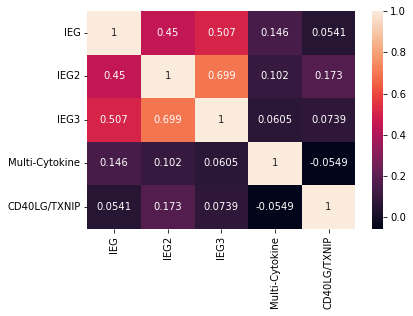

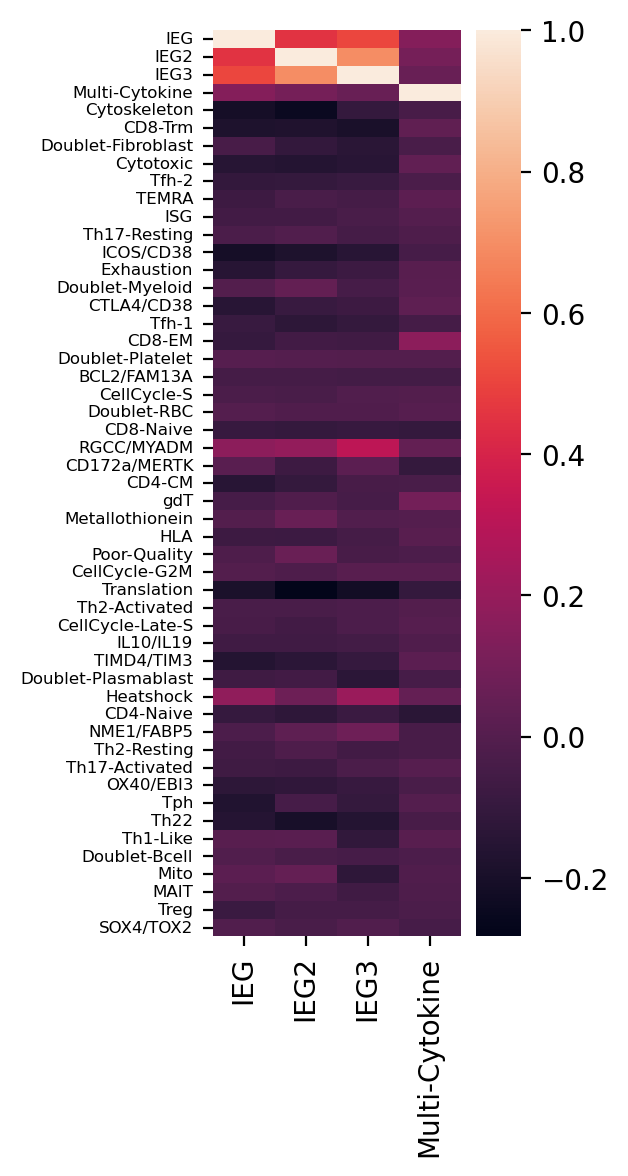

In [12]:
high_ieg_corr = ['IEG', 'IEG2', 'IEG3', 'Multi-Cytokine', 'CD40LG/TXNIP']
other = list(set(R.index) - set(high_ieg_corr))

sns.heatmap(R.loc[high_ieg_corr, high_ieg_corr], annot=True, fmt='.3g')
(fig,ax) = plt.subplots(1, 1, figsize=(2,6), dpi=200)
sns.heatmap(R.loc[['IEG', 'IEG2', 'IEG3', 'Multi-Cytokine']+other, ['IEG', 'IEG2', 'IEG3', 'Multi-Cytokine']], annot=False, yticklabels=True, ax=ax, fmt='%.3g')
ax.tick_params(axis='y', labelsize=6)

In [13]:
sorted(scores_ren.index)

['BCL2/FAM13A',
 'CD172a/MERTK',
 'CD4-CM',
 'CD4-Naive',
 'CD40LG/TXNIP',
 'CD8-EM',
 'CD8-Naive',
 'CD8-Trm',
 'CTLA4/CD38',
 'CellCycle-G2M',
 'CellCycle-Late-S',
 'CellCycle-S',
 'Cytoskeleton',
 'Cytotoxic',
 'Doublet-Bcell',
 'Doublet-Fibroblast',
 'Doublet-Myeloid',
 'Doublet-Plasmablast',
 'Doublet-Platelet',
 'Doublet-RBC',
 'Exhaustion',
 'HLA',
 'Heatshock',
 'ICOS/CD38',
 'IEG',
 'IEG2',
 'IEG3',
 'IL10/IL19',
 'ISG',
 'MAIT',
 'Metallothionein',
 'Mito',
 'Multi-Cytokine',
 'NME1/FABP5',
 'OX40/EBI3',
 'Poor-Quality',
 'RGCC/MYADM',
 'SOX4/TOX2',
 'TEMRA',
 'TIMD4/TIM3',
 'Tfh-1',
 'Tfh-2',
 'Th1-Like',
 'Th17-Activated',
 'Th17-Resting',
 'Th2-Activated',
 'Th2-Resting',
 'Th22',
 'Tph',
 'Translation',
 'Treg',
 'gdT']

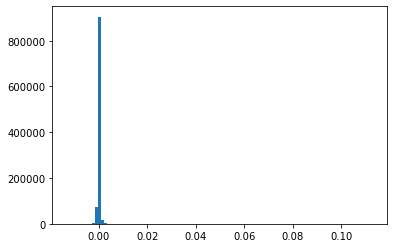

In [14]:
x = scores_ren.values.reshape(-1)
x = x[~np.isnan(x)]
_ = plt.hist(x, bins=100)

In [15]:
np.quantile(x, .95), np.quantile(x, .99), np.quantile(x, .995), np.quantile(x, .999)

(0.00048198774466665995,
 0.0014983397715276905,
 0.0022916809905214894,
 0.005692397443478882)

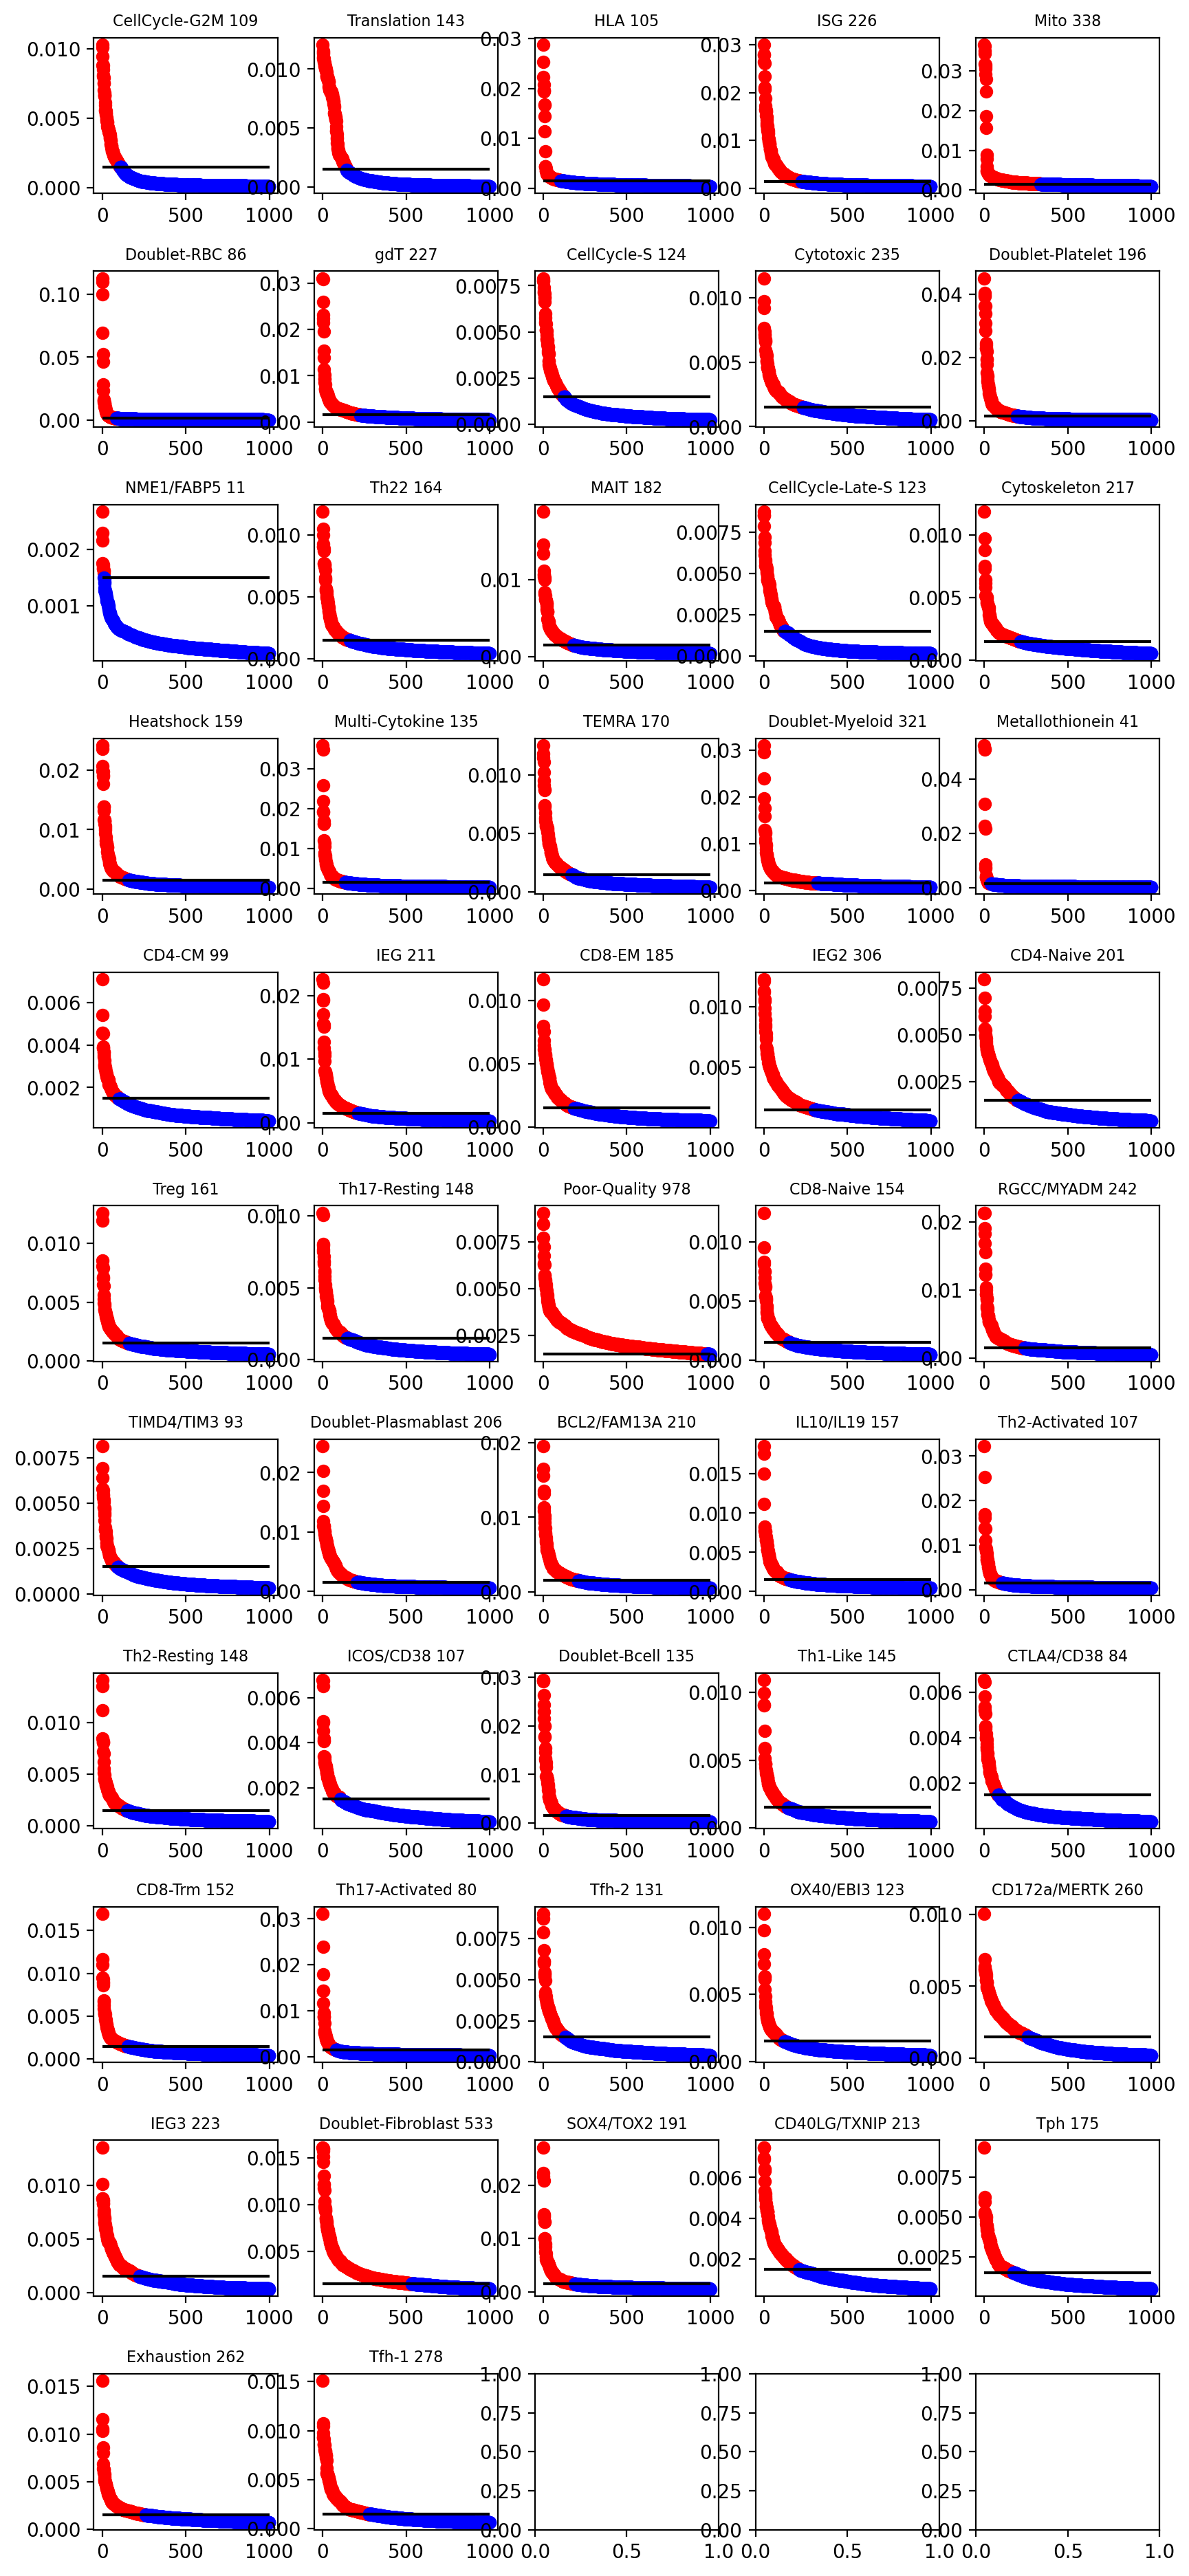

In [16]:
(fig,axes) = plt.subplots(11, 5, figsize=(10, 24), dpi=200, gridspec_kw={'hspace':.5})

axes = axes.ravel()

num=1000
thresh = 0.0015
for i,g in enumerate(scores_ren.index):
    ax = axes[i]
    y = scores_ren.loc[g,:].sort_values(ascending=False)
    x = np.arange(num)
    ynum = y[:num]
    ind = ynum>thresh
    ax.scatter(x[ind], ynum[ind], color='r')
    ax.scatter(x[~ind], ynum[~ind], color='b')
    ax.hlines(y=thresh, xmin=0, xmax=num, color='k')
    ax.set_title(g + ' ' + str((y>thresh).sum()), fontsize=8)

In [17]:
scores_bin = (scores_ren>thresh).T
scores_bin.head()

,CellCycle-G2M,Translation,HLA,ISG,Mito,Doublet-RBC,gdT,CellCycle-S,Cytotoxic,Doublet-Platelet,...,Tfh-2,OX40/EBI3,CD172a/MERTK,IEG3,Doublet-Fibroblast,SOX4/TOX2,CD40LG/TXNIP,Tph,Exhaustion,Tfh-1
SUV39H2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GPR68,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LINC02568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ZNF567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ERG28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## IEG genesets from Arner Et. Al. https://www.science.org/doi/10.1126/science.1259418#supplementary-materials

In [18]:
ieg_gset_data = pd.ExcelFile('../../Data/Misc/ArnerEtAlScience2015_IEGtable_S5.xlsx').parse(skiprows=1)
ieg_gset_data = ieg_gset_data.loc[~ieg_gset_data['Mm_count'].isin(['Human', 'Mouse', 'Organism', np.nan]), :] # Filter reference list
ieg_gset_data.head()

/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Total_count,Hs_count,Mm_count,Hs_symbol,Mm_symbol,Hs_RefSeq,Mm_RefSeq,Hs_name,MO_annotation
0,18,8,10,JUNB,Junb,NM_002229,NM_008416,jun B proto-oncogene,AP1 family member transcription factor
1,18,8,10,EGR1,Egr1,NM_001964,NM_007913,early growth response 1,Works as ERK-target axis
2,17,7,10,NR4A1,Nr4a1,NM_002135|NM_173157|NM_001202233,NM_010444,"nuclear receptor subfamily 4, group A, member 1",NaN
3,17,8,9,DUSP1,Dusp1,NM_004417,NM_013642,dual specificity phosphatase 1,Inantivation of ERK
4,16,8,8,ZFP36,Zfp36,NM_004926|NM_001244698|NM_001244701,NM_011756,ZFP36 ring finger protein,Degradation of AU-rich element (ARE)-containin...


In [19]:
ieg_gset = list(ieg_gset_data.loc[ieg_gset_data['Hs_symbol'] != '-', 'Hs_symbol'])
len(ieg_gset), ieg_gset[:5]

(224, ['JUNB', 'EGR1', 'NR4A1', 'DUSP1', 'ZFP36'])

In [20]:
scores_bin_to_test = scores_bin.astype(int)
sig_index = pd.Series(scores_bin_to_test.index.isin(ieg_gset), index=scores_bin_to_test.index).astype(int)

res = []
for g in scores_bin_to_test.columns:
    ct = pd.crosstab(scores_bin_to_test[g], sig_index)
    if (ct.shape[0]<2) or (ct.shape[1]<2):
        res.append([g, np.nan, np.nan])
    else:
        ct = ct.loc[[1,0], [1,0]].replace(np.nan, 0)
        OR,p = fisher_exact(ct)
        
        n_overlap_top20 = len(set(scores_ren.loc[g, :].sort_values(ascending=False).index[:20]).intersection(ieg_gset))
        
        res.append([g,OR,p, ct.at[1, 1], n_overlap_top20])
        
res = pd.DataFrame(res, columns=['GEP', 'OR', 'P', 'N_overlap', 'N_overlap20']).sort_values(by='P', ascending=True)
res

,GEP,OR,P,N_overlap,N_overlap20
21,IEG,56.882335,6.291134e-77,64,17
23,IEG2,39.131055,3.556792e-73,69,11
16,Multi-Cytokine,65.532567,3.681046e-61,48,10
45,IEG3,35.697882,7.758163e-54,51,6
29,RGCC/MYADM,12.587123,8.560580e-19,26,2
15,Heatshock,13.746500,6.974339e-15,19,1
48,CD40LG/TXNIP,9.893711,1.462788e-12,19,2
18,Doublet-Myeloid,7.105354,3.606572e-11,21,2
25,Treg,7.138718,1.248844e-06,11,1
50,Exhaustion,5.106582,4.891111e-06,13,2


In [21]:
len(set(scores_ren.loc[g, :].sort_values(ascending=False).index[:20]).intersection(ieg_gset))

0

In [22]:
ct

col_0,1,0
Tfh-1,,
1,3,275
0,216,20123


## Polarization associated GEPs from https://pubmed.ncbi.nlm.nih.gov/32286271/ fisher exact

In [23]:
fn = '../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx'
X = pd.ExcelFile(fn)
lfcthresh = 1
padj_thresh = .05
padj_thresh2 = .2

allres = []
for name in X.sheet_names:
    words = name.split(' ')
    start = words[2]
    condition = words[3]
    time = words[4]
    dat = pd.ExcelFile(fn).parse(name, skiprows=3)
    associated_genes = dat.loc[(dat['LFC']>lfcthresh) & (dat['p_adj']<padj_thresh), 'gene_name']
    unclear_genes = dat.loc[(dat['p_adj']>padj_thresh) & (dat['p_adj']<padj_thresh2), 'gene_name']
    sig_index = pd.Series(scores_bin.index.isin(associated_genes), index=scores_bin.index).drop(set(unclear_genes).intersection(scores_bin.index)).astype(int)    
    scores_bin_to_test = scores_bin.loc[sig_index.index,:].astype(int)

    res = []
    for g in scores_bin_to_test.columns:
        ct = pd.crosstab(scores_bin_to_test[g], sig_index)
        if (ct.shape[0]<2) or (ct.shape[1]<2):
            res.append([g, np.nan, np.nan])
        else:
            ct = ct.loc[[1,0], [1,0]].replace(np.nan, 0)
            OR,p = fisher_exact(ct)
            res.append([g,OR,p])
    
    res = pd.DataFrame(res, columns=['GEP', 'OR', 'P']).sort_values(by='P', ascending=True)
    res['start'] = start
    res['condition'] = condition
    res['time'] = time
    res.sort_values(by='P')
    allres.append(res)

In [24]:
 X.sheet_names

['Data S2, TN stim 16h',
 'Data S2, TN stim 5d',
 'Data S2, TM stim 16h',
 'Data S2, TM stim 5d',
 'Data S2, TN Th1 16h',
 'Data S2, TN Th1 5d',
 'Data S2, TM Th1 16h',
 'Data S2, TM Th1 5d',
 'Data S2, TN Th2 16h',
 'Data S2, TN Th2 5d',
 'Data S2, TM Th2 16h',
 'Data S2, TM Th2 5d',
 'Data S2, TN Th17 16h',
 'Data S2, TN Th17 5d',
 'Data S2, TM Th17 16h',
 'Data S2, TM Th17 5d',
 'Data S2, TN iTreg 16h',
 'Data S2, TN iTreg 5d',
 'Data S2, TM iTreg 16h',
 'Data S2, TM iTreg 5d',
 'Data S2, TN IFNB 16h',
 'Data S2, TN IFNB 5d',
 'Data S2, TM IFNB 16h',
 'Data S2, TM IFNB 5d',
 'Data S2, TN iTreg vs Th17 5d',
 'Data S2, TM iTreg vs Th17 5d']

In [25]:
allres = pd.concat(allres, axis=0)

In [26]:
allres['condition'].value_counts()

iTreg    312
stim     208
Th1      208
Th2      208
Th17     208
IFNB     208
Name: condition, dtype: int64

In [27]:
allres.to_csv('../../Data/TCAT/cGep_CanoGamezPolarization_Geneset_Correlation.tsv', sep='\t')

## Th2

In [28]:
ind = (allres['condition']=='Th2') & (allres['start']=='TN') & (allres['time']=='16h')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
34,Th2-Activated,22.718447,0.000049,TN,Th2,16h
35,Th2-Resting,16.217460,0.000172,TN,Th2,16h
19,Metallothionein,28.467082,0.002729,TN,Th2,16h
33,IL10/IL19,11.051948,0.003238,TN,Th2,16h
29,RGCC/MYADM,7.091702,0.010694,TN,Th2,16h
23,IEG2,5.576183,0.019956,TN,Th2,16h
38,Th1-Like,7.724438,0.030717,TN,Th2,16h
49,Tph,6.375566,0.043244,TN,Th2,16h
47,SOX4/TOX2,5.831260,0.050581,TN,Th2,16h
9,Doublet-Platelet,5.679576,0.052960,TN,Th2,16h


In [29]:
ind = (allres['condition']=='Th2') & (allres['start']=='TN') & (allres['time']=='5d')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
34,Th2-Activated,10.430511,4.658733e-11,TN,Th2,5d
46,Doublet-Fibroblast,3.339580,2.027330e-07,TN,Th2,5d
35,Th2-Resting,5.650319,1.828326e-06,TN,Th2,5d
42,Tfh-2,5.904436,2.938697e-06,TN,Th2,5d
49,Tph,4.301184,5.511485e-05,TN,Th2,5d
27,Poor-Quality,0.225021,3.416634e-04,TN,Th2,5d
47,SOX4/TOX2,3.557021,5.074468e-04,TN,Th2,5d
33,IL10/IL19,3.524749,1.665420e-03,TN,Th2,5d
4,Mito,0.000000,5.011189e-03,TN,Th2,5d
28,CD8-Naive,3.167218,5.390012e-03,TN,Th2,5d


In [30]:
ind = (allres['condition']=='Th2') & (allres['start']=='TM') & (allres['time']=='16h')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
0,CellCycle-G2M,0.0,1.0,TM,Th2,16h
2,HLA,0.0,1.0,TM,Th2,16h
3,ISG,0.0,1.0,TM,Th2,16h
4,Mito,0.0,1.0,TM,Th2,16h
5,Doublet-RBC,0.0,1.0,TM,Th2,16h
6,gdT,0.0,1.0,TM,Th2,16h
7,CellCycle-S,0.0,1.0,TM,Th2,16h
8,Cytotoxic,0.0,1.0,TM,Th2,16h
9,Doublet-Platelet,0.0,1.0,TM,Th2,16h
10,NME1/FABP5,0.0,1.0,TM,Th2,16h


In [31]:
ind = (allres['condition']=='Th2') & (allres['start']=='TM') & (allres['time']=='5d')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
46,Doublet-Fibroblast,7.364755,0.000341,TM,Th2,5d
9,Doublet-Platelet,9.320482,0.005183,TM,Th2,5d
51,Tfh-1,6.514973,0.013439,TM,Th2,5d
42,Tfh-2,9.059136,0.023081,TM,Th2,5d
37,Doublet-Bcell,4.238391,0.215952,TM,Th2,5d
35,Th2-Resting,3.861111,0.234172,TM,Th2,5d
33,IL10/IL19,3.636752,0.246544,TM,Th2,5d
12,MAIT,3.130602,0.279898,TM,Th2,5d
47,SOX4/TOX2,2.980994,0.291550,TM,Th2,5d
45,IEG3,2.547297,0.331512,TM,Th2,5d


## Th17

In [32]:
ind = (allres['condition']=='Th17') & (allres['start']=='TN') & (allres['time']=='16h')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
18,Doublet-Myeloid,16.789234,0.000005,TN,Th17,16h
43,OX40/EBI3,27.521345,0.000026,TN,Th17,16h
49,Tph,19.103626,0.000101,TN,Th17,16h
39,CTLA4/CD38,29.212251,0.000221,TN,Th17,16h
46,Doublet-Fibroblast,7.915088,0.000805,TN,Th17,16h
42,Tfh-2,18.443510,0.000812,TN,Th17,16h
19,Metallothionein,39.029440,0.001514,TN,Th17,16h
41,Th17-Activated,19.477683,0.005640,TN,Th17,16h
16,Multi-Cytokine,11.392370,0.015393,TN,Th17,16h
35,Th2-Resting,10.371385,0.018306,TN,Th17,16h


In [33]:
ind = (allres['condition']=='Th17') & (allres['start']=='TN') & (allres['time']=='5d')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
46,Doublet-Fibroblast,3.231469,5.020040e-16,TN,Th17,5d
27,Poor-Quality,0.127372,8.754666e-15,TN,Th17,5d
41,Th17-Activated,5.839265,1.590169e-08,TN,Th17,5d
3,ISG,0.000000,1.157252e-05,TN,Th17,5d
4,Mito,0.163017,3.213532e-05,TN,Th17,5d
37,Doublet-Bcell,3.061986,6.154142e-05,TN,Th17,5d
43,OX40/EBI3,2.993916,1.844718e-04,TN,Th17,5d
12,MAIT,2.572059,2.355895e-04,TN,Th17,5d
14,Cytoskeleton,0.084637,2.678745e-04,TN,Th17,5d
34,Th2-Activated,3.040042,3.703941e-04,TN,Th17,5d


In [34]:
ind = (allres['condition']=='Th17') & (allres['start']=='TM') & (allres['time']=='16h')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
46,Doublet-Fibroblast,12.023370,0.000034,TM,Th17,16h
37,Doublet-Bcell,13.376267,0.011570,TM,Th17,16h
41,Th17-Activated,10.819093,0.092673,TM,Th17,16h
28,CD8-Naive,5.566176,0.171012,TM,Th17,16h
33,IL10/IL19,5.458333,0.174047,TM,Th17,16h
47,SOX4/TOX2,4.474123,0.207704,TM,Th17,16h
9,Doublet-Platelet,4.358333,0.212542,TM,Th17,16h
18,Doublet-Myeloid,2.639583,0.324657,TM,Th17,16h
27,Poor-Quality,0.000000,0.630408,TM,Th17,16h
5,Doublet-RBC,0.000000,1.000000,TM,Th17,16h


In [35]:
ind = (allres['condition']=='Th17') & (allres['start']=='TM') & (allres['time']=='5d')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
46,Doublet-Fibroblast,4.334459,2.091760e-19,TM,Th17,5d
27,Poor-Quality,0.204103,9.642128e-08,TM,Th17,5d
42,Tfh-2,4.479559,1.408761e-06,TM,Th17,5d
51,Tfh-1,2.983674,5.697388e-06,TM,Th17,5d
9,Doublet-Platelet,2.843550,2.674422e-04,TM,Th17,5d
18,Doublet-Myeloid,2.318033,6.623065e-04,TM,Th17,5d
41,Th17-Activated,3.770368,1.221177e-03,TM,Th17,5d
37,Doublet-Bcell,2.907317,1.666647e-03,TM,Th17,5d
43,OX40/EBI3,2.630587,7.367795e-03,TM,Th17,5d
34,Th2-Activated,2.727881,8.680977e-03,TM,Th17,5d


## Th1

In [36]:
ind = (allres['condition']=='Th1') & (allres['start']=='TN') & (allres['time']=='16h')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
49,Tph,39.824561,0.000008,TN,Th1,16h
42,Tfh-2,36.910457,0.000132,TN,Th1,16h
16,Multi-Cytokine,35.784965,0.000144,TN,Th1,16h
48,CD40LG/TXNIP,22.407692,0.000551,TN,Th1,16h
6,gdT,20.992788,0.000663,TN,Th1,16h
43,OX40/EBI3,24.179457,0.004011,TN,Th1,16h
26,Th17-Resting,20.014677,0.005750,TN,Th1,16h
12,MAIT,16.207143,0.008574,TN,Th1,16h
8,Cytotoxic,12.488044,0.013974,TN,Th1,16h
50,Exhaustion,11.176374,0.017167,TN,Th1,16h


In [37]:
ind = (allres['condition']=='Th1') & (allres['start']=='TN') & (allres['time']=='5d')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
42,Tfh-2,12.378685,0.000003,TN,Th1,5d
16,Multi-Cytokine,10.088075,0.000051,TN,Th1,5d
46,Doublet-Fibroblast,4.247716,0.000264,TN,Th1,5d
6,gdT,5.861943,0.000840,TN,Th1,5d
34,Th2-Activated,8.258091,0.001835,TN,Th1,5d
43,OX40/EBI3,7.142157,0.003043,TN,Th1,5d
40,CD8-Trm,5.734516,0.006442,TN,Th1,5d
49,Tph,4.957602,0.010460,TN,Th1,5d
30,TIMD4/TIM3,7.019588,0.010483,TN,Th1,5d
51,Tfh-1,3.902834,0.011454,TN,Th1,5d


In [38]:
ind = (allres['condition']=='Th1') & (allres['start']=='TM') & (allres['time']=='16h')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
16,Multi-Cytokine,307.984962,0.000127,TM,Th1,16h
39,CTLA4/CD38,123.680723,0.012174,TM,Th1,16h
2,HLA,98.605769,0.015202,TM,Th1,16h
43,OX40/EBI3,83.983607,0.017792,TM,Th1,16h
42,Tfh-2,78.784615,0.018942,TM,Th1,16h
15,Heatshock,64.734177,0.022959,TM,Th1,16h
49,Tph,58.735632,0.025250,TM,Th1,16h
21,IEG,48.580952,0.030391,TM,Th1,16h
10,NME1/FABP5,0.000000,1.000000,TM,Th1,16h
9,Doublet-Platelet,0.000000,1.000000,TM,Th1,16h


In [39]:
ind = (allres['condition']=='Th1') & (allres['start']=='TM') & (allres['time']=='5d')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
42,Tfh-2,25.777638,0.000033,TM,Th1,5d
51,Tfh-1,11.862190,0.000589,TM,Th1,5d
46,Doublet-Fibroblast,6.066994,0.006281,TM,Th1,5d
16,Multi-Cytokine,11.392370,0.015393,TM,Th1,5d
12,MAIT,8.398354,0.026916,TM,Th1,5d
9,Doublet-Platelet,7.786942,0.030855,TM,Th1,5d
19,Metallothionein,18.346429,0.056131,TM,Th1,5d
39,CTLA4/CD38,8.823150,0.111728,TM,Th1,5d
30,TIMD4/TIM3,7.956522,0.122957,TM,Th1,5d
2,HLA,7.034341,0.137717,TM,Th1,5d


## Stim

In [40]:
ind = (allres['condition']=='stim') & (allres['start']=='TN') & (allres['time']=='16h')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
43,OX40/EBI3,9.452937,1.351988e-32,TN,stim,16h
7,CellCycle-S,8.949725,2.680724e-31,TN,stim,16h
16,Multi-Cytokine,6.696265,1.903831e-25,TN,stim,16h
14,Cytoskeleton,4.046592,1.534292e-20,TN,stim,16h
45,IEG3,3.941744,3.207302e-20,TN,stim,16h
23,IEG2,3.309357,4.514568e-20,TN,stim,16h
15,Heatshock,4.382806,1.805442e-17,TN,stim,16h
4,Mito,0.087266,1.012834e-16,TN,stim,16h
0,CellCycle-G2M,5.080121,3.469319e-15,TN,stim,16h
50,Exhaustion,3.051434,5.286313e-15,TN,stim,16h


In [41]:
ind = (allres['condition']=='stim') & (allres['start']=='TN') & (allres['time']=='5d')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
13,CellCycle-Late-S,35.730830,1.821707e-67,TN,stim,5d
0,CellCycle-G2M,43.065386,2.481938e-63,TN,stim,5d
7,CellCycle-S,27.751020,2.990240e-62,TN,stim,5d
50,Exhaustion,5.692301,2.688485e-40,TN,stim,5d
49,Tph,7.984380,1.385821e-39,TN,stim,5d
43,OX40/EBI3,11.411281,3.650548e-38,TN,stim,5d
42,Tfh-2,6.638501,3.951065e-25,TN,stim,5d
3,ISG,4.360745,8.053030e-25,TN,stim,5d
16,Multi-Cytokine,5.672630,1.004517e-21,TN,stim,5d
27,Poor-Quality,0.361997,1.683039e-19,TN,stim,5d


In [42]:
ind = (allres['condition']=='stim') & (allres['start']=='TM') & (allres['time']=='16h')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
43,OX40/EBI3,14.793326,1.755682e-45,TM,stim,16h
16,Multi-Cytokine,8.350792,6.405405e-31,TM,stim,16h
7,CellCycle-S,8.319344,1.843194e-28,TM,stim,16h
23,IEG2,3.613195,7.146648e-22,TM,stim,16h
50,Exhaustion,3.844033,4.186799e-21,TM,stim,16h
49,Tph,4.166619,1.043455e-16,TM,stim,16h
15,Heatshock,4.267677,6.640269e-16,TM,stim,16h
45,IEG3,3.434740,3.583196e-15,TM,stim,16h
42,Tfh-2,4.625650,4.966753e-15,TM,stim,16h
14,Cytoskeleton,3.357387,3.017917e-14,TM,stim,16h


In [43]:
ind = (allres['condition']=='stim') & (allres['start']=='TM') & (allres['time']=='5d')
allres.loc[ind, :].sort_values(by='P')

,GEP,OR,P,start,condition,time
7,CellCycle-S,63.645461,3.012068e-82,TM,stim,5d
13,CellCycle-Late-S,41.334093,5.541176e-73,TM,stim,5d
0,CellCycle-G2M,49.798301,2.390793e-68,TM,stim,5d
43,OX40/EBI3,10.221085,8.589088e-35,TM,stim,5d
3,ISG,5.729226,3.408100e-34,TM,stim,5d
50,Exhaustion,4.812901,3.022942e-31,TM,stim,5d
49,Tph,5.635678,1.844945e-26,TM,stim,5d
16,Multi-Cytokine,5.309179,2.137650e-19,TM,stim,5d
14,Cytoskeleton,3.479674,4.203096e-16,TM,stim,5d
42,Tfh-2,3.977199,9.021350e-13,TM,stim,5d


## MSIGDB C5 (GO) - Fisher

In [44]:
go_genesets = {x.split('\t')[0]:x.split('\t')[2:] for x in  open('../../Data/Misc/c5.all.v7.5.1.symbols.gmt').readlines()}
for c in go_genesets.keys():
    go_genesets[c] = list(set(go_genesets[c]).intersection(scores_bin.index))

In [ ]:
res = []
for c in go_genesets.keys():
    if len(go_genesets[c])>20:
        lab = scores_bin.index.isin(go_genesets[c])
        for g in scores_bin.columns:
            ct = pd.crosstab(scores_bin[g].astype(int), lab.astype(int))

            ct = ct.loc[[0,1], [0,1]].replace(np.nan, 0)
            z,p = fisher_exact(ct)
            res.append([g,c, z,p])   
            
res = pd.DataFrame(res, columns=['GEP', 'Geneset', 'Z', 'P'])

In [ ]:
res.to_csv('../../Data/TCAT/cGep_GO_Geneset_Correlation.tsv', sep='\t')

In [ ]:
for g in scores_bin.columns:
    print(g)
    display(res.loc[res['GEP']==g, :].sort_values(by='P').head(10))
    print('\n\n')

In [ ]:
res.head()

In [ ]:
2

In [ ]:
12

In [ ]:
1

## Output an Excel Spreadsheet

In [ ]:
ntooutput = 10
tooutput_go = []
for k,g in res.groupby('GEP'):
    tooutput_go.append(g.sort_values(by='P').head(10))

tooutput_go = pd.concat(tooutput_go, axis=0)
tooutput_go.index = np.arange(1, tooutput_go.shape[0]+1)

In [ ]:
tooutput_go = tooutput_go.rename(columns={'Z':'OR'})

In [ ]:
outfn = '../../Tables/Table_S3_cGEP_gset_enrichment.xlsx'

In [ ]:
with pd.ExcelWriter(outfn) as writer:
    tooutput_go.to_excel(writer, sheet_name='GO_Enrichment')
    for (k,g) in allres.groupby(['condition', 'time', 'start']):
        g = g.sort_values(by='P')
        g.index = np.arange(1, g.shape[0]+1)
        g.to_excel(writer, sheet_name=' '.join(k))

# Scratch

## MSIGDB C7 (Immune) - Fisher

In [ ]:
immune_genesets = {x.split('\t')[0]:x.split('\t')[2:] for x in  open('../../Data/Misc/c7.all.v7.5.1.symbols.gmt').readlines()}
for c in immune_genesets.keys():
    immune_genesets[c] = list(set(immune_genesets[c]).intersection(scores_bin.index))

In [ ]:
immune_res = []
for c in immune_genesets.keys():
    if len(immune_genesets[c])>20:
        lab = scores_bin.index.isin(immune_genesets[c])
        for g in scores_bin.columns:
            ct = pd.crosstab(scores_bin[g].astype(int), lab.astype(int))

            ct = ct.loc[[0,1], [0,1]].replace(np.nan, 0)
            z,p = fisher_exact(ct)
            immune_res.append([g,c, z,p])   
            
immune_res = pd.DataFrame(immune_res, columns=['GEP', 'Geneset', 'Z', 'P'])

In [ ]:
immune_res.to_csv('../../Data/TCAT/cGep_c7Immune_Geneset_Correlation.tsv', sep='\t')

In [ ]:
for g in scores_bin.columns:
    print(g)
    display(res.loc[res['GEP']==g, :].sort_values(by='P').head(10))
    print('\n\n')

## Polarization associated GEPs from https://pubmed.ncbi.nlm.nih.gov/32286271/ ranksums

In [ ]:
scores_ren_fortest = scores_ren.copy()
scores_ren_fortest.values[scores_ren_fortest<0] = 0

In [26]:
t0 = pd.ExcelFile('../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx').parse('Data S2, TN stim 5d', skiprows=3)
t0.head(20)

,gene_name,type,mean,LFC,LFC_se,p_value,p_adj
0,LIF,protein_coding,15533.635760,10.650472,0.263478,0.000000e+00,0.000000e+00
1,RRM2,protein_coding,9054.696055,10.014237,0.271570,1.150000e-297,2.890000e-295
2,MKI67,protein_coding,27505.990900,9.361306,0.153605,0.000000e+00,0.000000e+00
3,TOP2A,protein_coding,17000.686530,8.927494,0.146960,0.000000e+00,0.000000e+00
4,DLGAP5,protein_coding,2708.972363,8.875133,0.301447,1.600000e-190,1.510000e-188
5,DUSP4,protein_coding,15327.834860,8.862480,0.186680,0.000000e+00,0.000000e+00
6,HJURP,protein_coding,3048.639595,8.657527,0.265929,1.730000e-232,2.410000e-230
7,AK4,protein_coding,4423.300673,8.645477,0.279963,2.160000e-209,2.510000e-207
8,UBE2C,protein_coding,2769.575054,8.488083,0.262473,1.990000e-229,2.670000e-227
9,IL2RA,protein_coding,19362.062970,8.483673,0.147956,0.000000e+00,0.000000e+00


In [13]:
t0 = pd.ExcelFile('../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx').parse('Data S2, TN stim 5d', skiprows=3)
t0_genes = t0.loc[t0['LFC']>1, 'gene_name']
t0_unclear = t0.loc[(t0['LFC']<1) & (t0['LFC']>0), 'gene_name']

scores_ren_pos = scores_ren_fortest[list(set(scores_ren.columns).intersection(t0_genes))]
scores_ren_neg = scores_ren_fortest.loc[:,~scores_ren.columns.isin(t0_genes+t0_unclear)]
res = []
for g in scores_ren.index:
    z,p = ranksums(scores_ren_pos.loc[g,:].dropna(), scores_ren_neg.loc[g,:].dropna())
    res.append([g,'TN-->T0, 5d', z,p])
    
pd.DataFrame(res, columns=['GEP', 'Condition', 'Z', 'P']).sort_values(by='Z', ascending=False)

,GEP,Condition,Z,P
13,HLA,"TN-->T0, 5d",17.842324,3.316137e-71
32,High-Cytokine,"TN-->T0, 5d",16.077723,3.655678e-58
4,CellCycle-S,"TN-->T0, 5d",15.852989,1.340504e-56
48,Tph,"TN-->T0, 5d",15.149323,7.655121e-52
40,CTLA4+CD38+,"TN-->T0, 5d",12.826043,1.171990e-37
38,EBI3-Activation,"TN-->T0, 5d",12.565212,3.279963e-36
45,TIMD4/CD38,"TN-->T0, 5d",11.925829,8.681507e-33
7,HeatShock1,"TN-->T0, 5d",11.530859,9.221914e-31
9,S100A10/LMNA,"TN-->T0, 5d",11.422315,3.234985e-30
6,CellCycle-Histone,"TN-->T0, 5d",10.778494,4.349480e-27


In [15]:
th2 = pd.ExcelFile('../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx').parse('Data S2, TN Th2 5d', skiprows=3)
th2_genes = th2.loc[th2['LFC']>1, 'gene_name']
th2_unclear = th2.loc[(th2['LFC']<1) & (th2['LFC']>0), 'gene_name']

scores_ren_pos = scores_ren_fortest[list(set(scores_ren.columns).intersection(th2_genes))]
scores_ren_neg = scores_ren_fortest.loc[:,~scores_ren.columns.isin(th2_genes+th2_unclear)]
res = []
for g in scores_ren.index:
    z,p = ranksums(scores_ren_pos.loc[g,:].dropna(), scores_ren_neg.loc[g,:].dropna())
    res.append([g,'TN-->Th2, 5d', z,p])
    
pd.DataFrame(res, columns=['GEP', 'Condition', 'Z', 'P']).sort_values(by='Z', ascending=False)

,GEP,Condition,Z,P
36,FCN3/FCN2,"TN-->Th2, 5d",3.730695,1.909522e-04
33,CCR3+-Th2,"TN-->Th2, 5d",3.135715,1.714358e-03
13,HLA,"TN-->Th2, 5d",2.954638,3.130361e-03
7,HeatShock1,"TN-->Th2, 5d",2.912931,3.580535e-03
3,Metallothionein,"TN-->Th2, 5d",2.882089,3.950478e-03
32,High-Cytokine,"TN-->Th2, 5d",2.671390,7.553773e-03
5,Doublet-RBC,"TN-->Th2, 5d",2.099428,3.577917e-02
31,Th2,"TN-->Th2, 5d",1.525874,1.270412e-01
39,Doublet-Bcell,"TN-->Th2, 5d",1.296437,1.948250e-01
25,Doublet-Myeloid,"TN-->Th2, 5d",1.164676,2.441504e-01


In [16]:
th2 = pd.ExcelFile('../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx').parse('Data S2, TN Th2 16h', skiprows=3)
th2_genes = th2.loc[th2['LFC']>1, 'gene_name']
th2_unclear = th2.loc[(th2['LFC']<1) & (th2['LFC']>0), 'gene_name']

scores_ren_pos = scores_ren_fortest[list(set(scores_ren.columns).intersection(th2_genes))]
scores_ren_neg = scores_ren_fortest.loc[:,~scores_ren.columns.isin(th2_genes+th2_unclear)]
res = []
for g in scores_ren.index:
    z,p = ranksums(scores_ren_pos.loc[g,:].dropna(), scores_ren_neg.loc[g,:].dropna())
    res.append([g,'TN-->Th2, 16h', z,p])
    
pd.DataFrame(res, columns=['GEP', 'Condition', 'Z', 'P']).sort_values(by='Z', ascending=False)

,GEP,Condition,Z,P
31,Th2,"TN-->Th2, 16h",4.035093,0.000055
35,RGCC/MYADM,"TN-->Th2, 16h",3.296435,0.000979
58,CH25H/DDIT4,"TN-->Th2, 16h",2.544925,0.010930
23,IEG,"TN-->Th2, 16h",2.412454,0.015846
32,High-Cytokine,"TN-->Th2, 16h",2.266259,0.023436
14,Doublet-Platelet,"TN-->Th2, 16h",2.218481,0.026522
33,CCR3+-Th2,"TN-->Th2, 16h",1.976506,0.048097
52,ICOS/CCR4,"TN-->Th2, 16h",1.895775,0.057990
20,MALAT1,"TN-->Th2, 16h",1.819773,0.068794
9,S100A10/LMNA,"TN-->Th2, 16h",1.725538,0.084431


In [27]:
th1 = pd.ExcelFile('../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx').parse('Data S2, TN Th1 5d', skiprows=3)
th1.head(20)

,gene_name,type,mean,LFC,LFC_se,p_value,p_adj
0,IFNG,protein_coding,1069.732297,4.819723,0.413119,1.886907e-31,4.682361e-28
1,DOC2B,protein_coding,19.051628,4.273975,0.372589,1.844605e-30,3.923474e-27
2,NT5C1A,protein_coding,18.150481,3.215997,0.310354,3.678044e-25,5.476239e-22
3,DOCK5,protein_coding,63.680124,3.161700,0.336673,5.942324e-21,5.898350e-18
4,GZMK,protein_coding,39.965212,2.568590,0.294917,3.051509e-18,1.893080e-15
5,IL1RL1,protein_coding,43.759292,2.548688,0.292296,2.793114e-18,1.808116e-15
6,ANXA3,protein_coding,169.833974,2.399691,0.186020,4.490465e-38,3.342927e-34
7,S100A9,protein_coding,20.883860,2.364027,0.464882,3.671962e-07,2.775221e-05
8,CLEC4F,protein_coding,13.759932,2.138942,0.414280,2.429766e-07,1.908777e-05
9,APOD,protein_coding,275.834433,2.126243,0.321135,3.567046e-11,7.697065e-09


In [17]:
th1 = pd.ExcelFile('../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx').parse('Data S2, TN Th1 5d', skiprows=3)
th1_genes = th1.loc[th1['LFC']>1, 'gene_name']
th1_unclear = th1.loc[(th1['LFC']<1) & (th1['LFC']>0), 'gene_name']

scores_ren_pos = scores_ren_fortest[list(set(scores_ren.columns).intersection(th1_genes))]
scores_ren_neg = scores_ren_fortest.loc[:,~scores_ren.columns.isin(th1_genes+th1_unclear)]
res = []
for g in scores_ren.index:
    z,p = ranksums(scores_ren_pos.loc[g,:].dropna(), scores_ren_neg.loc[g,:].dropna())
    res.append([g,'TN-->Th1, 5d', z,p])
    
pd.DataFrame(res, columns=['GEP', 'Condition', 'Z', 'P']).sort_values(by='Z', ascending=False)

,GEP,Condition,Z,P
13,HLA,"TN-->Th1, 5d",4.682101,0.000003
32,High-Cytokine,"TN-->Th1, 5d",2.593683,0.009495
36,FCN3/FCN2,"TN-->Th1, 5d",2.310205,0.020877
39,Doublet-Bcell,"TN-->Th1, 5d",2.122540,0.033792
23,IEG,"TN-->Th1, 5d",2.092326,0.036409
48,Tph,"TN-->Th1, 5d",2.073279,0.038146
38,EBI3-Activation,"TN-->Th1, 5d",2.042251,0.041127
7,HeatShock1,"TN-->Th1, 5d",1.953663,0.050741
25,Doublet-Myeloid,"TN-->Th1, 5d",1.637613,0.101502
17,IEG-Tissue,"TN-->Th1, 5d",1.501735,0.133166


In [18]:
th1 = pd.ExcelFile('../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx').parse('Data S2, TN Th1 16h', skiprows=3)
th1_genes = th1.loc[th1['LFC']>1, 'gene_name']
th1_unclear = th1.loc[(th1['LFC']<1) & (th1['LFC']>0), 'gene_name']

scores_ren_pos = scores_ren_fortest[list(set(scores_ren.columns).intersection(th1_genes))]
scores_ren_neg = scores_ren_fortest.loc[:,~scores_ren.columns.isin(th1_genes+th1_unclear)]
res = []
for g in scores_ren.index:
    z,p = ranksums(scores_ren_pos.loc[g,:].dropna(), scores_ren_neg.loc[g,:].dropna())
    res.append([g,'TN-->Th1, 16h', z,p])
    
pd.DataFrame(res, columns=['GEP', 'Condition', 'Z', 'P']).sort_values(by='Z', ascending=False)

,GEP,Condition,Z,P
13,HLA,"TN-->Th1, 16h",4.921095,8.606131e-07
32,High-Cytokine,"TN-->Th1, 16h",4.528801,5.931937e-06
40,CTLA4+CD38+,"TN-->Th1, 16h",3.286545,1.014246e-03
48,Tph,"TN-->Th1, 16h",2.643828,8.197424e-03
23,IEG,"TN-->Th1, 16h",2.426716,1.523619e-02
44,IL26/CTSH,"TN-->Th1, 16h",1.989291,4.666910e-02
27,CD4 TCM,"TN-->Th1, 16h",1.654373,9.805175e-02
5,Doublet-RBC,"TN-->Th1, 16h",1.619660,1.053053e-01
1,ISG,"TN-->Th1, 16h",1.590244,1.117798e-01
47,CD8/KLRC2,"TN-->Th1, 16h",1.554934,1.199618e-01


In [19]:
th1 = pd.ExcelFile('../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx').parse('Data S2, TM Th1 5d', skiprows=3)
th1_genes = th1.loc[th1['LFC']>1, 'gene_name']
th1_unclear = th1.loc[(th1['LFC']<1) & (th1['LFC']>0), 'gene_name']

scores_ren_pos = scores_ren_fortest[list(set(scores_ren.columns).intersection(th1_genes))]
scores_ren_neg = scores_ren_fortest.loc[:,~scores_ren.columns.isin(th1_genes+th1_unclear)]
res = []
for g in scores_ren.index:
    z,p = ranksums(scores_ren_pos.loc[g,:].dropna(), scores_ren_neg.loc[g,:].dropna())
    res.append([g,'TM-->Th1, 5d', z,p])
    
pd.DataFrame(res, columns=['GEP', 'Condition', 'Z', 'P']).sort_values(by='Z', ascending=False)

,GEP,Condition,Z,P
39,Doublet-Bcell,"TM-->Th1, 5d",3.171528,0.001516
36,FCN3/FCN2,"TM-->Th1, 5d",1.846135,0.064873
37,Tfh,"TM-->Th1, 5d",1.507605,0.131656
38,EBI3-Activation,"TM-->Th1, 5d",1.336159,0.181497
7,HeatShock1,"TM-->Th1, 5d",1.113075,0.265676
17,IEG-Tissue,"TM-->Th1, 5d",1.104220,0.269498
44,IL26/CTSH,"TM-->Th1, 5d",1.032077,0.302036
32,High-Cytokine,"TM-->Th1, 5d",0.997622,0.318463
13,HLA,"TM-->Th1, 5d",0.933954,0.350328
40,CTLA4+CD38+,"TM-->Th1, 5d",0.842897,0.399286


In [20]:
th17 = pd.ExcelFile('../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx').parse('Data S2, TN Th17 5d', skiprows=3)
th17_genes = th17.loc[th17['LFC']>1, 'gene_name']
th17_unclear = th17.loc[(th17['LFC']<1) & (th17['LFC']>0), 'gene_name']

scores_ren_pos = scores_ren_fortest[list(set(scores_ren.columns).intersection(th17_genes))]
scores_ren_neg = scores_ren_fortest.loc[:,~scores_ren.columns.isin(th17_genes+th17_unclear)]
res = []
for g in scores_ren.index:
    z,p = ranksums(scores_ren_pos.loc[g,:].dropna(), scores_ren_neg.loc[g,:].dropna())
    res.append([g,'TN-->Th17, 5d', z,p])
    
pd.DataFrame(res, columns=['GEP', 'Condition', 'Z', 'P']).sort_values(by='Z', ascending=False)

,GEP,Condition,Z,P
7,HeatShock1,"TN-->Th17, 5d",7.526406,5.215585e-14
36,FCN3/FCN2,"TN-->Th17, 5d",6.135591,8.484298e-10
3,Metallothionein,"TN-->Th17, 5d",4.794664,1.629477e-06
39,Doublet-Bcell,"TN-->Th17, 5d",4.446298,8.736290e-06
17,IEG-Tissue,"TN-->Th17, 5d",4.291722,1.772925e-05
32,High-Cytokine,"TN-->Th17, 5d",4.051458,5.089950e-05
5,Doublet-RBC,"TN-->Th17, 5d",3.545272,3.922078e-04
24,IEG-Blood,"TN-->Th17, 5d",3.281097,1.034041e-03
9,S100A10/LMNA,"TN-->Th17, 5d",3.126003,1.771995e-03
25,Doublet-Myeloid,"TN-->Th17, 5d",2.440762,1.465633e-02


In [22]:
th17 = pd.ExcelFile('../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx').parse('Data S2, TN Th17 16h', skiprows=3)
th17_genes = th17.loc[th17['LFC']>1, 'gene_name']
th17_unclear = th17.loc[(th17['LFC']<1) & (th17['LFC']>0), 'gene_name']

scores_ren_pos = scores_ren_fortest[list(set(scores_ren.columns).intersection(th17_genes))]
scores_ren_neg = scores_ren_fortest.loc[:,~scores_ren.columns.isin(th17_genes+th17_unclear)]
res = []
for g in scores_ren.index:
    z,p = ranksums(scores_ren_pos.loc[g,:].dropna(), scores_ren_neg.loc[g,:].dropna())
    res.append([g,'TN-->Th17, 16h', z,p])
    
pd.DataFrame(res, columns=['GEP', 'Condition', 'Z', 'P']).sort_values(by='Z', ascending=False)

,GEP,Condition,Z,P
25,Doublet-Myeloid,"TN-->Th17, 16h",3.574950,0.000350
36,FCN3/FCN2,"TN-->Th17, 16h",3.023155,0.002502
32,High-Cytokine,"TN-->Th17, 16h",2.177397,0.029451
39,Doublet-Bcell,"TN-->Th17, 16h",2.079757,0.037548
38,EBI3-Activation,"TN-->Th17, 16h",1.808526,0.070525
14,Doublet-Platelet,"TN-->Th17, 16h",1.591971,0.111391
7,HeatShock1,"TN-->Th17, 16h",1.462735,0.143540
13,HLA,"TN-->Th17, 16h",1.395340,0.162913
5,Doublet-RBC,"TN-->Th17, 16h",1.024627,0.305539
40,CTLA4+CD38+,"TN-->Th17, 16h",0.824053,0.409909


In [23]:
th17 = pd.ExcelFile('../../Data/Misc/CanoGamez_2020_NatComms/41467_2020_15543_MOESM6_ESM.xlsx').parse('Data S2, TM Th17 5d', skiprows=3)
th17_genes = th17.loc[th17['LFC']>1, 'gene_name']
th17_unclear = th17.loc[(th17['LFC']<1) & (th17['LFC']>0), 'gene_name']

scores_ren_pos = scores_ren_fortest[list(set(scores_ren.columns).intersection(th17_genes))]
scores_ren_neg = scores_ren_fortest.loc[:,~scores_ren.columns.isin(th17_genes+th17_unclear)]
res = []
for g in scores_ren.index:
    z,p = ranksums(scores_ren_pos.loc[g,:].dropna(), scores_ren_neg.loc[g,:].dropna())
    res.append([g,'TN-->Th17, 5d', z,p])
    
pd.DataFrame(res, columns=['GEP', 'Condition', 'Z', 'P']).sort_values(by='Z', ascending=False)

,GEP,Condition,Z,P
36,FCN3/FCN2,"TN-->Th17, 5d",6.063605,1.331038e-09
7,HeatShock1,"TN-->Th17, 5d",5.652102,1.584974e-08
39,Doublet-Bcell,"TN-->Th17, 5d",5.436212,5.442534e-08
3,Metallothionein,"TN-->Th17, 5d",4.846956,1.253705e-06
25,Doublet-Myeloid,"TN-->Th17, 5d",3.380948,7.223611e-04
5,Doublet-RBC,"TN-->Th17, 5d",3.245638,1.171880e-03
9,S100A10/LMNA,"TN-->Th17, 5d",2.733606,6.264498e-03
32,High-Cytokine,"TN-->Th17, 5d",2.482228,1.305638e-02
24,IEG-Blood,"TN-->Th17, 5d",1.645114,9.994634e-02
17,IEG-Tissue,"TN-->Th17, 5d",1.596767,1.103177e-01


## MSIGDB C8 (cell-type)

In [35]:
celltype_genesets = {x.split('\t')[0]:x.split('\t')[2:] for x in  open('../../Data/Misc/c8.all.v7.5.1.symbols.gmt').readlines()}
for c in celltype_genesets.keys():
    celltype_genesets[c] = list(set(celltype_genesets[c]).intersection(scores_ren_fortest.columns))

In [43]:
res = []
for c in celltype_genesets.keys():
    if len(celltype_genesets[c])>20:
        pos = scores_ren_fortest.loc[:,celltype_genesets[c]]
        neg = scores_ren_fortest.loc[:,~scores_ren_fortest.columns.isin(celltype_genesets[c])]
        for g in scores_ren_fortest.index:
            z,p = ranksums(pos.loc[g,:].dropna(), neg.loc[g,:].dropna())
            res.append([g,c, z,p])   
            
res = pd.DataFrame(res, columns=['GEP', 'Geneset', 'Z', 'P'])

In [46]:
res.sort_values(by='Z', ascending=False).head(30)

,GEP,Geneset,Z,P
10084,CellCycle-S,HAY_BONE_MARROW_ERYTHROBLAST,33.535646,1.457727e-246
29114,Doublet-Platelet,TRAVAGLINI_LUNG_PLATELET_MEGAKARYOCYTE_CELL,29.258114,3.540497e-188
1220,MALAT1,BUSSLINGER_GASTRIC_IMMUNE_CELLS,27.126955,4.736312e-162
10405,Doublet-Myeloid,HAY_BONE_MARROW_NEUTROPHIL,26.014024,3.436829e-149
10451,Cytotoxic,HAY_BONE_MARROW_NK_CELLS,24.852927,2.404150e-136
10442,gdT-Blood,HAY_BONE_MARROW_NK_CELLS,24.349350,5.889946e-131
10118,EBI3-Activation,HAY_BONE_MARROW_ERYTHROBLAST,24.216661,1.485277e-129
2400,CellCycle-G2M,FAN_EMBRYONIC_CTX_NSC_2,23.503902,3.720675e-122
29545,Doublet-Myeloid,TRAVAGLINI_LUNG_CLASSICAL_MONOCYTE_CELL,23.349474,1.395228e-120
10458,gdT,HAY_BONE_MARROW_NK_CELLS,23.259663,1.135759e-119


In [48]:
for g in scores_ren_fortest.index:
    print(g)
    display(res.loc[res['GEP']==g, :].sort_values(by='Z').head(5))
    print('\n\n')

CellCycle-G2M


,GEP,Geneset,Z,P
29520,CellCycle-G2M,TRAVAGLINI_LUNG_CLASSICAL_MONOCYTE_CELL,-7.115913,1.111742e-12
1200,CellCycle-G2M,BUSSLINGER_GASTRIC_IMMUNE_CELLS,-6.865509,6.625468e-12
10440,CellCycle-G2M,HAY_BONE_MARROW_NK_CELLS,-6.865283,6.635979e-12
10380,CellCycle-G2M,HAY_BONE_MARROW_NEUTROPHIL,-6.829634,8.513173e-12
23640,CellCycle-G2M,DESCARTES_FETAL_PANCREAS_MYELOID_CELLS,-6.176249,6.564233e-10





ISG


,GEP,Geneset,Z,P
10681,ISG,HAY_BONE_MARROW_STROMAL,-10.662837,1.518923e-26
4201,ISG,MANNO_MIDBRAIN_NEUROTYPES_HDA1,-8.903753,5.398959e-19
4381,ISG,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-8.236380,1.774993e-16
5701,ISG,ZHONG_PFC_C3_MICROGLIA,-8.042984,8.767671e-16
4321,ISG,MANNO_MIDBRAIN_NEUROTYPES_HNBGABA,-7.804851,5.957211e-15





gdT-Blood


,GEP,Geneset,Z,P
10322,gdT-Blood,HAY_BONE_MARROW_NAIVE_T_CELL,-8.528439,1.483360e-17
482,gdT-Blood,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,-6.330399,2.445273e-10
842,gdT-Blood,BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS,-5.697803,1.213608e-08
28682,gdT-Blood,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,-5.596651,2.185323e-08
4382,gdT-Blood,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-4.983401,6.247621e-07





Metallothionein


,GEP,Geneset,Z,P
1203,Metallothionein,BUSSLINGER_GASTRIC_IMMUNE_CELLS,-6.763769,1.344471e-11
2943,Metallothionein,FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL,-3.796864,1.465379e-04
32823,Metallothionein,DESCARTES_MAIN_FETAL_PDE11A_FAM19A2_POSITIVE_C...,-2.559650,1.047777e-02
9063,Metallothionein,MURARO_PANCREAS_BETA_CELL,-2.558913,1.050000e-02
1803,Metallothionein,BUSSLINGER_DUODENAL_IMMUNE_CELLS,-2.495364,1.258279e-02





CellCycle-S


,GEP,Geneset,Z,P
1204,CellCycle-S,BUSSLINGER_GASTRIC_IMMUNE_CELLS,-12.849104,8.701262e-38
1804,CellCycle-S,BUSSLINGER_DUODENAL_IMMUNE_CELLS,-11.819441,3.097404e-32
10444,CellCycle-S,HAY_BONE_MARROW_NK_CELLS,-11.009987,3.420520e-28
17824,CellCycle-S,DESCARTES_FETAL_CEREBELLUM_MICROGLIA,-10.201182,1.958735e-24
5764,CellCycle-S,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,-9.841653,7.447709e-23





Doublet-RBC


,GEP,Geneset,Z,P
10325,Doublet-RBC,HAY_BONE_MARROW_NAIVE_T_CELL,-7.475683,7.680362e-14
1205,Doublet-RBC,BUSSLINGER_GASTRIC_IMMUNE_CELLS,-7.140511,9.298456e-13
1805,Doublet-RBC,BUSSLINGER_DUODENAL_IMMUNE_CELLS,-6.693103,2.184873e-11
31385,Doublet-RBC,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,-5.817581,5.970538e-09
31145,Doublet-RBC,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,-5.522710,3.338110e-08





CellCycle-Histone


,GEP,Geneset,Z,P
10326,CellCycle-Histone,HAY_BONE_MARROW_NAIVE_T_CELL,-7.612592,2.686524e-14
31446,CellCycle-Histone,RUBENSTEIN_SKELETAL_MUSCLE_B_CELLS,-4.816586,1.460352e-06
4386,CellCycle-Histone,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-4.746080,2.073964e-06
5886,CellCycle-Histone,AIZARANI_LIVER_C3_NK_NKT_CELLS_2,-4.475678,7.616923e-06
28686,CellCycle-Histone,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,-4.241090,2.224368e-05





HeatShock1


,GEP,Geneset,Z,P
1207,HeatShock1,BUSSLINGER_GASTRIC_IMMUNE_CELLS,-7.626163,2.418445e-14
1807,HeatShock1,BUSSLINGER_DUODENAL_IMMUNE_CELLS,-6.676080,2.454181e-11
31387,HeatShock1,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,-5.781328,7.411344e-09
10327,HeatShock1,HAY_BONE_MARROW_NAIVE_T_CELL,-5.436145,5.444569e-08
28687,HeatShock1,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,-5.426282,5.753994e-08





Mito


,GEP,Geneset,Z,P
26948,Mito,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,-18.685905,6.447647e-78
29228,Mito,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,-17.612262,1.983563e-69
10088,Mito,HAY_BONE_MARROW_ERYTHROBLAST,-16.644944,3.292742e-62
30188,Mito,FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2,-14.271915,3.274597e-46
26828,Mito,TRAVAGLINI_LUNG_PROXIMAL_BASAL_CELL,-13.570873,5.960772e-42





S100A10/LMNA


,GEP,Geneset,Z,P
7209,S100A10/LMNA,AIZARANI_LIVER_C30_HEPATOCYTES_4,-4.558432,0.000005
12129,S100A10/LMNA,LAKE_ADULT_KIDNEY_C14_DISTAL_CONVOLUTED_TUBULE,-4.521758,0.000006
21849,S100A10/LMNA,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-4.339494,0.000014
489,S100A10/LMNA,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,-3.895799,0.000098
11589,S100A10/LMNA,LAKE_ADULT_KIDNEY_C5_PROXIMAL_TUBULE_EPITHELIA...,-3.664179,0.000248





Translation


,GEP,Geneset,Z,P
29590,Translation,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,-3.166851,0.001541
9310,Translation,MURARO_PANCREAS_DUCTAL_CELL,-3.132130,0.001735
3070,Translation,MANNO_MIDBRAIN_NEUROTYPES_HENDO,-2.942617,0.003255
4630,Translation,ZHONG_PFC_MAJOR_TYPES_MICROGLIA,-2.695430,0.007030
10450,Translation,HAY_BONE_MARROW_NK_CELLS,-2.676770,0.007434





Cytotoxic


,GEP,Geneset,Z,P
10331,Cytotoxic,HAY_BONE_MARROW_NAIVE_T_CELL,-8.159582,3.361856e-16
10691,Cytotoxic,HAY_BONE_MARROW_STROMAL,-7.474678,7.739305e-14
21851,Cytotoxic,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-7.411423,1.249513e-13
21011,Cytotoxic,DESCARTES_FETAL_KIDNEY_URETERIC_BUD_CELLS,-6.374290,1.838127e-10
20531,Cytotoxic,DESCARTES_FETAL_INTESTINE_INTESTINAL_EPITHELIA...,-6.171449,6.766704e-10





Treg


,GEP,Geneset,Z,P
10692,Treg,HAY_BONE_MARROW_STROMAL,-15.771961,4.851957e-56
8952,Treg,GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS,-11.209118,3.678391e-29
21852,Treg,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-10.881109,1.418262e-27
22272,Treg,DESCARTES_FETAL_LUNG_CILIATED_EPITHELIAL_CELLS,-9.434477,3.929499e-21
20532,Treg,DESCARTES_FETAL_INTESTINE_INTESTINAL_EPITHELIA...,-8.853377,8.491037e-19





HLA


,GEP,Geneset,Z,P
32293,HLA,DESCARTES_MAIN_FETAL_CILIATED_EPITHELIAL_CELLS,-4.415033,0.000010
22273,HLA,DESCARTES_FETAL_LUNG_CILIATED_EPITHELIAL_CELLS,-4.223378,0.000024
21853,HLA,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-3.576936,0.000348
32233,HLA,DESCARTES_MAIN_FETAL_PDE1C_ACSM3_POSITIVE_CELLS,-3.335286,0.000852
28693,HLA,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,-3.030285,0.002443





Doublet-Platelet


,GEP,Geneset,Z,P
21854,Doublet-Platelet,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-6.212130,5.227103e-10
1394,Doublet-Platelet,BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS,-6.016055,1.787183e-09
25754,Doublet-Platelet,DESCARTES_FETAL_STOMACH_MUC13_DMBT1_POSITIVE_C...,-5.150988,2.591183e-07
20534,Doublet-Platelet,DESCARTES_FETAL_INTESTINE_INTESTINAL_EPITHELIA...,-4.599966,4.225608e-06
31394,Doublet-Platelet,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,-4.552672,5.296877e-06





Cytoskeleton


,GEP,Geneset,Z,P
4395,Cytoskeleton,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-7.556731,4.133259e-14
12135,Cytoskeleton,LAKE_ADULT_KIDNEY_C14_DISTAL_CONVOLUTED_TUBULE,-6.191486,5.959955e-10
4215,Cytoskeleton,MANNO_MIDBRAIN_NEUROTYPES_HDA1,-5.642758,1.673478e-08
11535,Cytoskeleton,LAKE_ADULT_KIDNEY_C4_PROXIMAL_TUBULE_EPITHELIA...,-5.385935,7.206893e-08
19755,Cytoskeleton,DESCARTES_FETAL_HEART_MYELOID_CELLS,-5.170238,2.337959e-07





MAIT


,GEP,Geneset,Z,P
10696,MAIT,HAY_BONE_MARROW_STROMAL,-5.442201,5.262621e-08
21856,MAIT,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-4.827191,1.384726e-06
3676,MAIT,MANNO_MIDBRAIN_NEUROTYPES_HPROGBP,-4.557264,5.182432e-06
4156,MAIT,MANNO_MIDBRAIN_NEUROTYPES_HDA,-4.221716,2.424496e-05
3856,MAIT,MANNO_MIDBRAIN_NEUROTYPES_HNPROG,-4.042034,5.298963e-05





IEG-Tissue


,GEP,Geneset,Z,P
29237,IEG-Tissue,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,-9.893015,4.463759e-23
26957,IEG-Tissue,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,-9.262044,2.005561e-20
10097,IEG-Tissue,HAY_BONE_MARROW_ERYTHROBLAST,-8.864411,7.690949e-19
30197,IEG-Tissue,FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2,-8.529109,1.474788e-17
29477,IEG-Tissue,TRAVAGLINI_LUNG_TREM2_DENDRITIC_CELL,-7.763863,8.238111e-15





gdT


,GEP,Geneset,Z,P
10338,gdT,HAY_BONE_MARROW_NAIVE_T_CELL,-14.137936,2.216918e-45
10698,gdT,HAY_BONE_MARROW_STROMAL,-12.097578,1.087737e-33
28698,gdT,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,-10.681209,1.246380e-26
31398,gdT,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,-9.199626,3.591981e-20
22278,gdT,DESCARTES_FETAL_LUNG_CILIATED_EPITHELIAL_CELLS,-7.927414,2.237570e-15





CD8_EM


,GEP,Geneset,Z,P
10699,CD8_EM,HAY_BONE_MARROW_STROMAL,-13.918994,4.856937e-44
21019,CD8_EM,DESCARTES_FETAL_KIDNEY_URETERIC_BUD_CELLS,-9.211281,3.222558e-20
20539,CD8_EM,DESCARTES_FETAL_INTESTINE_INTESTINAL_EPITHELIA...,-9.012092,2.021619e-19
8959,CD8_EM,GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS,-8.963939,3.132812e-19
21859,CD8_EM,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-8.496112,1.960473e-17





MALAT1


,GEP,Geneset,Z,P
30200,MALAT1,FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2,-18.116722,2.351970e-73
30320,MALAT1,FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOS...,-17.388205,1.013587e-67
26960,MALAT1,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,-17.318777,3.394986e-67
29240,MALAT1,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,-17.016392,6.208013e-65
28400,MALAT1,TRAVAGLINI_LUNG_MESOTHELIAL_CELL,-16.928878,2.755815e-64





BCL2/CDK6


,GEP,Geneset,Z,P
10461,BCL2/CDK6,HAY_BONE_MARROW_NK_CELLS,-9.789499,1.249127e-22
17841,BCL2/CDK6,DESCARTES_FETAL_CEREBELLUM_MICROGLIA,-9.155723,5.399494e-20
23661,BCL2/CDK6,DESCARTES_FETAL_PANCREAS_MYELOID_CELLS,-8.429172,3.481193e-17
16221,BCL2/CDK6,CUI_DEVELOPING_HEART_C8_MACROPHAGE,-8.399027,4.501946e-17
3201,BCL2/CDK6,MANNO_MIDBRAIN_NEUROTYPES_HMGL,-8.179397,2.852666e-16





HeatShock2


,GEP,Geneset,Z,P
17842,HeatShock2,DESCARTES_FETAL_CEREBELLUM_MICROGLIA,-10.401821,2.432409e-25
18442,HeatShock2,DESCARTES_FETAL_CEREBRUM_MICROGLIA,-9.437408,3.821136e-21
3202,HeatShock2,MANNO_MIDBRAIN_NEUROTYPES_HMGL,-8.944754,3.727796e-19
14062,HeatShock2,HU_FETAL_RETINA_MICROGLIA,-8.861350,7.905151e-19
4642,HeatShock2,ZHONG_PFC_MAJOR_TYPES_MICROGLIA,-8.810667,1.244029e-18





IEG


,GEP,Geneset,Z,P
10103,IEG,HAY_BONE_MARROW_ERYTHROBLAST,-8.427560,3.529477e-17
26963,IEG,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,-6.443535,1.167223e-10
30203,IEG,FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2,-6.392655,1.630304e-10
30323,IEG,FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOS...,-6.363205,1.975872e-10
29243,IEG,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,-5.053786,4.331359e-07





IEG-Blood


,GEP,Geneset,Z,P
26964,IEG-Blood,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,-9.643997,5.211809e-22
30204,IEG-Blood,FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2,-7.208705,5.648643e-13
10104,IEG-Blood,HAY_BONE_MARROW_ERYTHROBLAST,-6.792147,1.104767e-11
26844,IEG-Blood,TRAVAGLINI_LUNG_PROXIMAL_BASAL_CELL,-6.769467,1.292573e-11
30324,IEG-Blood,FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOS...,-5.792102,6.951072e-09





Doublet-Myeloid


,GEP,Geneset,Z,P
10105,Doublet-Myeloid,HAY_BONE_MARROW_ERYTHROBLAST,-9.221171,2.938730e-20
28705,Doublet-Myeloid,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,-6.186982,6.132709e-10
21385,Doublet-Myeloid,DESCARTES_FETAL_KIDNEY_LYMPHOID_CELLS,-5.567253,2.587867e-08
26965,Doublet-Myeloid,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,-5.023904,5.063157e-07
10345,Doublet-Myeloid,HAY_BONE_MARROW_NAIVE_T_CELL,-4.957493,7.140873e-07





CD8-Naive


,GEP,Geneset,Z,P
29606,CD8-Naive,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,-10.295706,7.367692e-25
9326,CD8-Naive,MURARO_PANCREAS_DUCTAL_CELL,-9.197558,3.661750e-20
29426,CD8-Naive,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,-8.698403,3.365871e-18
10406,CD8-Naive,HAY_BONE_MARROW_NEUTROPHIL,-8.497618,1.935215e-17
30506,CD8-Naive,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,-8.496998,1.945567e-17





CD4 TCM


,GEP,Geneset,Z,P
10707,CD4 TCM,HAY_BONE_MARROW_STROMAL,-8.282940,1.201705e-16
23667,CD4 TCM,DESCARTES_FETAL_PANCREAS_MYELOID_CELLS,-7.965622,1.643941e-15
22467,CD4 TCM,DESCARTES_FETAL_LUNG_MYELOID_CELLS,-6.778028,1.218274e-11
4407,CD4 TCM,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-6.292479,3.124366e-10
8967,CD4 TCM,GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS,-6.095646,1.089963e-09





Doublet-Plasma


,GEP,Geneset,Z,P
26848,Doublet-Plasma,TRAVAGLINI_LUNG_PROXIMAL_BASAL_CELL,-13.215088,7.180188e-40
31168,Doublet-Plasma,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,-11.904252,1.124670e-32
1408,Doublet-Plasma,BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS,-11.230785,2.879101e-29
31408,Doublet-Plasma,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,-11.200154,4.070248e-29
28408,Doublet-Plasma,TRAVAGLINI_LUNG_MESOTHELIAL_CELL,-10.820989,2.738062e-27





Th17


,GEP,Geneset,Z,P
22469,Th17,DESCARTES_FETAL_LUNG_MYELOID_CELLS,-6.103769,1.035960e-09
2729,Th17,FAN_EMBRYONIC_CTX_MICROGLIA_1,-5.447194,5.117066e-08
28889,Th17,TRAVAGLINI_LUNG_PROLIFERATING_NK_T_CELL,-5.287901,1.237281e-07
23669,Th17,DESCARTES_FETAL_PANCREAS_MYELOID_CELLS,-5.242809,1.581505e-07
3749,Th17,MANNO_MIDBRAIN_NEUROTYPES_HPROGFPL,-4.991789,5.982248e-07





IL10/CD38


,GEP,Geneset,Z,P
10710,IL10/CD38,HAY_BONE_MARROW_STROMAL,-11.396448,4.355307e-30
510,IL10/CD38,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,-7.859370,3.860692e-15
21510,IL10/CD38,DESCARTES_FETAL_LIVER_MESOTHELIAL_CELLS,-7.419859,1.172448e-13
870,IL10/CD38,BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS,-7.282031,3.288320e-13
8970,IL10/CD38,GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS,-7.173882,7.290065e-13





Th2


,GEP,Geneset,Z,P
22471,Th2,DESCARTES_FETAL_LUNG_MYELOID_CELLS,-6.631847,3.315119e-11
10711,Th2,HAY_BONE_MARROW_STROMAL,-6.053854,1.414206e-09
28831,Th2,TRAVAGLINI_LUNG_NATURAL_KILLER_CELL,-5.960445,2.515522e-09
23671,Th2,DESCARTES_FETAL_PANCREAS_MYELOID_CELLS,-5.720149,1.064305e-08
19771,Th2,DESCARTES_FETAL_HEART_MYELOID_CELLS,-5.189008,2.114175e-07





High-Cytokine


,GEP,Geneset,Z,P
28712,High-Cytokine,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,-5.456556,4.854593e-08
31412,High-Cytokine,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,-4.663579,3.107573e-06
27692,High-Cytokine,TRAVAGLINI_LUNG_CAPILLARY_INTERMEDIATE_2_CELL,-3.775178,1.598934e-04
12032,High-Cytokine,LAKE_ADULT_KIDNEY_C12_THICK_ASCENDING_LIMB,-3.432959,5.970330e-04
1412,High-Cytokine,BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS,-3.429613,6.044424e-04





CCR3+-Th2


,GEP,Geneset,Z,P
4413,CCR3+-Th2,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-6.990826,2.732727e-12
20553,CCR3+-Th2,DESCARTES_FETAL_INTESTINE_INTESTINAL_EPITHELIA...,-5.031054,4.877904e-07
4173,CCR3+-Th2,MANNO_MIDBRAIN_NEUROTYPES_HDA,-4.710084,2.476149e-06
3993,CCR3+-Th2,MANNO_MIDBRAIN_NEUROTYPES_HNBML1,-4.465021,8.006106e-06
5793,CCR3+-Th2,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,-4.336395,1.448386e-05





CD4-Naive


,GEP,Geneset,Z,P
29254,CD4-Naive,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,-9.471965,2.746267e-21
10714,CD4-Naive,HAY_BONE_MARROW_STROMAL,-8.509181,1.751668e-17
10474,CD4-Naive,HAY_BONE_MARROW_NK_CELLS,-8.430333,3.446824e-17
29494,CD4-Naive,TRAVAGLINI_LUNG_TREM2_DENDRITIC_CELL,-8.428502,3.501176e-17
29614,CD4-Naive,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,-7.539736,4.709251e-14





RGCC/MYADM


,GEP,Geneset,Z,P
21875,RGCC/MYADM,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-6.199423,5.667047e-10
30215,RGCC/MYADM,FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2,-6.099505,1.063973e-09
6575,RGCC/MYADM,AIZARANI_LIVER_C14_HEPATOCYTES_2,-5.717863,1.078720e-08
26975,RGCC/MYADM,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,-5.534961,3.112977e-08
6395,RGCC/MYADM,AIZARANI_LIVER_C11_HEPATOCYTES_1,-5.356124,8.502608e-08





FCN3/FCN2


,GEP,Geneset,Z,P
1236,FCN3/FCN2,BUSSLINGER_GASTRIC_IMMUNE_CELLS,-8.019062,1.065558e-15
10476,FCN3/FCN2,HAY_BONE_MARROW_NK_CELLS,-5.624366,1.861901e-08
2736,FCN3/FCN2,FAN_EMBRYONIC_CTX_MICROGLIA_1,-4.027730,5.631802e-05
10116,FCN3/FCN2,HAY_BONE_MARROW_ERYTHROBLAST,-3.925430,8.657487e-05
36696,FCN3/FCN2,GAUTAM_EYE_CORNEA_CYTOTOXIC_T_CELLS,-3.662378,2.498852e-04





Tfh


,GEP,Geneset,Z,P
10717,Tfh,HAY_BONE_MARROW_STROMAL,-9.967897,2.106425e-23
21877,Tfh,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-8.966974,3.047718e-19
20557,Tfh,DESCARTES_FETAL_INTESTINE_INTESTINAL_EPITHELIA...,-7.835018,4.687743e-15
23677,Tfh,DESCARTES_FETAL_PANCREAS_MYELOID_CELLS,-7.796388,6.370425e-15
17917,Tfh,DESCARTES_FETAL_CEREBELLUM_VASCULAR_ENDOTHELIA...,-7.547109,4.450249e-14





EBI3-Activation


,GEP,Geneset,Z,P
10718,EBI3-Activation,HAY_BONE_MARROW_STROMAL,-7.543218,4.585142e-14
10358,EBI3-Activation,HAY_BONE_MARROW_NAIVE_T_CELL,-7.188449,6.553155e-13
8978,EBI3-Activation,GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS,-7.003312,2.499813e-12
4418,EBI3-Activation,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-6.182333,6.316123e-10
878,EBI3-Activation,BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS,-6.181323,6.356659e-10





Doublet-Bcell


,GEP,Geneset,Z,P
29979,Doublet-Bcell,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,-10.529771,6.298719e-26
26979,Doublet-Bcell,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,-7.839607,4.519586e-15
31239,Doublet-Bcell,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,-7.819082,5.320983e-15
30459,Doublet-Bcell,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,-7.665494,1.781449e-14
10479,Doublet-Bcell,HAY_BONE_MARROW_NK_CELLS,-7.554214,4.213973e-14





CTLA4+CD38+


,GEP,Geneset,Z,P
4420,CTLA4+CD38+,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-7.773625,7.627117e-15
4360,CTLA4+CD38+,MANNO_MIDBRAIN_NEUROTYPES_HNBGABA,-5.754947,8.666905e-09
880,CTLA4+CD38+,BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS,-5.548630,2.879164e-08
4120,CTLA4+CD38+,MANNO_MIDBRAIN_NEUROTYPES_HNBML5,-5.509929,3.589776e-08
4240,CTLA4+CD38+,MANNO_MIDBRAIN_NEUROTYPES_HDA1,-4.966504,6.817068e-07





CD4 TEM


,GEP,Geneset,Z,P
1361,CD4 TEM,BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS,-7.169662,7.518325e-13
10721,CD4 TEM,HAY_BONE_MARROW_STROMAL,-6.263863,3.755564e-10
521,CD4 TEM,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,-6.192532,5.920516e-10
31181,CD4 TEM,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,-5.711535,1.119619e-08
3701,CD4 TEM,MANNO_MIDBRAIN_NEUROTYPES_HPROGBP,-5.677144,1.369621e-08





YPEL5/CREM


,GEP,Geneset,Z,P
22482,YPEL5/CREM,DESCARTES_FETAL_LUNG_MYELOID_CELLS,-4.889333,0.000001
29262,YPEL5/CREM,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,-4.733422,0.000002
30222,YPEL5/CREM,FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2,-4.469000,0.000008
8982,YPEL5/CREM,GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS,-4.421662,0.000010
29502,YPEL5/CREM,TRAVAGLINI_LUNG_TREM2_DENDRITIC_CELL,-4.343449,0.000014





SOX4/MME


,GEP,Geneset,Z,P
21883,SOX4/MME,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-7.113825,1.128702e-12
22063,SOX4/MME,DESCARTES_FETAL_LUNG_SQUAMOUS_EPITHELIAL_CELLS,-5.628667,1.816074e-08
10723,SOX4/MME,HAY_BONE_MARROW_STROMAL,-5.400039,6.662628e-08
22303,SOX4/MME,DESCARTES_FETAL_LUNG_CILIATED_EPITHELIAL_CELLS,-4.853318,1.214128e-06
21523,SOX4/MME,DESCARTES_FETAL_LIVER_MESOTHELIAL_CELLS,-4.613737,3.954923e-06





IL26/CTSH


,GEP,Geneset,Z,P
524,IL26/CTSH,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,-6.286164,3.254058e-10
21884,IL26/CTSH,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-6.239979,4.376288e-10
884,IL26/CTSH,BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS,-6.014220,1.807547e-09
21044,IL26/CTSH,DESCARTES_FETAL_KIDNEY_URETERIC_BUD_CELLS,-5.613543,1.982255e-08
29864,IL26/CTSH,FAN_OVARY_CL2_PUTATIVE_EARLY_ATRETIC_FOLLICLE_...,-5.500004,3.797825e-08





TIMD4/CD38


,GEP,Geneset,Z,P
5745,TIMD4/CD38,ZHONG_PFC_C3_MICROGLIA,-4.018162,0.000059
1125,TIMD4/CD38,BUSSLINGER_GASTRIC_X_CELLS,-3.730119,0.000191
4245,TIMD4/CD38,MANNO_MIDBRAIN_NEUROTYPES_HDA1,-3.520953,0.000430
8985,TIMD4/CD38,GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS,-3.455666,0.000549
9105,TIMD4/CD38,MURARO_PANCREAS_BETA_CELL,-3.201566,0.001367





ICOS/ACTG1


,GEP,Geneset,Z,P
10726,ICOS/ACTG1,HAY_BONE_MARROW_STROMAL,-10.586206,3.453067e-26
4426,ICOS/ACTG1,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-9.403325,5.286570e-21
4246,ICOS/ACTG1,MANNO_MIDBRAIN_NEUROTYPES_HDA1,-8.587212,8.910486e-18
4306,ICOS/ACTG1,MANNO_MIDBRAIN_NEUROTYPES_HDA2,-7.917244,2.428320e-15
4366,ICOS/ACTG1,MANNO_MIDBRAIN_NEUROTYPES_HNBGABA,-7.324695,2.394420e-13





CD8/KLRC2


,GEP,Geneset,Z,P
10727,CD8/KLRC2,HAY_BONE_MARROW_STROMAL,-14.422669,3.726493e-47
8987,CD8/KLRC2,GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS,-9.390480,5.972738e-21
21047,CD8/KLRC2,DESCARTES_FETAL_KIDNEY_URETERIC_BUD_CELLS,-7.906851,2.639809e-15
527,CD8/KLRC2,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,-7.673429,1.674576e-14
887,CD8/KLRC2,BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS,-7.393867,1.426192e-13





Tph


,GEP,Geneset,Z,P
10728,Tph,HAY_BONE_MARROW_STROMAL,-10.493858,9.218613e-26
22308,Tph,DESCARTES_FETAL_LUNG_CILIATED_EPITHELIAL_CELLS,-6.385350,1.710059e-10
4428,Tph,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-6.293948,3.094924e-10
528,Tph,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,-6.068299,1.292723e-09
25608,Tph,DESCARTES_FETAL_STOMACH_CILIATED_EPITHELIAL_CELLS,-6.004887,1.914649e-09





Exhaustion


,GEP,Geneset,Z,P
10729,Exhaustion,HAY_BONE_MARROW_STROMAL,-11.064759,1.859629e-28
21049,Exhaustion,DESCARTES_FETAL_KIDNEY_URETERIC_BUD_CELLS,-9.373824,6.995137e-21
21889,Exhaustion,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-9.342430,9.414804e-21
889,Exhaustion,BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS,-8.691619,3.573103e-18
529,Exhaustion,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,-8.487819,2.105515e-17





CTSH/Furin


,GEP,Geneset,Z,P
10730,CTSH/Furin,HAY_BONE_MARROW_STROMAL,-13.996777,1.631006e-44
8990,CTSH/Furin,GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS,-9.594698,8.416353e-22
17930,CTSH/Furin,DESCARTES_FETAL_CEREBELLUM_VASCULAR_ENDOTHELIA...,-8.903454,5.413504e-19
21050,CTSH/Furin,DESCARTES_FETAL_KIDNEY_URETERIC_BUD_CELLS,-8.845477,9.113803e-19
21890,CTSH/Furin,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-8.487764,2.106517e-17





TNFRSF18+-Treg


,GEP,Geneset,Z,P
10731,TNFRSF18+-Treg,HAY_BONE_MARROW_STROMAL,-8.336101,7.678061e-17
4431,TNFRSF18+-Treg,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-8.123949,4.512540e-16
8991,TNFRSF18+-Treg,GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS,-7.627909,2.385924e-14
12351,TNFRSF18+-Treg,LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_ST...,-6.716362,1.863174e-11
12651,TNFRSF18+-Treg,LAKE_ADULT_KIDNEY_C22_ENDOTHELIAL_CELLS_GLOMER...,-6.324700,2.537253e-10





ICOS/CCR4


,GEP,Geneset,Z,P
4432,ICOS/CCR4,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-4.308637,0.000016
11632,ICOS/CCR4,LAKE_ADULT_KIDNEY_C5_PROXIMAL_TUBULE_EPITHELIA...,-4.035792,0.000054
7672,ICOS/CCR4,GAO_ESOPHAGUS_25W_C1_CILIATED_EPITHELIAL_CELLS,-3.967260,0.000073
11512,ICOS/CCR4,LAKE_ADULT_KIDNEY_C3_PROXIMAL_TUBULE_EPITHELIA...,-3.643685,0.000269
22312,ICOS/CCR4,DESCARTES_FETAL_LUNG_CILIATED_EPITHELIAL_CELLS,-3.530432,0.000415





KLRC2/GNLY


,GEP,Geneset,Z,P
10373,KLRC2/GNLY,HAY_BONE_MARROW_NAIVE_T_CELL,-12.443436,1.518296e-35
1373,KLRC2/GNLY,BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS,-9.113929,7.945142e-20
28733,KLRC2/GNLY,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,-9.110675,8.187079e-20
31193,KLRC2/GNLY,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,-8.660198,4.709452e-18
1433,KLRC2/GNLY,BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS,-8.036637,9.233737e-16





NK-Like-2


,GEP,Geneset,Z,P
10374,NK-Like-2,HAY_BONE_MARROW_NAIVE_T_CELL,-15.398982,1.662663e-53
31194,NK-Like-2,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,-12.153502,5.495977e-34
31434,NK-Like-2,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,-11.746693,7.343679e-32
28734,NK-Like-2,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,-10.870238,1.597838e-27
1434,NK-Like-2,BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS,-9.878437,5.163202e-23





Doublet-Plasma-2


,GEP,Geneset,Z,P
535,Doublet-Plasma-2,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,-8.484277,2.170644e-17
31195,Doublet-Plasma-2,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,-8.413628,3.975193e-17
895,Doublet-Plasma-2,BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS,-8.222388,1.994908e-16
3655,Doublet-Plasma-2,MANNO_MIDBRAIN_NEUROTYPES_HPROGM,-7.566179,3.843615e-14
31435,Doublet-Plasma-2,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,-7.360399,1.833608e-13





METRNL/CREM


,GEP,Geneset,Z,P
28736,METRNL/CREM,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,-5.426218,5.756049e-08
896,METRNL/CREM,BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS,-5.252478,1.500667e-07
26336,METRNL/CREM,DESCARTES_FETAL_THYMUS_THYMIC_EPITHELIAL_CELLS,-4.183922,2.865222e-05
31496,METRNL/CREM,RUBENSTEIN_SKELETAL_MUSCLE_B_CELLS,-3.883854,1.028139e-04
32216,METRNL/CREM,DESCARTES_MAIN_FETAL_THYMIC_EPITHELIAL_CELLS,-3.848024,1.190743e-04





CD244/CD8


,GEP,Geneset,Z,P
10737,CD244/CD8,HAY_BONE_MARROW_STROMAL,-12.482413,9.312098e-36
8997,CD244/CD8,GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS,-10.377693,3.132548e-25
20457,CD244/CD8,DESCARTES_FETAL_INTESTINE_MYELOID_CELLS,-8.419454,3.782427e-17
4437,CD244/CD8,MANNO_MIDBRAIN_NEUROTYPES_HGABA,-8.347350,6.981145e-17
17937,CD244/CD8,DESCARTES_FETAL_CEREBELLUM_VASCULAR_ENDOTHELIA...,-8.051267,8.194146e-16





CH25H/DDIT4


,GEP,Geneset,Z,P
29278,CH25H/DDIT4,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,-6.672537,2.514179e-11
26758,CH25H/DDIT4,TRAVAGLINI_LUNG_PROXIMAL_CILIATED_CELL,-5.989062,2.110542e-09
23698,CH25H/DDIT4,DESCARTES_FETAL_PANCREAS_MYELOID_CELLS,-5.446236,5.144678e-08
22318,CH25H/DDIT4,DESCARTES_FETAL_LUNG_CILIATED_EPITHELIAL_CELLS,-5.401441,6.610752e-08
32338,CH25H/DDIT4,DESCARTES_MAIN_FETAL_CILIATED_EPITHELIAL_CELLS,-5.290948,1.216841e-07





NK-Like-3


,GEP,Geneset,Z,P
10379,NK-Like-3,HAY_BONE_MARROW_NAIVE_T_CELL,-8.216204,2.100468e-16
28739,NK-Like-3,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,-5.968137,2.399772e-09
21899,NK-Like-3,DESCARTES_FETAL_LIVER_HEPATOBLASTS,-5.174286,2.287843e-07
29759,NK-Like-3,FAN_OVARY_CL0_XBP1_SELK_HIGH_STROMAL_CELL,-4.943849,7.659494e-07
31439,NK-Like-3,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,-4.875359,1.086106e-06


## MSIGDB C7 (immune)

In [49]:
celltype_genesets = {x.split('\t')[0]:x.split('\t')[2:] for x in  open('../../Data/Misc/c7.all.v7.5.1.symbols.gmt').readlines()}
for c in celltype_genesets.keys():
    celltype_genesets[c] = list(set(celltype_genesets[c]).intersection(scores_ren_fortest.columns))

In [50]:
res = []
for c in celltype_genesets.keys():
    if len(celltype_genesets[c])>20:
        pos = scores_ren_fortest.loc[:,celltype_genesets[c]]
        neg = scores_ren_fortest.loc[:,~scores_ren_fortest.columns.isin(celltype_genesets[c])]
        for g in scores_ren_fortest.index:
            z,p = ranksums(pos.loc[g,:].dropna(), neg.loc[g,:].dropna())
            res.append([g,c, z,p])   
            
res = pd.DataFrame(res, columns=['GEP', 'Geneset', 'Z', 'P'])

In [51]:
res.sort_values(by='Z', ascending=False).head(30)

,GEP,Geneset,Z,P
299761,ISG,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,33.698433,6.094434e-249
301163,IEG,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_DN,33.443010,3.252337e-245
299963,IEG,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_3DY_DN,30.208641,1.823946e-200
299960,MALAT1,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_3DY_DN,25.994838,5.664455e-149
301280,MALAT1,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,25.708293,9.441747e-146
292621,ISG,ZAK_PBMC_MRKAD5_HIV_1_GAG_POL_NEF_AGE_20_50YO_...,23.654379,1.063985e-123
301317,CD244/CD8,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,23.489548,5.216399e-122
295400,MALAT1,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,23.403292,3.956117e-121
301261,ISG,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,23.262818,1.055259e-119
301288,Doublet-Plasma,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,22.954795,1.319633e-116


In [52]:
for g in scores_ren_fortest.index:
    print(g)
    display(res.loc[res['GEP']==g, :].sort_values(by='Z').head(5))
    print('\n\n')

CellCycle-G2M


,GEP,Geneset,Z,P
292620,CellCycle-G2M,ZAK_PBMC_MRKAD5_HIV_1_GAG_POL_NEF_AGE_20_50YO_...,-7.990684,1.341919e-15
65340,CellCycle-G2M,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_DN,-6.329479,2.459901e-10
248100,CellCycle-G2M,GSE37533_PPARG1_FOXP3_VS_FOXP3_TRANSDUCED_CD4_...,-5.785439,7.232325e-09
59340,CellCycle-G2M,GSE22886_NAIVE_CD8_TCELL_VS_MONOCYTE_DN,-5.707128,1.148983e-08
292500,CellCycle-G2M,THAKAR_PBMC_INACTIVATED_INFLUENZA_AGE_21_30YO_...,-5.659562,1.517599e-08





ISG


,GEP,Geneset,Z,P
303421,ISG,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-12.555695,3.699207e-36
295381,ISG,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-11.287124,1.519272e-29
11521,ISG,GSE13485_CTRL_VS_DAY7_YF17D_VACCINE_PBMC_UP,-6.953561,3.561792e-12
299881,ISG,GAUCHER_PBMC_YF_VAX_STAMARIL_UNKNOWN_AGE_7DY_DN,-6.644000,3.052821e-11
192961,ISG,GSE21927_SPLEEN_C57BL6_VS_4T1_TUMOR_BALBC_MONO...,-6.058518,1.373812e-09





gdT-Blood


,GEP,Geneset,Z,P
285962,gdT-Blood,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_NRAS_KO_CD4...,-9.909238,3.795297e-23
286082,gdT-Blood,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_WT_CD4_TCEL...,-9.030805,1.704133e-19
137402,gdT-Blood,GSE5542_UNTREATED_VS_IFNA_AND_IFNG_TREATED_EPI...,-7.722307,1.142430e-14
65282,gdT-Blood,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_UP,-7.685918,1.519032e-14
65162,gdT-Blood,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_UP,-7.409981,1.263172e-13





Metallothionein


,GEP,Geneset,Z,P
301263,Metallothionein,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,-10.502861,8.380106e-26
295383,Metallothionein,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-7.380680,1.574836e-13
297543,Metallothionein,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_7DY_UP,-6.054436,1.409105e-09
301023,Metallothionein,NAKAYA_PLASMACYTOID_DENDRITIC_CELL_FLUMIST_AGE...,-5.827890,5.613257e-09
297603,Metallothionein,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_3DY_UP,-5.369955,7.875616e-08





CellCycle-S


,GEP,Geneset,Z,P
193444,CellCycle-S,GSE21360_PRIMARY_VS_QUATERNARY_MEMORY_CD8_TCEL...,-7.622920,2.479996e-14
266764,CellCycle-S,GSE39556_CD8A_DC_VS_NK_CELL_MOUSE_3H_POST_POLY...,-7.243186,4.382643e-13
55444,CellCycle-S,GSE22886_UNSTIM_VS_STIM_MEMORY_TCELL_UP,-7.190607,6.450401e-13
193204,CellCycle-S,GSE21927_SPLENIC_VS_TUMOR_MONOCYTES_FROM_C26GM...,-6.700465,2.077569e-11
233944,CellCycle-S,GSE32986_UNSTIM_VS_CURDLAN_HIGHDOSE_STIM_DC_DN,-6.690856,2.218696e-11





Doublet-RBC


,GEP,Geneset,Z,P
298085,Doublet-RBC,ERWIN_COHEN_BLOOD_LIVE_VACCINE_TC_83_AGE_23_48...,-6.248797,4.136272e-10
301265,Doublet-RBC,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,-5.817411,5.976621e-09
125105,Doublet-RBC,GSE2405_0H_VS_24H_A_PHAGOCYTOPHILUM_STIM_NEUTR...,-4.673765,2.957283e-06
296945,Doublet-RBC,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_CORRE...,-4.666242,3.067590e-06
301025,Doublet-RBC,NAKAYA_PLASMACYTOID_DENDRITIC_CELL_FLUMIST_AGE...,-4.490831,7.094588e-06





CellCycle-Histone


,GEP,Geneset,Z,P
49566,CellCycle-Histone,GSE17974_1.5H_VS_72H_IL4_AND_ANTI_IL12_ACT_CD4...,-6.487097,8.750620e-11
233526,CellCycle-Histone,GSE32986_UNSTIM_VS_GMCSF_AND_CURDLAN_HIGHDOSE_...,-6.234137,4.542760e-10
181926,CellCycle-Histone,GSE19888_ADENOSINE_A3R_INH_PRETREAT_AND_ACT_BY...,-5.839168,5.246214e-09
266766,CellCycle-Histone,GSE39556_CD8A_DC_VS_NK_CELL_MOUSE_3H_POST_POLY...,-5.515990,3.468222e-08
267066,CellCycle-Histone,GSE33292_DN3_THYMOCYTE_VS_TCF1_KO_TCELL_LYMPHO...,-5.513174,3.524193e-08





HeatShock1


,GEP,Geneset,Z,P
301267,HeatShock1,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,-9.396020,5.666593e-21
297547,HeatShock1,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_7DY_UP,-7.527035,5.190552e-14
292447,HeatShock1,ZAK_PBMC_MRKAD5_HIV_1_GAG_POL_NEF_AGE_20_50YO_...,-7.411942,1.244628e-13
295387,HeatShock1,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-7.180804,6.930282e-13
292507,HeatShock1,THAKAR_PBMC_INACTIVATED_INFLUENZA_AGE_21_30YO_...,-6.319343,2.626776e-10





Mito


,GEP,Geneset,Z,P
292808,Mito,THAKAR_PBMC_INACTIVATED_INFLUENZA_AGE_21_30YO_...,-11.975880,4.753670e-33
124988,Mito,GSE2405_0H_VS_9H_A_PHAGOCYTOPHILUM_STIM_NEUTRO...,-10.414593,2.127052e-25
299408,Mito,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_3DY_UP,-9.687034,3.423243e-22
125108,Mito,GSE2405_0H_VS_24H_A_PHAGOCYTOPHILUM_STIM_NEUTR...,-9.643079,5.258674e-22
221708,Mito,GSE26156_DOUBLE_POSITIVE_VS_CD4_SINGLE_POSITIV...,-9.553165,1.257937e-21





S100A10/LMNA


,GEP,Geneset,Z,P
3489,S100A10/LMNA,GSE11057_NAIVE_VS_EFF_MEMORY_CD4_TCELL_UP,-8.253661,1.536146e-16
4209,S100A10/LMNA,GSE11057_NAIVE_VS_MEMORY_CD4_TCELL_UP,-7.534411,4.905440e-14
301149,S100A10/LMNA,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_DN,-7.032125,2.034110e-12
295389,S100A10/LMNA,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-6.983714,2.874761e-12
3609,S100A10/LMNA,GSE11057_NAIVE_VS_CENT_MEMORY_CD4_TCELL_UP,-6.932015,4.148880e-12





Translation


,GEP,Geneset,Z,P
301270,Translation,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,-5.238052,1.622803e-07
299770,Translation,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-4.319683,1.562532e-05
300250,Translation,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-4.301189,1.698843e-05
292510,Translation,THAKAR_PBMC_INACTIVATED_INFLUENZA_AGE_21_30YO_...,-4.176816,2.956173e-05
301030,Translation,NAKAYA_PLASMACYTOID_DENDRITIC_CELL_FLUMIST_AGE...,-4.019313,5.836811e-05





Cytotoxic


,GEP,Geneset,Z,P
65291,Cytotoxic,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_UP,-9.296256,1.454777e-20
65171,Cytotoxic,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_UP,-9.090644,9.845419e-20
286091,Cytotoxic,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_WT_CD4_TCEL...,-8.777482,1.671754e-18
285971,Cytotoxic,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_NRAS_KO_CD4...,-7.915737,2.457921e-15
3491,Cytotoxic,GSE11057_NAIVE_VS_EFF_MEMORY_CD4_TCELL_UP,-7.628634,2.372533e-14





Treg


,GEP,Geneset,Z,P
303432,Treg,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-7.264691,3.738929e-13
65112,Treg,GSE25087_TREG_VS_TCONV_ADULT_DN,-6.982371,2.902393e-12
55152,Treg,GSE22045_TREG_VS_TCONV_DN,-6.669501,2.566753e-11
286032,Treg,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_NRAS_KO_CD4...,-6.266429,3.694216e-10
4212,Treg,GSE11057_NAIVE_VS_MEMORY_CD4_TCELL_UP,-6.067806,1.296697e-09





HLA


,GEP,Geneset,Z,P
295393,HLA,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-9.787904,1.268985e-22
233773,HLA,GSE32986_GMCSF_VS_GMCSF_AND_CURDLAN_LOWDOSE_ST...,-7.544223,4.549923e-14
233653,HLA,GSE32986_UNSTIM_VS_GMCSF_STIM_DC_UP,-6.562683,5.284796e-11
233533,HLA,GSE32986_UNSTIM_VS_GMCSF_AND_CURDLAN_HIGHDOSE_...,-5.285542,1.253330e-07
137353,HLA,GSE5542_UNTREATED_VS_IFNA_TREATED_EPITHELIAL_C...,-4.739458,2.142910e-06





Doublet-Platelet


,GEP,Geneset,Z,P
11354,Doublet-Platelet,GSE13485_CTRL_VS_DAY1_YF17D_VACCINE_PBMC_DN,-3.996308,0.000064
286394,Doublet-Platelet,GSE45837_WT_VS_GFI1_KO_PDC_DN,-3.847205,0.000119
124994,Doublet-Platelet,GSE2405_0H_VS_9H_A_PHAGOCYTOPHILUM_STIM_NEUTRO...,-3.636063,0.000277
11774,Doublet-Platelet,GSE13485_DAY1_VS_DAY3_YF17D_VACCINE_PBMC_UP,-3.444154,0.000573
299534,Doublet-Platelet,SCHERER_PBMC_YF_VAX_AGE_18_40YO_4_TO_7DY_DN,-3.371565,0.000747





Cytoskeleton


,GEP,Geneset,Z,P
295395,Cytoskeleton,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-12.251325,1.652728e-34
299955,Cytoskeleton,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_3DY_DN,-7.433978,1.053794e-13
181935,Cytoskeleton,GSE19888_ADENOSINE_A3R_INH_PRETREAT_AND_ACT_BY...,-6.411201,1.443780e-10
181815,Cytoskeleton,GSE19888_CTRL_VS_A3R_INHIBITOR_TREATED_MAST_CE...,-6.351336,2.134534e-10
301155,Cytoskeleton,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_DN,-6.033032,1.609118e-09





MAIT


,GEP,Geneset,Z,P
137416,MAIT,GSE5542_UNTREATED_VS_IFNA_AND_IFNG_TREATED_EPI...,-8.571979,1.017215e-17
3916,MAIT,GSE11057_EFF_MEM_VS_CENT_MEM_CD4_TCELL_DN,-7.689882,1.472709e-14
65176,MAIT,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_UP,-5.886940,3.934106e-09
65296,MAIT,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_UP,-5.262305,1.422604e-07
301876,MAIT,HOEK_NK_CELL_2011_2012_TIV_3D_VS_0DY_ADULT_3D_DN,-5.056277,4.275199e-07





IEG-Tissue


,GEP,Geneset,Z,P
292817,IEG-Tissue,THAKAR_PBMC_INACTIVATED_INFLUENZA_AGE_21_30YO_...,-9.283397,1.641594e-20
301277,IEG-Tissue,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,-8.954622,3.409005e-19
299417,IEG-Tissue,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_3DY_UP,-8.808499,1.268329e-18
301037,IEG-Tissue,NAKAYA_PLASMACYTOID_DENDRITIC_CELL_FLUMIST_AGE...,-8.544380,1.292281e-17
298097,IEG-Tissue,ERWIN_COHEN_BLOOD_LIVE_VACCINE_TC_83_AGE_23_48...,-8.144041,3.823009e-16





gdT


,GEP,Geneset,Z,P
55698,gdT,GSE22886_NAIVE_TCELL_VS_NKCELL_UP,-8.296225,1.074723e-16
286098,gdT,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_WT_CD4_TCEL...,-7.922008,2.337056e-15
285978,gdT,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_NRAS_KO_CD4...,-7.739123,1.001051e-14
102258,gdT,GSE3982_CENT_MEMORY_CD4_TCELL_VS_NKCELL_UP,-6.996669,2.621188e-12
55938,gdT,GSE22886_NAIVE_CD8_TCELL_VS_NKCELL_UP,-6.415449,1.404081e-10





CD8_EM


,GEP,Geneset,Z,P
286099,CD8_EM,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_WT_CD4_TCEL...,-10.436328,1.692307e-25
65179,CD8_EM,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_UP,-10.353567,4.031802e-25
65299,CD8_EM,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_UP,-9.531147,1.555542e-21
303439,CD8_EM,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-9.329066,1.068078e-20
301879,CD8_EM,HOEK_NK_CELL_2011_2012_TIV_3D_VS_0DY_ADULT_3D_DN,-7.447972,9.478626e-14





MALAT1


,GEP,Geneset,Z,P
125120,MALAT1,GSE2405_0H_VS_24H_A_PHAGOCYTOPHILUM_STIM_NEUTR...,-10.781403,4.214101e-27
13400,MALAT1,GSE14000_TRANSLATED_RNA_VS_MRNA_DC_DN,-10.135203,3.855709e-24
125000,MALAT1,GSE2405_0H_VS_9H_A_PHAGOCYTOPHILUM_STIM_NEUTRO...,-10.029155,1.134834e-23
286400,MALAT1,GSE45837_WT_VS_GFI1_KO_PDC_DN,-9.257926,2.084422e-20
150500,MALAT1,GSE7509_UNSTIM_VS_FCGRIIB_STIM_MONOCYTE_UP,-8.628072,6.239462e-18





BCL2/CDK6


,GEP,Geneset,Z,P
65361,BCL2/CDK6,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_DN,-10.198974,2.003782e-24
292641,BCL2/CDK6,ZAK_PBMC_MRKAD5_HIV_1_GAG_POL_NEF_AGE_20_50YO_...,-9.899016,4.203909e-23
286041,BCL2/CDK6,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_NRAS_KO_CD4...,-9.366976,7.464026e-21
286161,BCL2/CDK6,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_WT_CD4_TCEL...,-9.104479,8.668148e-20
65241,BCL2/CDK6,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_DN,-8.876465,6.901883e-19





HeatShock2


,GEP,Geneset,Z,P
299722,HeatShock2,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-9.555502,1.229860e-21
292642,HeatShock2,ZAK_PBMC_MRKAD5_HIV_1_GAG_POL_NEF_AGE_20_50YO_...,-9.229636,2.715543e-20
299782,HeatShock2,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-8.784123,1.575892e-18
297202,HeatShock2,HOWARD_PBMC_INACT_MONOV_INFLUENZA_A_INDONESIA_...,-8.244387,1.660097e-16
303442,HeatShock2,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-7.212848,5.479376e-13





IEG


,GEP,Geneset,Z,P
300983,IEG,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-11.058431,1.995585e-28
301283,IEG,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,-10.760932,5.263516e-27
299423,IEG,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_3DY_UP,-9.809760,1.022111e-22
297623,IEG,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_3DY_UP,-8.529668,1.467689e-17
75803,IEG,GSE29617_CTRL_VS_DAY3_TIV_FLU_VACCINE_PBMC_200...,-7.551440,4.304715e-14





IEG-Blood


,GEP,Geneset,Z,P
301284,IEG-Blood,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,-8.669082,4.356167e-18
300984,IEG-Blood,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-6.966651,3.245741e-12
299424,IEG-Blood,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_3DY_UP,-6.776327,1.232691e-11
297564,IEG-Blood,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_7DY_UP,-6.372617,1.858292e-10
50904,IEG-Blood,GSE18791_CTRL_VS_NEWCASTLE_VIRUS_DC_16H_UP,-5.818031,5.954470e-09





Doublet-Myeloid


,GEP,Geneset,Z,P
292465,Doublet-Myeloid,ZAK_PBMC_MRKAD5_HIV_1_GAG_POL_NEF_AGE_20_50YO_...,-7.806945,5.859101e-15
300985,Doublet-Myeloid,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-7.792633,6.562679e-15
302965,Doublet-Myeloid,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-6.398373,1.570417e-10
295405,Doublet-Myeloid,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-6.361255,2.001117e-10
60925,Doublet-Myeloid,GSE22886_UNSTIM_VS_IL15_STIM_NKCELL_DN,-6.043866,1.504645e-09





CD8-Naive


,GEP,Geneset,Z,P
292646,CD8-Naive,ZAK_PBMC_MRKAD5_HIV_1_GAG_POL_NEF_AGE_20_50YO_...,-15.598068,7.503036e-55
299786,CD8-Naive,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-14.305000,2.036392e-46
300266,CD8-Naive,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-10.852032,1.950393e-27
65246,CD8-Naive,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_DN,-10.814970,2.923870e-27
299726,CD8-Naive,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-10.576485,3.830609e-26





CD4 TCM


,GEP,Geneset,Z,P
301887,CD4 TCM,HOEK_NK_CELL_2011_2012_TIV_3D_VS_0DY_ADULT_3D_DN,-7.480102,7.426489e-14
286047,CD4 TCM,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_NRAS_KO_CD4...,-7.474981,7.721480e-14
4347,CD4 TCM,GSE11057_PBMC_VS_MEM_CD4_TCELL_UP,-7.042572,1.887238e-12
4227,CD4 TCM,GSE11057_NAIVE_VS_MEMORY_CD4_TCELL_UP,-6.498495,8.112758e-11
303447,CD4 TCM,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-5.779482,7.493103e-09





Doublet-Plasma


,GEP,Geneset,Z,P
125008,Doublet-Plasma,GSE2405_0H_VS_9H_A_PHAGOCYTOPHILUM_STIM_NEUTRO...,-8.741066,2.309220e-18
125128,Doublet-Plasma,GSE2405_0H_VS_24H_A_PHAGOCYTOPHILUM_STIM_NEUTR...,-8.629276,6.174127e-18
13408,Doublet-Plasma,GSE14000_TRANSLATED_RNA_VS_MRNA_DC_DN,-8.221051,2.017280e-16
104968,Doublet-Plasma,GSE6269_FLU_VS_E_COLI_INF_PBMC_DN,-7.128847,1.012133e-12
3148,Doublet-Plasma,GSE10325_MYELOID_VS_LUPUS_MYELOID_UP,-5.582243,2.374363e-08





Th17


,GEP,Geneset,Z,P
3509,Th17,GSE11057_NAIVE_VS_EFF_MEMORY_CD4_TCELL_UP,-7.117746,1.097066e-12
286049,Th17,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_NRAS_KO_CD4...,-6.061378,1.349605e-09
4349,Th17,GSE11057_PBMC_VS_MEM_CD4_TCELL_UP,-6.053087,1.420960e-09
4229,Th17,GSE11057_NAIVE_VS_MEMORY_CD4_TCELL_UP,-5.840928,5.191093e-09
3929,Th17,GSE11057_EFF_MEM_VS_CENT_MEM_CD4_TCELL_DN,-5.758665,8.478199e-09





IL10/CD38


,GEP,Geneset,Z,P
301890,IL10/CD38,HOEK_NK_CELL_2011_2012_TIV_3D_VS_0DY_ADULT_3D_DN,-6.123620,9.147268e-10
51750,IL10/CD38,GSE19825_NAIVE_VS_IL2RALOW_DAY3_EFF_CD8_TCELL_UP,-6.012913,1.822185e-09
303450,IL10/CD38,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-6.001138,1.959399e-09
52110,IL10/CD38,GSE19825_NAIVE_VS_DAY3_EFF_CD8_TCELL_UP,-5.833154,5.438936e-09
246870,IL10/CD38,GSE37532_TREG_VS_TCONV_CD4_TCELL_FROM_VISCERAL...,-5.466056,4.601582e-08





Th2


,GEP,Geneset,Z,P
4231,Th2,GSE11057_NAIVE_VS_MEMORY_CD4_TCELL_UP,-8.738905,2.353804e-18
3511,Th2,GSE11057_NAIVE_VS_EFF_MEMORY_CD4_TCELL_UP,-8.538720,1.357171e-17
3631,Th2,GSE11057_NAIVE_VS_CENT_MEMORY_CD4_TCELL_UP,-7.642823,2.125094e-14
286051,Th2,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_NRAS_KO_CD4...,-6.275791,3.478606e-10
289891,Th2,GSE45365_HEALTHY_VS_MCMV_INFECTION_CD11B_DC_DN,-4.875802,1.083671e-06





High-Cytokine


,GEP,Geneset,Z,P
295412,High-Cytokine,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-7.281287,3.306493e-13
301292,High-Cytokine,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,-6.653155,2.868753e-11
292472,High-Cytokine,ZAK_PBMC_MRKAD5_HIV_1_GAG_POL_NEF_AGE_20_50YO_...,-6.040081,1.540373e-09
300992,High-Cytokine,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-5.465268,4.622076e-08
65312,High-Cytokine,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_UP,-5.411879,6.236684e-08





CCR3+-Th2


,GEP,Geneset,Z,P
233793,CCR3+-Th2,GSE32986_GMCSF_VS_GMCSF_AND_CURDLAN_LOWDOSE_ST...,-6.061439,1.349091e-09
220833,CCR3+-Th2,GSE21063_CTRL_VS_ANTI_IGM_STIM_BCELL_NFATC1_KO...,-5.050421,4.408384e-07
259713,CCR3+-Th2,GSE20727_ROS_INH_VS_ROS_INH_AND_DNFB_ALLERGEN_...,-5.031175,4.874834e-07
295413,CCR3+-Th2,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-4.845011,1.266048e-06
91593,CCR3+-Th2,GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL...,-4.725132,2.299664e-06





CD4-Naive


,GEP,Geneset,Z,P
292654,CD4-Naive,ZAK_PBMC_MRKAD5_HIV_1_GAG_POL_NEF_AGE_20_50YO_...,-11.870955,1.675440e-32
299794,CD4-Naive,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-11.566882,6.064663e-31
300274,CD4-Naive,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-10.933437,7.976901e-28
299734,CD4-Naive,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-8.718814,2.811321e-18
65374,CD4-Naive,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_DN,-8.190765,2.595708e-16





RGCC/MYADM


,GEP,Geneset,Z,P
300995,RGCC/MYADM,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-7.693255,1.434379e-14
299435,RGCC/MYADM,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_3DY_UP,-6.244080,4.263023e-10
302975,RGCC/MYADM,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-5.803236,6.504709e-09
301295,RGCC/MYADM,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,-4.599064,4.243930e-06
75815,RGCC/MYADM,GSE29617_CTRL_VS_DAY3_TIV_FLU_VACCINE_PBMC_200...,-4.323817,1.533522e-05





FCN3/FCN2


,GEP,Geneset,Z,P
301296,FCN3/FCN2,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,-9.606217,7.526315e-22
301056,FCN3/FCN2,NAKAYA_PLASMACYTOID_DENDRITIC_CELL_FLUMIST_AGE...,-6.318595,2.639529e-10
65256,FCN3/FCN2,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_DN,-5.995133,2.033186e-09
65376,FCN3/FCN2,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_DN,-5.791243,6.986724e-09
137256,FCN3/FCN2,GSE5542_UNTREATED_VS_IFNG_TREATED_EPITHELIAL_C...,-5.470476,4.488296e-08





Tfh


,GEP,Geneset,Z,P
299737,Tfh,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-7.570876,3.707147e-14
3877,Tfh,GSE11057_EFF_MEM_VS_CENT_MEM_CD4_TCELL_UP,-6.240480,4.362297e-10
50497,Tfh,GSE18791_CTRL_VS_NEWCASTLE_VIRUS_DC_8H_DN,-6.047655,1.469689e-09
297217,Tfh,HOWARD_PBMC_INACT_MONOV_INFLUENZA_A_INDONESIA_...,-5.787194,7.157175e-09
301897,Tfh,HOEK_NK_CELL_2011_2012_TIV_3D_VS_0DY_ADULT_3D_DN,-5.710028,1.129575e-08





EBI3-Activation


,GEP,Geneset,Z,P
295418,EBI3-Activation,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-9.942571,2.717212e-23
184838,EBI3-Activation,GSE16450_IMMATURE_VS_MATURE_NEURON_CELL_LINE_UP,-7.875598,3.391180e-15
90998,EBI3-Activation,GSE36476_CTRL_VS_TSST_ACT_16H_MEMORY_CD4_TCELL...,-7.294793,2.991194e-13
221678,EBI3-Activation,GSE26156_DOUBLE_POSITIVE_VS_CD4_SINGLE_POSITIV...,-7.169863,7.507293e-13
91118,EBI3-Activation,GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL...,-7.150300,8.658822e-13





Doublet-Bcell


,GEP,Geneset,Z,P
2199,Doublet-Bcell,GSE10325_CD4_TCELL_VS_BCELL_UP,-9.553168,1.257895e-21
2559,Doublet-Bcell,GSE10325_LUPUS_CD4_TCELL_VS_LUPUS_BCELL_UP,-8.702010,3.260568e-18
2319,Doublet-Bcell,GSE10325_CD4_TCELL_VS_MYELOID_UP,-7.713485,1.224282e-14
56199,Doublet-Bcell,GSE22886_TCELL_VS_BCELL_NAIVE_UP,-6.746392,1.515668e-11
56319,Doublet-Bcell,GSE22886_CD8_TCELL_VS_BCELL_NAIVE_UP,-6.440048,1.194356e-10





CTLA4+CD38+


,GEP,Geneset,Z,P
295420,CTLA4+CD38+,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-9.310876,1.267819e-20
233680,CTLA4+CD38+,GSE32986_UNSTIM_VS_GMCSF_STIM_DC_UP,-7.965804,1.641532e-15
233800,CTLA4+CD38+,GSE32986_GMCSF_VS_GMCSF_AND_CURDLAN_LOWDOSE_ST...,-7.667416,1.754958e-14
13000,CTLA4+CD38+,GSE13738_RESTING_VS_TCR_ACTIVATED_CD4_TCELL_UP,-7.386933,1.502539e-13
302020,CTLA4+CD38+,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_3DY_DN,-6.806050,1.003152e-11





CD4 TEM


,GEP,Geneset,Z,P
65201,CD4 TEM,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_UP,-7.652907,1.964864e-14
3521,CD4 TEM,GSE11057_NAIVE_VS_EFF_MEMORY_CD4_TCELL_UP,-7.375215,1.640801e-13
65321,CD4 TEM,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_UP,-6.999239,2.573568e-12
3941,CD4 TEM,GSE11057_EFF_MEM_VS_CENT_MEM_CD4_TCELL_DN,-6.981423,2.922044e-12
300641,CD4 TEM,HOWARD_NK_CELL_INACT_MONOV_INFLUENZA_A_INDONES...,-6.616682,3.673515e-11





YPEL5/CREM


,GEP,Geneset,Z,P
301302,YPEL5/CREM,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_7DY_UP,-8.771795,1.758396e-18
299442,YPEL5/CREM,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_3DY_UP,-7.032748,2.025050e-12
301002,YPEL5/CREM,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-6.982716,2.895275e-12
297582,YPEL5/CREM,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_7DY_UP,-5.366436,8.030752e-08
220662,YPEL5/CREM,GSE21063_3H_VS_16H_ANTI_IGM_STIM_BCELL_DN,-4.936336,7.960412e-07





SOX4/MME


,GEP,Geneset,Z,P
19183,SOX4/MME,GSE1460_CD4_THYMOCYTE_VS_NAIVE_CD4_TCELL_ADULT...,-8.544130,1.295085e-17
65263,SOX4/MME,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_DN,-8.334938,7.753871e-17
3583,SOX4/MME,GSE11057_NAIVE_VS_EFF_MEMORY_CD4_TCELL_DN,-7.808581,5.783565e-15
4303,SOX4/MME,GSE11057_NAIVE_VS_MEMORY_CD4_TCELL_DN,-6.564009,5.238017e-11
65383,SOX4/MME,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_DN,-6.529106,6.616328e-11





IL26/CTSH


,GEP,Geneset,Z,P
233684,IL26/CTSH,GSE32986_UNSTIM_VS_GMCSF_STIM_DC_UP,-7.549164,4.380618e-14
233804,IL26/CTSH,GSE32986_GMCSF_VS_GMCSF_AND_CURDLAN_LOWDOSE_ST...,-7.235926,4.623640e-13
301904,IL26/CTSH,HOEK_NK_CELL_2011_2012_TIV_3D_VS_0DY_ADULT_3D_DN,-6.201706,5.585442e-10
259364,IL26/CTSH,GSE20727_DNFB_ALLERGEN_VS_ROS_INH_AND_DNFB_ALL...,-6.062988,1.336157e-09
295424,IL26/CTSH,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-5.947051,2.730157e-09





TIMD4/CD38


,GEP,Geneset,Z,P
295425,TIMD4/CD38,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-5.783098,7.333722e-09
91605,TIMD4/CD38,GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL...,-5.090315,3.574701e-07
259365,TIMD4/CD38,GSE20727_DNFB_ALLERGEN_VS_ROS_INH_AND_DNFB_ALL...,-5.015445,5.291078e-07
63045,TIMD4/CD38,GSE24634_NAIVE_CD4_TCELL_VS_DAY7_IL4_CONV_TREG_UP,-4.507354,6.564106e-06
13305,TIMD4/CD38,GSE13738_TCR_VS_BYSTANDER_ACTIVATED_CD4_TCELL_DN,-4.374366,1.217861e-05





ICOS/ACTG1


,GEP,Geneset,Z,P
233806,ICOS/ACTG1,GSE32986_GMCSF_VS_GMCSF_AND_CURDLAN_LOWDOSE_ST...,-9.413782,4.786008e-21
303466,ICOS/ACTG1,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-7.348398,2.005971e-13
233686,ICOS/ACTG1,GSE32986_UNSTIM_VS_GMCSF_STIM_DC_UP,-7.284545,3.227587e-13
65206,ICOS/ACTG1,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_UP,-7.124886,1.041671e-12
91606,ICOS/ACTG1,GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL...,-6.956778,3.481425e-12





CD8/KLRC2


,GEP,Geneset,Z,P
114167,CD8/KLRC2,GSE9988_LOW_LPS_VS_CTRL_TREATED_MONOCYTE_UP,-8.078391,6.562666e-16
113927,CD8/KLRC2,GSE9988_LPS_VS_VEHICLE_TREATED_MONOCYTE_UP,-7.087867,1.361946e-12
297227,CD8/KLRC2,HOWARD_PBMC_INACT_MONOV_INFLUENZA_A_INDONESIA_...,-7.002733,2.510160e-12
113807,CD8/KLRC2,GSE9988_LPS_VS_CTRL_TREATED_MONOCYTE_UP,-6.950345,3.643938e-12
286127,CD8/KLRC2,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_WT_CD4_TCEL...,-6.923451,4.407726e-12





Tph


,GEP,Geneset,Z,P
233808,Tph,GSE32986_GMCSF_VS_GMCSF_AND_CURDLAN_LOWDOSE_ST...,-7.592157,3.146246e-14
295428,Tph,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-7.274475,3.477706e-13
13008,Tph,GSE13738_RESTING_VS_TCR_ACTIVATED_CD4_TCELL_UP,-6.034736,1.592233e-09
292728,Tph,FOURATI_BLOOD_TWINRIX_AGE_25_83YO_RESPONDERS_V...,-5.768602,7.993171e-09
233688,Tph,GSE32986_UNSTIM_VS_GMCSF_STIM_DC_UP,-5.762858,8.270161e-09





Exhaustion


,GEP,Geneset,Z,P
303469,Exhaustion,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-9.835884,7.887176e-23
286729,Exhaustion,GSE42088_UNINF_VS_LEISHMANIA_INF_DC_2H_DN,-8.030423,9.713756e-16
301909,Exhaustion,HOEK_NK_CELL_2011_2012_TIV_3D_VS_0DY_ADULT_3D_DN,-7.657962,1.889066e-14
286849,Exhaustion,GSE42088_UNINF_VS_LEISHMANIA_INF_DC_4H_DN,-7.285914,3.194957e-13
91609,Exhaustion,GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL...,-6.322290,2.577153e-10





CTSH/Furin


,GEP,Geneset,Z,P
303470,CTSH/Furin,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-10.747930,6.060624e-27
233810,CTSH/Furin,GSE32986_GMCSF_VS_GMCSF_AND_CURDLAN_LOWDOSE_ST...,-8.195698,2.491421e-16
301910,CTSH/Furin,HOEK_NK_CELL_2011_2012_TIV_3D_VS_0DY_ADULT_3D_DN,-7.854161,4.024573e-15
299750,CTSH/Furin,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-7.426844,1.112192e-13
233690,CTSH/Furin,GSE32986_UNSTIM_VS_GMCSF_STIM_DC_UP,-7.071449,1.533242e-12





TNFRSF18+-Treg


,GEP,Geneset,Z,P
295431,TNFRSF18+-Treg,OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SU...,-8.620790,6.649388e-18
299991,TNFRSF18+-Treg,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_3DY_DN,-8.227149,1.917216e-16
220731,TNFRSF18+-Treg,GSE21063_CTRL_VS_ANTI_IGM_STIM_BCELL_NFATC1_KO...,-7.093272,1.309780e-12
300411,TNFRSF18+-Treg,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_CORRE...,-7.059520,1.670793e-12
302031,TNFRSF18+-Treg,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_3DY_DN,-6.890455,5.561426e-12





ICOS/CCR4


,GEP,Geneset,Z,P
300292,ICOS/CCR4,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-7.855785,3.972764e-15
299992,ICOS/CCR4,NAKAYA_PBMC_FLUMIST_AGE_18_50YO_3DY_DN,-7.142917,9.137062e-13
292552,ICOS/CCR4,THAKAR_PBMC_INACTIVATED_INFLUENZA_AGE_21_30YO_...,-6.779308,1.207526e-11
286072,ICOS/CCR4,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_NRAS_KO_CD4...,-6.514505,7.292997e-11
11692,ICOS/CCR4,GSE13485_CTRL_VS_DAY21_YF17D_VACCINE_PBMC_UP,-5.894729,3.752969e-09





KLRC2/GNLY


,GEP,Geneset,Z,P
65333,KLRC2/GNLY,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_UP,-11.087974,1.435011e-28
65213,KLRC2/GNLY,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_UP,-10.504943,8.197206e-26
55733,KLRC2/GNLY,GSE22886_NAIVE_TCELL_VS_NKCELL_UP,-8.937201,3.991513e-19
4253,KLRC2/GNLY,GSE11057_NAIVE_VS_MEMORY_CD4_TCELL_UP,-8.644508,5.403744e-18
56093,KLRC2/GNLY,GSE22886_NAIVE_CD4_TCELL_VS_NKCELL_UP,-8.497483,1.937466e-17





NK-Like-2


,GEP,Geneset,Z,P
65214,NK-Like-2,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_UP,-12.134290,6.951007e-34
65334,NK-Like-2,GSE26495_NAIVE_VS_PD1LOW_CD8_TCELL_UP,-11.684574,1.528439e-31
219774,NK-Like-2,GSE21063_CTRL_VS_ANTI_IGM_STIM_BCELL_3H_UP,-11.519625,1.050677e-30
55734,NK-Like-2,GSE22886_NAIVE_TCELL_VS_NKCELL_UP,-11.418878,3.365500e-30
56094,NK-Like-2,GSE22886_NAIVE_CD4_TCELL_VS_NKCELL_UP,-10.214082,1.714939e-24





Doublet-Plasma-2


,GEP,Geneset,Z,P
300655,Doublet-Plasma-2,HOWARD_NK_CELL_INACT_MONOV_INFLUENZA_A_INDONES...,-7.105323,1.200411e-12
295795,Doublet-Plasma-2,VAN_DEN_BIGGELAAR_PBMC_PREVNAR_9MO_INFANT_STIM...,-6.979610,2.960015e-12
260935,Doublet-Plasma-2,GSE39110_DAY3_VS_DAY6_POST_IMMUNIZATION_CD8_TC...,-6.848624,7.456351e-12
286135,Doublet-Plasma-2,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_WT_CD4_TCEL...,-6.724797,1.758378e-11
290275,Doublet-Plasma-2,GSE45365_WT_VS_IFNAR_KO_BCELL_MCMV_INFECTION_DN,-5.817438,5.975653e-09





METRNL/CREM


,GEP,Geneset,Z,P
286016,METRNL/CREM,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_NRAS_KO_CD4...,-6.286745,3.241904e-10
137756,METRNL/CREM,GSE5542_UNTREATED_VS_IFNA_TREATED_EPITHELIAL_C...,-5.645024,1.651586e-08
286136,METRNL/CREM,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_WT_CD4_TCEL...,-5.604126,2.093081e-08
137216,METRNL/CREM,GSE5542_UNTREATED_VS_IFNG_TREATED_EPITHELIAL_C...,-5.424574,5.809280e-08
65216,METRNL/CREM,GSE26495_NAIVE_VS_PD1HIGH_CD8_TCELL_UP,-5.292335,1.207645e-07





CD244/CD8


,GEP,Geneset,Z,P
301917,CD244/CD8,HOEK_NK_CELL_2011_2012_TIV_3D_VS_0DY_ADULT_3D_DN,-9.591028,8.721188e-22
303477,CD244/CD8,HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINA...,-9.588794,8.912088e-22
4377,CD244/CD8,GSE11057_PBMC_VS_MEM_CD4_TCELL_UP,-7.058619,1.681659e-12
286137,CD244/CD8,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_WT_CD4_TCEL...,-6.707555,1.979129e-11
137457,CD244/CD8,GSE5542_UNTREATED_VS_IFNA_AND_IFNG_TREATED_EPI...,-6.242781,4.298580e-10





CH25H/DDIT4


,GEP,Geneset,Z,P
299458,CH25H/DDIT4,NAKAYA_PBMC_FLUARIX_FLUVIRIN_AGE_18_50YO_3DY_UP,-7.494011,6.679999e-14
75838,CH25H/DDIT4,GSE29617_CTRL_VS_DAY3_TIV_FLU_VACCINE_PBMC_200...,-5.721894,1.053431e-08
301018,CH25H/DDIT4,HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WIT...,-5.171186,2.326126e-07
91198,CH25H/DDIT4,GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL...,-5.047433,4.477867e-07
91318,CH25H/DDIT4,GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL...,-5.047099,4.485697e-07





NK-Like-3


,GEP,Geneset,Z,P
55739,NK-Like-3,GSE22886_NAIVE_TCELL_VS_NKCELL_UP,-5.984806,2.166478e-09
137459,NK-Like-3,GSE5542_UNTREATED_VS_IFNA_AND_IFNG_TREATED_EPI...,-5.876031,4.202208e-09
286019,NK-Like-3,GSE45739_UNSTIM_VS_ACD3_ACD28_STIM_NRAS_KO_CD4...,-5.245614,1.557627e-07
56099,NK-Like-3,GSE22886_NAIVE_CD4_TCELL_VS_NKCELL_UP,-5.127431,2.937220e-07
55979,NK-Like-3,GSE22886_NAIVE_CD8_TCELL_VS_NKCELL_UP,-4.829639,1.367811e-06


## MSIGDB C5 (GO)

In [10]:
celltype_genesets = {x.split('\t')[0]:x.split('\t')[2:] for x in  open('../../Data/Misc/c5.all.v7.5.1.symbols.gmt').readlines()}
for c in celltype_genesets.keys():
    celltype_genesets[c] = list(set(celltype_genesets[c]).intersection(scores_ren_fortest.columns))

In [12]:
res = []
for c in celltype_genesets.keys():
    if len(celltype_genesets[c])>20:
        pos = scores_ren_fortest.loc[:,celltype_genesets[c]]
        neg = scores_ren_fortest.loc[:,~scores_ren_fortest.columns.isin(celltype_genesets[c])]
        for g in scores_ren_fortest.index:
            z,p = ranksums(pos.loc[g,:].dropna(), neg.loc[g,:].dropna())
            res.append([g,c, z,p])   
            
res = pd.DataFrame(res, columns=['GEP', 'Geneset', 'Z', 'P'])

In [27]:
c = 'GOCC_RIBOSOMAL_SUBUNIT'
pos = scores_ren_fortest.loc[:, celltype_genesets[c]]
neg = scores_ren_fortest.loc[:,~scores_ren_fortest.columns.isin(celltype_genesets[c])]
xres = []
for g in scores_ren_fortest.index:
    z,p = ranksums(pos.loc[g,:].dropna(), neg.loc[g,:].dropna())
    xres.append([g,z,p])
    
xres = pd.DataFrame(xres, columns=['GEP', 'Z', 'P']).sort_values(by='P')
xres

,GEP,Z,P
22,HeatShock2,17.301099,4.615037e-67
20,MALAT1,-13.744419,5.501288e-43
34,CD4-Naive,12.119220,8.355028e-34
26,CD8-Naive,11.578211,5.314369e-31
52,ICOS/CCR4,10.929367,8.342830e-28
10,Translation,10.509416,7.817601e-26
8,Mito,-10.274249,9.205848e-25
36,FCN3/FCN2,9.440906,3.695706e-21
3,Metallothionein,8.429571,3.469352e-17
28,Doublet-Plasma,-8.399853,4.470380e-17


In [35]:
ranksums(pos.loc['Translation', :].dropna(), neg.loc['Translation', :].dropna())

RanksumsResult(statistic=10.509416154796778, pvalue=7.817601240513258e-26)

In [37]:
ranksums(pos.loc['HeatShock2', :].dropna(), neg.loc['HeatShock2', :].dropna())

RanksumsResult(statistic=17.301098618192363, pvalue=4.6150366671584215e-67)

In [30]:
pos.mean(axis=1).sort_values(ascending=False)

Translation          0.004414
CD4-Naive            0.001274
Doublet-RBC          0.001024
FCN3/FCN2            0.000673
CD8-Naive            0.000520
ICOS/CCR4            0.000436
BCL2/CDK6            0.000322
ISG                  0.000296
ICOS/ACTG1           0.000293
CH25H/DDIT4          0.000287
CTSH/Furin           0.000276
TNFRSF18+-Treg       0.000228
METRNL/CREM          0.000208
Cytoskeleton         0.000199
CD244/CD8            0.000185
HeatShock2           0.000166
TIMD4/CD38           0.000160
Metallothionein      0.000155
Th2                  0.000148
Tfh                  0.000146
CD4 TCM              0.000139
SOX4/MME             0.000133
CD4 TEM              0.000132
Th17                 0.000129
EBI3-Activation      0.000129
CCR3+-Th2            0.000126
MAIT                 0.000125
CD8_EM               0.000118
Exhaustion           0.000116
S100A10/LMNA         0.000114
YPEL5/CREM           0.000114
IL10/CD38            0.000109
HeatShock1           0.000096
NK-Like-2 

In [13]:
for g in scores_ren_fortest.index:
    print(g)
    display(res.loc[res['GEP']==g, :].sort_values(by='Z').head(5))
    print('\n\n')

CellCycle-G2M


,GEP,Geneset,Z,P
209460,CellCycle-G2M,GOCC_ENDOSOME,-6.323645,2.554649e-10
209700,CellCycle-G2M,GOCC_VACUOLE,-5.933098,2.972715e-09
210240,CellCycle-G2M,GOCC_GOLGI_APPARATUS,-5.647942,1.623801e-08
217440,CellCycle-G2M,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-5.516651,3.455207e-08
212580,CellCycle-G2M,GOCC_VESICLE_MEMBRANE,-5.321331,1.030105e-07





ISG


,GEP,Geneset,Z,P
215761,ISG,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-8.016777,1.085562e-15
217441,ISG,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-7.677280,1.625026e-14
34861,ISG,GOBP_CELL_CELL_SIGNALING,-7.334765,2.221102e-13
45481,ISG,GOBP_ANIMAL_ORGAN_MORPHOGENESIS,-7.110463,1.156546e-12
225661,ISG,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,-7.077718,1.465473e-12





gdT-Blood


,GEP,Geneset,Z,P
214082,gdT-Blood,GOCC_IMMUNOGLOBULIN_COMPLEX,-7.081684,1.424131e-12
222182,gdT-Blood,GOCC_T_CELL_RECEPTOR_COMPLEX,-6.482559,9.017983e-11
214502,gdT-Blood,GOCC_CYTOSOLIC_RIBOSOME,-5.737996,9.580350e-09
9722,gdT-Blood,GOBP_ADAPTIVE_IMMUNE_RESPONSE,-5.220283,1.786501e-07
11642,gdT-Blood,GOBP_HUMORAL_IMMUNE_RESPONSE_MEDIATED_BY_CIRCU...,-5.038628,4.688796e-07





Metallothionein


,GEP,Geneset,Z,P
115023,Metallothionein,GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION,-5.116942,3.105293e-07
300483,Metallothionein,HP_HYPERTONIA,-4.775587,1.791840e-06
127503,Metallothionein,GOBP_INTRACELLULAR_TRANSPORT,-4.771402,1.829483e-06
364083,Metallothionein,HP_ATROPHY_DEGENERATION_AFFECTING_THE_CENTRAL_...,-4.666717,3.060501e-06
299583,Metallothionein,HP_SPASTICITY,-4.645875,3.386387e-06





CellCycle-S


,GEP,Geneset,Z,P
30124,CellCycle-S,GOBP_IMMUNE_RESPONSE,-9.839451,7.612500e-23
263944,CellCycle-S,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-9.447579,3.467588e-21
217444,CellCycle-S,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-8.797407,1.400139e-18
29944,CellCycle-S,GOBP_DEFENSE_RESPONSE,-8.790139,1.493748e-18
179584,CellCycle-S,GOBP_DEFENSE_RESPONSE_TO_OTHER_ORGANISM,-7.882999,3.196159e-15





Doublet-RBC


,GEP,Geneset,Z,P
234245,Doublet-RBC,GOMF_RNA_BINDING,-6.713191,1.904132e-11
232025,Doublet-RBC,GOCC_RIBONUCLEOPROTEIN_COMPLEX,-5.357076,8.457933e-08
234545,Doublet-RBC,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-5.058117,4.234175e-07
210905,Doublet-RBC,GOCC_RIBOSOME,-4.661401,3.140636e-06
224045,Doublet-RBC,GOCC_RIBOSOMAL_SUBUNIT,-4.578744,4.677762e-06





CellCycle-Histone


,GEP,Geneset,Z,P
233946,CellCycle-Histone,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-5.636752,1.732877e-08
101526,CellCycle-Histone,GOBP_RIBOSOME_BIOGENESIS,-5.238674,1.617341e-07
92106,CellCycle-Histone,GOBP_NCRNA_METABOLIC_PROCESS,-5.074181,3.891682e-07
91266,CellCycle-Histone,GOBP_NCRNA_PROCESSING,-4.769153,1.850019e-06
232446,CellCycle-Histone,GOMF_CIS_REGULATORY_REGION_SEQUENCE_SPECIFIC_D...,-4.571447,4.843681e-06





HeatShock1


,GEP,Geneset,Z,P
231007,HeatShock1,GOCC_CATALYTIC_COMPLEX,-5.749964,8.926241e-09
306727,HeatShock1,HP_ABNORMAL_HAIR_MORPHOLOGY,-5.391673,6.980453e-08
382687,HeatShock1,HP_ABNORMALITY_OF_THE_CEREBRAL_SUBCORTEX,-5.380154,7.442204e-08
303667,HeatShock1,HP_ABNORMALITY_OF_THE_LIVER,-5.351886,8.704201e-08
315787,HeatShock1,HP_ABNORMALITY_OF_THE_ABDOMINAL_ORGANS,-5.232831,1.669334e-07





Mito


,GEP,Geneset,Z,P
224048,Mito,GOCC_RIBOSOMAL_SUBUNIT,-10.274249,9.205848e-25
234548,Mito,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-9.867458,5.760591e-23
210908,Mito,GOCC_RIBOSOME,-9.297436,1.438734e-20
232028,Mito,GOCC_RIBONUCLEOPROTEIN_COMPLEX,-9.189228,3.956706e-20
228908,Mito,GOCC_MITOCHONDRIAL_PROTEIN_CONTAINING_COMPLEX,-8.744897,2.232197e-18





S100A10/LMNA


,GEP,Geneset,Z,P
233949,S100A10/LMNA,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-8.284136,1.189697e-16
260169,S100A10/LMNA,GOMF_SEQUENCE_SPECIFIC_DNA_BINDING,-7.779891,7.258717e-15
267549,S100A10/LMNA,GOMF_TRANSCRIPTION_REGULATOR_ACTIVITY,-7.097015,1.274799e-12
232449,S100A10/LMNA,GOMF_CIS_REGULATORY_REGION_SEQUENCE_SPECIFIC_D...,-6.627874,3.405549e-11
214089,S100A10/LMNA,GOCC_IMMUNOGLOBULIN_COMPLEX,-6.576521,4.815831e-11





Translation


,GEP,Geneset,Z,P
121270,Translation,GOBP_POSITIVE_REGULATION_OF_NUCLEOBASE_CONTAIN...,-3.964955,0.000073
144010,Translation,GOBP_POSITIVE_REGULATION_OF_RNA_METABOLIC_PROCESS,-3.813997,0.000137
87610,Translation,GOBP_CELLULAR_RESPONSE_TO_STRESS,-3.783828,0.000154
75190,Translation,GOBP_POSITIVE_REGULATION_OF_CELLULAR_BIOSYNTHE...,-3.725624,0.000195
31990,Translation,GOBP_CELL_CYCLE,-3.650418,0.000262





Cytotoxic


,GEP,Geneset,Z,P
214091,Cytotoxic,GOCC_IMMUNOGLOBULIN_COMPLEX,-7.317653,2.523450e-13
37151,Cytotoxic,GOBP_SENSORY_PERCEPTION,-5.781917,7.385397e-09
138671,Cytotoxic,GOBP_NERVOUS_SYSTEM_PROCESS,-5.575601,2.466767e-08
11651,Cytotoxic,GOBP_HUMORAL_IMMUNE_RESPONSE_MEDIATED_BY_CIRCU...,-5.488586,4.051633e-08
263951,Cytotoxic,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-5.464275,4.648030e-08





Treg


,GEP,Geneset,Z,P
215772,Treg,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-11.119518,1.008157e-28
217452,Treg,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-10.505028,8.189887e-26
225672,Treg,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,-9.987511,1.728675e-23
255252,Treg,GOMF_SIGNALING_RECEPTOR_REGULATOR_ACTIVITY,-9.436432,3.856910e-21
214092,Treg,GOCC_IMMUNOGLOBULIN_COMPLEX,-8.821125,1.133152e-18





HLA


,GEP,Geneset,Z,P
233953,HLA,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-7.686196,1.515740e-14
267553,HLA,GOMF_TRANSCRIPTION_REGULATOR_ACTIVITY,-6.963219,3.325843e-12
260173,HLA,GOMF_SEQUENCE_SPECIFIC_DNA_BINDING,-6.954068,3.549011e-12
232453,HLA,GOMF_CIS_REGULATORY_REGION_SEQUENCE_SPECIFIC_D...,-6.953666,3.559136e-12
92113,HLA,GOBP_NCRNA_METABOLIC_PROCESS,-5.239642,1.608885e-07





Doublet-Platelet


,GEP,Geneset,Z,P
210914,Doublet-Platelet,GOCC_RIBOSOME,-6.676915,2.440243e-11
224054,Doublet-Platelet,GOCC_RIBOSOMAL_SUBUNIT,-6.441151,1.185710e-10
234554,Doublet-Platelet,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-6.374403,1.836770e-10
212954,Doublet-Platelet,GOCC_LARGE_RIBOSOMAL_SUBUNIT,-5.544485,2.948209e-08
214514,Doublet-Platelet,GOCC_CYTOSOLIC_RIBOSOME,-4.852765,1.217517e-06





Cytoskeleton


,GEP,Geneset,Z,P
233955,Cytoskeleton,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-10.682880,1.224139e-26
260175,Cytoskeleton,GOMF_SEQUENCE_SPECIFIC_DNA_BINDING,-9.804849,1.073071e-22
232455,Cytoskeleton,GOMF_CIS_REGULATORY_REGION_SEQUENCE_SPECIFIC_D...,-9.568095,1.088932e-21
267555,Cytoskeleton,GOMF_TRANSCRIPTION_REGULATOR_ACTIVITY,-8.994824,2.366100e-19
232695,Cytoskeleton,GOMF_DNA_BINDING_TRANSCRIPTION_ACTIVATOR_ACTIVITY,-5.513878,3.510112e-08





MAIT


,GEP,Geneset,Z,P
214096,MAIT,GOCC_IMMUNOGLOBULIN_COMPLEX,-7.001133,2.539013e-12
138676,MAIT,GOBP_NERVOUS_SYSTEM_PROCESS,-5.789618,7.054667e-09
37156,MAIT,GOBP_SENSORY_PERCEPTION,-5.450353,5.026999e-08
222376,MAIT,GOCC_IMMUNOGLOBULIN_COMPLEX_CIRCULATING,-5.129857,2.899630e-07
257176,MAIT,GOMF_IMMUNOGLOBULIN_RECEPTOR_BINDING,-4.864152,1.149484e-06





IEG-Tissue


,GEP,Geneset,Z,P
234257,IEG-Tissue,GOMF_RNA_BINDING,-9.029786,1.720075e-19
232037,IEG-Tissue,GOCC_RIBONUCLEOPROTEIN_COMPLEX,-8.706264,3.140541e-18
219497,IEG-Tissue,GOCC_ORGANELLE_SUBCOMPARTMENT,-8.125818,4.443554e-16
127517,IEG-Tissue,GOBP_INTRACELLULAR_TRANSPORT,-7.719146,1.171113e-14
231017,IEG-Tissue,GOCC_CATALYTIC_COMPLEX,-7.658817,1.876530e-14





gdT


,GEP,Geneset,Z,P
214518,gdT,GOCC_CYTOSOLIC_RIBOSOME,-8.251779,1.560544e-16
139278,gdT,GOBP_DETECTION_OF_STIMULUS_INVOLVED_IN_SENSORY...,-7.537119,4.804663e-14
215778,gdT,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-7.234013,4.689272e-13
222198,gdT,GOCC_T_CELL_RECEPTOR_COMPLEX,-6.835038,8.198317e-12
214458,gdT,GOCC_CYTOSOLIC_LARGE_RIBOSOMAL_SUBUNIT,-6.701257,2.066345e-11





CD8_EM


,GEP,Geneset,Z,P
217459,CD8_EM,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-10.313587,6.117441e-25
215779,CD8_EM,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-10.132364,3.969341e-24
225679,CD8_EM,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,-9.662125,4.367082e-22
45499,CD8_EM,GOBP_ANIMAL_ORGAN_MORPHOGENESIS,-9.230995,2.681305e-20
263959,CD8_EM,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-8.647372,5.269873e-18





MALAT1


,GEP,Geneset,Z,P
234560,MALAT1,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-13.830896,1.659405e-43
224060,MALAT1,GOCC_RIBOSOMAL_SUBUNIT,-13.744419,5.501288e-43
210920,MALAT1,GOCC_RIBOSOME,-11.877093,1.556885e-32
212960,MALAT1,GOCC_LARGE_RIBOSOMAL_SUBUNIT,-10.849808,1.998441e-27
222200,MALAT1,GOCC_T_CELL_RECEPTOR_COMPLEX,-10.818916,2.800697e-27





BCL2/CDK6


,GEP,Geneset,Z,P
30141,BCL2/CDK6,GOBP_IMMUNE_RESPONSE,-11.136994,8.286951e-29
9741,BCL2/CDK6,GOBP_ADAPTIVE_IMMUNE_RESPONSE,-11.029824,2.744018e-28
212421,BCL2/CDK6,GOCC_CELL_SURFACE,-8.936332,4.023024e-19
212361,BCL2/CDK6,GOCC_EXTERNAL_SIDE_OF_PLASMA_MEMBRANE,-8.919731,4.674203e-19
227961,BCL2/CDK6,GOCC_SIDE_OF_MEMBRANE,-8.768993,1.802708e-18





HeatShock2


,GEP,Geneset,Z,P
59062,HeatShock2,GOBP_CELL_MIGRATION,-9.618550,6.676550e-22
30142,HeatShock2,GOBP_IMMUNE_RESPONSE,-9.489597,2.319283e-21
67042,HeatShock2,GOBP_BIOLOGICAL_ADHESION,-9.303441,1.359728e-20
99322,HeatShock2,GOBP_LOCOMOTION,-9.215159,3.108180e-20
228862,HeatShock2,GOCC_PLASMA_MEMBRANE_PROTEIN_COMPLEX,-8.579999,9.487430e-18





IEG


,GEP,Geneset,Z,P
224063,IEG,GOCC_RIBOSOMAL_SUBUNIT,-6.953642,3.559753e-12
234563,IEG,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-6.511996,7.415851e-11
209303,IEG,GOCC_MITOCHONDRIAL_MATRIX,-6.069958,1.279439e-09
214523,IEG,GOCC_CYTOSOLIC_RIBOSOME,-6.061321,1.350084e-09
228923,IEG,GOCC_MITOCHONDRIAL_PROTEIN_CONTAINING_COMPLEX,-5.710324,1.127610e-08





IEG-Blood


,GEP,Geneset,Z,P
224064,IEG-Blood,GOCC_RIBOSOMAL_SUBUNIT,-7.819576,5.300163e-15
234564,IEG-Blood,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-7.470001,8.019393e-14
210924,IEG-Blood,GOCC_RIBOSOME,-6.835046,8.197875e-12
228924,IEG-Blood,GOCC_MITOCHONDRIAL_PROTEIN_CONTAINING_COMPLEX,-6.302657,2.925865e-10
214164,IEG-Blood,GOCC_ORGANELLE_INNER_MEMBRANE,-6.059024,1.369499e-09





Doublet-Myeloid


,GEP,Geneset,Z,P
224065,Doublet-Myeloid,GOCC_RIBOSOMAL_SUBUNIT,-7.167768,7.623053e-13
234565,Doublet-Myeloid,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-6.867367,6.539770e-12
209305,Doublet-Myeloid,GOCC_MITOCHONDRIAL_MATRIX,-6.365721,1.943744e-10
210925,Doublet-Myeloid,GOCC_RIBOSOME,-5.909633,3.428698e-09
212965,Doublet-Myeloid,GOCC_LARGE_RIBOSOMAL_SUBUNIT,-5.776666,7.619530e-09





CD8-Naive


,GEP,Geneset,Z,P
30146,CD8-Naive,GOBP_IMMUNE_RESPONSE,-10.449546,1.472281e-25
29966,CD8-Naive,GOBP_DEFENSE_RESPONSE,-10.021590,1.225157e-23
112706,CD8-Naive,GOBP_BIOLOGICAL_PROCESS_INVOLVED_IN_INTERSPECI...,-9.891658,4.524728e-23
58166,CD8-Naive,GOBP_VESICLE_MEDIATED_TRANSPORT,-9.056547,1.346452e-19
179606,CD8-Naive,GOBP_DEFENSE_RESPONSE_TO_OTHER_ORGANISM,-8.475158,2.347603e-17





CD4 TCM


,GEP,Geneset,Z,P
263967,CD4 TCM,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-9.053637,1.382838e-19
214107,CD4 TCM,GOCC_IMMUNOGLOBULIN_COMPLEX,-7.897046,2.855916e-15
233967,CD4 TCM,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-7.796467,6.366439e-15
215787,CD4 TCM,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-7.085283,1.387600e-12
217467,CD4 TCM,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-7.064723,1.609367e-12





Doublet-Plasma


,GEP,Geneset,Z,P
214528,Doublet-Plasma,GOCC_CYTOSOLIC_RIBOSOME,-9.664087,4.284214e-22
214468,Doublet-Plasma,GOCC_CYTOSOLIC_LARGE_RIBOSOMAL_SUBUNIT,-8.626852,6.306384e-18
234568,Doublet-Plasma,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-8.575293,9.883456e-18
224068,Doublet-Plasma,GOCC_RIBOSOMAL_SUBUNIT,-8.399853,4.470380e-17
9028,Doublet-Plasma,GOBP_CYTOPLASMIC_TRANSLATION,-7.966547,1.631695e-15





Th17


,GEP,Geneset,Z,P
214109,Th17,GOCC_IMMUNOGLOBULIN_COMPLEX,-7.837729,4.587679e-15
29249,Th17,GOBP_PHAGOCYTOSIS_RECOGNITION,-5.576232,2.457837e-08
222389,Th17,GOCC_IMMUNOGLOBULIN_COMPLEX_CIRCULATING,-5.354049,8.600761e-08
161369,Th17,GOBP_PROTEIN_DNA_COMPLEX_ASSEMBLY,-5.280050,1.291483e-07
257189,Th17,GOMF_IMMUNOGLOBULIN_RECEPTOR_BINDING,-5.169070,2.352614e-07





IL10/CD38


,GEP,Geneset,Z,P
263970,IL10/CD38,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-10.473240,1.146500e-25
217470,IL10/CD38,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-9.632635,5.821704e-22
215790,IL10/CD38,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-8.513894,1.681873e-17
237870,IL10/CD38,GOMF_G_PROTEIN_COUPLED_RECEPTOR_ACTIVITY,-8.163675,3.249834e-16
214530,IL10/CD38,GOCC_CYTOSOLIC_RIBOSOME,-7.766404,8.074578e-15





Th2


,GEP,Geneset,Z,P
214111,Th2,GOCC_IMMUNOGLOBULIN_COMPLEX,-9.183093,4.188845e-20
234931,Th2,GOMF_ANTIGEN_BINDING,-6.970136,3.166352e-12
9751,Th2,GOBP_ADAPTIVE_IMMUNE_RESPONSE,-6.948476,3.692532e-12
257191,Th2,GOMF_IMMUNOGLOBULIN_RECEPTOR_BINDING,-6.170135,6.823175e-10
222391,Th2,GOCC_IMMUNOGLOBULIN_COMPLEX_CIRCULATING,-6.129547,8.812937e-10





High-Cytokine


,GEP,Geneset,Z,P
214532,High-Cytokine,GOCC_CYTOSOLIC_RIBOSOME,-5.824682,5.722158e-09
224072,High-Cytokine,GOCC_RIBOSOMAL_SUBUNIT,-5.709595,1.132454e-08
210932,High-Cytokine,GOCC_RIBOSOME,-5.574364,2.484355e-08
234572,High-Cytokine,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-5.231106,1.684984e-07
9032,High-Cytokine,GOBP_CYTOPLASMIC_TRANSLATION,-5.010297,5.434621e-07





CCR3+-Th2


,GEP,Geneset,Z,P
233973,CCR3+-Th2,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-5.388957,7.086773e-08
222213,CCR3+-Th2,GOCC_T_CELL_RECEPTOR_COMPLEX,-5.319362,1.041319e-07
232473,CCR3+-Th2,GOMF_CIS_REGULATORY_REGION_SEQUENCE_SPECIFIC_D...,-5.249543,1.524770e-07
223293,CCR3+-Th2,GOCC_RECEPTOR_COMPLEX,-5.229266,1.701844e-07
85473,CCR3+-Th2,GOBP_CELLULAR_COMPONENT_MORPHOGENESIS,-4.947851,7.503737e-07





CD4-Naive


,GEP,Geneset,Z,P
29974,CD4-Naive,GOBP_DEFENSE_RESPONSE,-8.573593,1.003055e-17
212614,CD4-Naive,GOCC_VESICLE_MEMBRANE,-8.528691,1.480135e-17
238294,CD4-Naive,GOMF_SIGNALING_RECEPTOR_BINDING,-8.208415,2.241265e-16
99334,CD4-Naive,GOBP_LOCOMOTION,-8.169760,3.090032e-16
30154,CD4-Naive,GOBP_IMMUNE_RESPONSE,-8.004871,1.195920e-15





RGCC/MYADM


,GEP,Geneset,Z,P
224075,RGCC/MYADM,GOCC_RIBOSOMAL_SUBUNIT,-5.692850,1.249358e-08
234575,RGCC/MYADM,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-5.329374,9.855194e-08
228935,RGCC/MYADM,GOCC_MITOCHONDRIAL_PROTEIN_CONTAINING_COMPLEX,-4.970968,6.661942e-07
209315,RGCC/MYADM,GOCC_MITOCHONDRIAL_MATRIX,-4.926396,8.376013e-07
210935,RGCC/MYADM,GOCC_RIBOSOME,-4.695858,2.654900e-06





FCN3/FCN2


,GEP,Geneset,Z,P
144456,FCN3/FCN2,GOBP_CHROMOSOME_ORGANIZATION,-7.598818,2.988474e-14
32016,FCN3/FCN2,GOBP_CELL_CYCLE,-6.628488,3.391422e-11
230796,FCN3/FCN2,GOCC_NUCLEAR_PROTEIN_CONTAINING_COMPLEX,-6.444281,1.161498e-10
256476,FCN3/FCN2,GOMF_RIBONUCLEOTIDE_BINDING,-6.379849,1.772622e-10
231816,FCN3/FCN2,GOCC_TRANSFERASE_COMPLEX,-6.238478,4.418483e-10





Tfh


,GEP,Geneset,Z,P
217477,Tfh,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-9.531311,1.553087e-21
215797,Tfh,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-9.120482,7.479070e-20
263977,Tfh,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-8.568012,1.052870e-17
225697,Tfh,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,-8.470436,2.444754e-17
33577,Tfh,GOBP_G_PROTEIN_COUPLED_RECEPTOR_SIGNALING_PATHWAY,-7.638574,2.196414e-14





EBI3-Activation


,GEP,Geneset,Z,P
215798,EBI3-Activation,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-6.529773,6.586932e-11
225698,EBI3-Activation,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,-5.876343,4.194276e-09
217478,EBI3-Activation,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-5.805825,6.404966e-09
214538,EBI3-Activation,GOCC_CYTOSOLIC_RIBOSOME,-5.763932,8.217639e-09
233978,EBI3-Activation,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-5.521338,3.364288e-08





Doublet-Bcell


,GEP,Geneset,Z,P
37359,Doublet-Bcell,GOBP_SENSORY_PERCEPTION_OF_SMELL,-4.022434,0.000058
237939,Doublet-Bcell,GOMF_OLFACTORY_RECEPTOR_ACTIVITY,-3.755297,0.000173
37299,Doublet-Bcell,GOBP_SENSORY_PERCEPTION_OF_CHEMICAL_STIMULUS,-3.743759,0.000181
163719,Doublet-Bcell,GOBP_PROTEIN_LOCALIZATION_TO_MITOCHONDRION,-3.400561,0.000672
139299,Doublet-Bcell,GOBP_DETECTION_OF_STIMULUS_INVOLVED_IN_SENSORY...,-3.367993,0.000757





CTLA4+CD38+


,GEP,Geneset,Z,P
233980,CTLA4+CD38+,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-10.269752,9.645208e-25
260200,CTLA4+CD38+,GOMF_SEQUENCE_SPECIFIC_DNA_BINDING,-9.438983,3.764134e-21
267580,CTLA4+CD38+,GOMF_TRANSCRIPTION_REGULATOR_ACTIVITY,-9.047941,1.456899e-19
232480,CTLA4+CD38+,GOMF_CIS_REGULATORY_REGION_SEQUENCE_SPECIFIC_D...,-8.904916,5.342630e-19
214120,CTLA4+CD38+,GOCC_IMMUNOGLOBULIN_COMPLEX,-6.309802,2.793923e-10





CD4 TEM


,GEP,Geneset,Z,P
237881,CD4 TEM,GOMF_G_PROTEIN_COUPLED_RECEPTOR_ACTIVITY,-5.081060,3.753342e-07
238961,CD4 TEM,GOMF_STRUCTURAL_MOLECULE_ACTIVITY,-4.997036,5.821813e-07
33581,CD4 TEM,GOBP_G_PROTEIN_COUPLED_RECEPTOR_SIGNALING_PATHWAY,-4.963804,6.912563e-07
217481,CD4 TEM,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-4.650909,3.304755e-06
9041,CD4 TEM,GOBP_CYTOPLASMIC_TRANSLATION,-4.572607,4.816932e-06





YPEL5/CREM


,GEP,Geneset,Z,P
214182,YPEL5/CREM,GOCC_ORGANELLE_INNER_MEMBRANE,-4.394888,0.000011
209322,YPEL5/CREM,GOCC_MITOCHONDRIAL_MATRIX,-4.106632,0.000040
228942,YPEL5/CREM,GOCC_MITOCHONDRIAL_PROTEIN_CONTAINING_COMPLEX,-3.424526,0.000616
225702,YPEL5/CREM,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,-3.390039,0.000699
209262,YPEL5/CREM,GOCC_MITOCHONDRIAL_ENVELOPE,-3.359940,0.000780





SOX4/MME


,GEP,Geneset,Z,P
217483,SOX4/MME,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-7.787628,6.827911e-15
263983,SOX4/MME,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-6.266106,3.701889e-10
215803,SOX4/MME,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-5.875307,4.220608e-09
255283,SOX4/MME,GOMF_SIGNALING_RECEPTOR_REGULATOR_ACTIVITY,-5.806073,6.395519e-09
237883,SOX4/MME,GOMF_G_PROTEIN_COUPLED_RECEPTOR_ACTIVITY,-5.550517,2.848260e-08





IL26/CTSH


,GEP,Geneset,Z,P
233984,IL26/CTSH,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-7.546622,4.466910e-14
214124,IL26/CTSH,GOCC_IMMUNOGLOBULIN_COMPLEX,-7.047494,1.821687e-12
214544,IL26/CTSH,GOCC_CYTOSOLIC_RIBOSOME,-5.963278,2.472279e-09
30224,IL26/CTSH,GOBP_COMPLEMENT_ACTIVATION,-5.831925,5.479144e-09
260204,IL26/CTSH,GOMF_SEQUENCE_SPECIFIC_DNA_BINDING,-5.733856,9.817242e-09





TIMD4/CD38


,GEP,Geneset,Z,P
233985,TIMD4/CD38,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-8.281885,1.212407e-16
260205,TIMD4/CD38,GOMF_SEQUENCE_SPECIFIC_DNA_BINDING,-6.696813,2.130143e-11
267585,TIMD4/CD38,GOMF_TRANSCRIPTION_REGULATOR_ACTIVITY,-6.680945,2.374058e-11
232485,TIMD4/CD38,GOMF_CIS_REGULATORY_REGION_SEQUENCE_SPECIFIC_D...,-6.592091,4.336746e-11
263985,TIMD4/CD38,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-4.144125,3.411138e-05





ICOS/ACTG1


,GEP,Geneset,Z,P
233986,ICOS/ACTG1,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-9.956645,2.358891e-23
263986,ICOS/ACTG1,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-9.706550,2.827468e-22
217486,ICOS/ACTG1,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-9.623820,6.343082e-22
215806,ICOS/ACTG1,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-8.292854,1.105632e-16
232486,ICOS/ACTG1,GOMF_CIS_REGULATORY_REGION_SEQUENCE_SPECIFIC_D...,-7.553698,4.230700e-14





CD8/KLRC2


,GEP,Geneset,Z,P
45587,CD8/KLRC2,GOBP_TISSUE_DEVELOPMENT,-11.368926,5.971791e-30
34907,CD8/KLRC2,GOBP_CELL_CELL_SIGNALING,-9.722745,2.411897e-22
45527,CD8/KLRC2,GOBP_ANIMAL_ORGAN_MORPHOGENESIS,-9.188473,3.984569e-20
155087,CD8/KLRC2,GOBP_EPITHELIUM_DEVELOPMENT,-8.897624,5.705505e-19
217487,CD8/KLRC2,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-8.485690,2.144420e-17





Tph


,GEP,Geneset,Z,P
233988,Tph,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-7.679971,1.591242e-14
260208,Tph,GOMF_SEQUENCE_SPECIFIC_DNA_BINDING,-6.393380,1.622579e-10
232488,Tph,GOMF_CIS_REGULATORY_REGION_SEQUENCE_SPECIFIC_D...,-6.099008,1.067289e-09
214548,Tph,GOCC_CYTOSOLIC_RIBOSOME,-5.931920,2.994134e-09
239088,Tph,GOMF_EXTRACELLULAR_MATRIX_STRUCTURAL_CONSTITUENT,-5.346197,8.982138e-08





Exhaustion


,GEP,Geneset,Z,P
263989,Exhaustion,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-9.765367,1.585370e-22
217489,Exhaustion,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-9.737812,2.079836e-22
99349,Exhaustion,GOBP_LOCOMOTION,-8.013071,1.118788e-15
215809,Exhaustion,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-7.771386,7.763209e-15
214549,Exhaustion,GOCC_CYTOSOLIC_RIBOSOME,-7.647264,2.053013e-14





CTSH/Furin


,GEP,Geneset,Z,P
217490,CTSH/Furin,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-11.517193,1.080750e-30
263990,CTSH/Furin,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-9.907743,3.852515e-23
215810,CTSH/Furin,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-9.847468,7.029270e-23
225710,CTSH/Furin,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,-9.247896,2.289540e-20
240410,CTSH/Furin,GOMF_CALCIUM_ION_BINDING,-7.974930,1.524677e-15





TNFRSF18+-Treg


,GEP,Geneset,Z,P
260211,TNFRSF18+-Treg,GOMF_SEQUENCE_SPECIFIC_DNA_BINDING,-8.607162,7.489132e-18
267591,TNFRSF18+-Treg,GOMF_TRANSCRIPTION_REGULATOR_ACTIVITY,-8.387943,4.947237e-17
233991,TNFRSF18+-Treg,GOMF_DNA_BINDING_TRANSCRIPTION_FACTOR_ACTIVITY,-8.287890,1.152751e-16
232491,TNFRSF18+-Treg,GOMF_CIS_REGULATORY_REGION_SEQUENCE_SPECIFIC_D...,-8.218069,2.068062e-16
33291,TNFRSF18+-Treg,GOBP_ENZYME_LINKED_RECEPTOR_PROTEIN_SIGNALING_...,-7.068948,1.561125e-12





ICOS/CCR4


,GEP,Geneset,Z,P
255472,ICOS/CCR4,GOMF_ADENYL_NUCLEOTIDE_BINDING,-5.599752,2.146587e-08
270172,ICOS/CCR4,HP_ABNORMAL_TESTIS_MORPHOLOGY,-5.317449,1.052322e-07
367132,ICOS/CCR4,HP_ABNORMALITY_OF_THE_PALPEBRAL_FISSURES,-4.850789,1.229715e-06
349252,ICOS/CCR4,HP_INCREASED_BODY_WEIGHT,-4.772637,1.818289e-06
121552,ICOS/CCR4,GOBP_POSITIVE_REGULATION_OF_TRANSCRIPTION_BY_R...,-4.767316,1.866962e-06





KLRC2/GNLY


,GEP,Geneset,Z,P
214553,KLRC2/GNLY,GOCC_CYTOSOLIC_RIBOSOME,-7.960968,1.706979e-15
238973,KLRC2/GNLY,GOMF_STRUCTURAL_MOLECULE_ACTIVITY,-7.444465,9.733815e-14
234593,KLRC2/GNLY,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-7.216696,5.326601e-13
9053,KLRC2/GNLY,GOBP_CYTOPLASMIC_TRANSLATION,-7.162935,7.896789e-13
214493,KLRC2/GNLY,GOCC_CYTOSOLIC_LARGE_RIBOSOMAL_SUBUNIT,-6.764557,1.337178e-11





NK-Like-2


,GEP,Geneset,Z,P
214554,NK-Like-2,GOCC_CYTOSOLIC_RIBOSOME,-9.206374,3.373279e-20
9054,NK-Like-2,GOBP_CYTOPLASMIC_TRANSLATION,-7.668875,1.735117e-14
234594,NK-Like-2,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-7.237702,4.563501e-13
214494,NK-Like-2,GOCC_CYTOSOLIC_LARGE_RIBOSOMAL_SUBUNIT,-7.160772,8.022392e-13
210954,NK-Like-2,GOCC_RIBOSOME,-7.106549,1.189801e-12





Doublet-Plasma-2


,GEP,Geneset,Z,P
214555,Doublet-Plasma-2,GOCC_CYTOSOLIC_RIBOSOME,-9.948845,2.551275e-23
234595,Doublet-Plasma-2,GOMF_STRUCTURAL_CONSTITUENT_OF_RIBOSOME,-7.913807,2.496348e-15
224095,Doublet-Plasma-2,GOCC_RIBOSOMAL_SUBUNIT,-7.795347,6.423185e-15
214495,Doublet-Plasma-2,GOCC_CYTOSOLIC_LARGE_RIBOSOMAL_SUBUNIT,-7.531247,5.025790e-14
210955,Doublet-Plasma-2,GOCC_RIBOSOME,-7.027178,2.107518e-12





METRNL/CREM


,GEP,Geneset,Z,P
222236,METRNL/CREM,GOCC_T_CELL_RECEPTOR_COMPLEX,-5.287860,1.237556e-07
229136,METRNL/CREM,GOCC_PLASMA_MEMBRANE_SIGNALING_RECEPTOR_COMPLEX,-5.157962,2.496519e-07
223316,METRNL/CREM,GOCC_RECEPTOR_COMPLEX,-5.152990,2.563658e-07
228896,METRNL/CREM,GOCC_PLASMA_MEMBRANE_PROTEIN_COMPLEX,-4.819313,1.440532e-06
9776,METRNL/CREM,GOBP_ADAPTIVE_IMMUNE_RESPONSE,-4.546868,5.445014e-06





CD244/CD8


,GEP,Geneset,Z,P
217497,CD244/CD8,GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE,-11.897403,1.220880e-32
263997,CD244/CD8,GOMF_MOLECULAR_TRANSDUCER_ACTIVITY,-10.989125,4.310873e-28
215817,CD244/CD8,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE,-10.434857,1.718718e-25
225717,CD244/CD8,GOCC_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,-9.291834,1.516530e-20
237897,CD244/CD8,GOMF_G_PROTEIN_COUPLED_RECEPTOR_ACTIVITY,-8.943839,3.758794e-19





CH25H/DDIT4


,GEP,Geneset,Z,P
228958,CH25H/DDIT4,GOCC_MITOCHONDRIAL_PROTEIN_CONTAINING_COMPLEX,-4.804927,0.000002
246058,CH25H/DDIT4,GOMF_OXIDOREDUCTION_DRIVEN_ACTIVE_TRANSMEMBRAN...,-4.392677,0.000011
244318,CH25H/DDIT4,GOMF_ELECTRON_TRANSFER_ACTIVITY,-4.141959,0.000034
226078,CH25H/DDIT4,GOCC_RESPIRASOME,-4.133359,0.000036
229078,CH25H/DDIT4,GOCC_INNER_MITOCHONDRIAL_MEMBRANE_PROTEIN_COMPLEX,-4.117840,0.000038





NK-Like-3


,GEP,Geneset,Z,P
9779,NK-Like-3,GOBP_ADAPTIVE_IMMUNE_RESPONSE,-9.067007,1.223309e-19
222239,NK-Like-3,GOCC_T_CELL_RECEPTOR_COMPLEX,-7.481370,7.355150e-14
214139,NK-Like-3,GOCC_IMMUNOGLOBULIN_COMPLEX,-6.959759,3.408552e-12
223319,NK-Like-3,GOCC_RECEPTOR_COMPLEX,-6.736610,1.621241e-11
228899,NK-Like-3,GOCC_PLASMA_MEMBRANE_PROTEIN_COMPLEX,-6.693430,2.180000e-11


## MSIGDB C8 (Cell Type) - Fisher

In [72]:
celltype_genesets = {x.split('\t')[0]:x.split('\t')[2:] for x in  open('../../Data/Misc/c8.all.v7.5.1.symbols.gmt').readlines()}
for c in celltype_genesets.keys():
    celltype_genesets[c] = list(set(celltype_genesets[c]).intersection(scores_ren_fortest.columns))

In [74]:
scores_ren_bin = scores_ren>thresh
scores_ren_bin = scores_ren_bin.T

In [75]:
res = []
for c in celltype_genesets.keys():
    if len(celltype_genesets[c])>20:
        lab = scores_ren_bin.index.isin(celltype_genesets[c])
        for g in scores_ren_bin.columns:
            z,p = fisher_exact(pd.crosstab(scores_ren_bin[g], lab))
            res.append([g,c, z,p])   
            
res = pd.DataFrame(res, columns=['GEP', 'Geneset', 'Z', 'P'])

In [76]:
for g in scores_ren_fortest.index:
    print(g)
    display(res.loc[res['GEP']==g, :].sort_values(by='P').head(10))
    print('\n\n')

CellCycle-G2M


,GEP,Geneset,Z,P
5340,CellCycle-G2M,ZHONG_PFC_C1_OPC,903.352016,2.903079e-206
2400,CellCycle-G2M,FAN_EMBRYONIC_CTX_NSC_2,813.028825,3.034847e-201
2700,CellCycle-G2M,FAN_EMBRYONIC_CTX_MICROGLIA_1,782.947457,3.971092e-178
3780,CellCycle-G2M,MANNO_MIDBRAIN_NEUROTYPES_HPROGFPM,135.435628,3.355642e-117
3660,CellCycle-G2M,MANNO_MIDBRAIN_NEUROTYPES_HPROGBP,145.390385,4.705022e-115
5100,CellCycle-G2M,ZHONG_PFC_C2_UNKNOWN_NPC,667.673418,2.103058e-102
3720,CellCycle-G2M,MANNO_MIDBRAIN_NEUROTYPES_HPROGFPL,109.940040,8.989085e-102
26940,CellCycle-G2M,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,65.279890,9.355980e-101
4680,CellCycle-G2M,ZHONG_PFC_MAJOR_TYPES_NPCS,216.380817,2.528223e-99
29220,CellCycle-G2M,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,56.895815,2.233220e-95





ISG


,GEP,Geneset,Z,P
1201,ISG,BUSSLINGER_GASTRIC_IMMUNE_CELLS,7.517146,4.541183e-54
2101,ISG,FAN_EMBRYONIC_CTX_BIG_GROUPS_BRAIN_IMMUNE,27.445735,3.339817e-42
30241,ISG,FAN_OVARY_CL9_PUTATIVE_APOPTOTIC_ENDOTHELIAL_CELL,11.045881,3.454498e-33
1801,ISG,BUSSLINGER_DUODENAL_IMMUNE_CELLS,6.169752,3.194186e-30
30121,ISG,FAN_OVARY_CL7_ANGEIOGENIC_ENDOTHELIAL_CELL,12.698150,5.652013e-29
16261,ISG,CUI_DEVELOPING_HEART_C9_B_T_CELL,16.889231,1.284725e-26
2941,ISG,FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL,14.484611,9.658170e-23
2881,ISG,FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL,15.976719,1.322737e-21
29941,ISG,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,9.881604,7.496342e-21
9301,ISG,MURARO_PANCREAS_DUCTAL_CELL,4.073235,6.372047e-20





gdT-Blood


,GEP,Geneset,Z,P
10442,gdT-Blood,HAY_BONE_MARROW_NK_CELLS,41.723067,2.433460e-123
28802,gdT-Blood,TRAVAGLINI_LUNG_NATURAL_KILLER_CELL,84.868644,2.061886e-90
15182,gdT-Blood,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_NK_CELLS,159.404658,1.959698e-84
31202,gdT-Blood,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,31.373939,1.290840e-67
2882,gdT-Blood,FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL,48.680270,1.749979e-61
28562,gdT-Blood,TRAVAGLINI_LUNG_CD8_NAIVE_T_CELL,42.862069,2.488105e-60
6002,gdT-Blood,AIZARANI_LIVER_C5_NK_NKT_CELLS_3,39.793095,8.115892e-51
29942,gdT-Blood,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,21.694158,8.547280e-51
1802,gdT-Blood,BUSSLINGER_DUODENAL_IMMUNE_CELLS,9.183959,1.971228e-50
5762,gdT-Blood,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,28.431677,1.600787e-45





Metallothionein


,GEP,Geneset,Z,P
6543,Metallothionein,AIZARANI_LIVER_C14_HEPATOCYTES_2,21.202832,8.408681e-13
6363,Metallothionein,AIZARANI_LIVER_C11_HEPATOCYTES_1,17.399109,1.559602e-12
1623,Metallothionein,BUSSLINGER_DUODENAL_BCHE_CELLS,63.421123,1.126836e-10
21843,Metallothionein,DESCARTES_FETAL_LIVER_HEPATOBLASTS,11.996567,1.674559e-10
10683,Metallothionein,HAY_BONE_MARROW_STROMAL,7.816311,4.021391e-09
24963,Metallothionein,DESCARTES_FETAL_SPLEEN_AFP_ALB_POSITIVE_CELLS,16.413295,1.717569e-08
2343,Metallothionein,FAN_EMBRYONIC_CTX_ASTROCYTE_2,18.581860,4.090530e-08
23823,Metallothionein,DESCARTES_FETAL_PANCREAS_ACINAR_CELLS,35.669886,5.290635e-08
17523,Metallothionein,DESCARTES_FETAL_ADRENAL_STROMAL_CELLS,19.178977,2.251555e-07
303,Metallothionein,BUSSLINGER_GASTRIC_CHIEF_CELLS,32.479220,1.045546e-06





CellCycle-S


,GEP,Geneset,Z,P
28864,CellCycle-S,TRAVAGLINI_LUNG_PROLIFERATING_NK_T_CELL,233.327319,1.296779e-119
26944,CellCycle-S,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,37.072801,8.830483e-105
29224,CellCycle-S,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,26.130761,2.590509e-84
10084,CellCycle-S,HAY_BONE_MARROW_ERYTHROBLAST,19.679251,6.341308e-74
4684,CellCycle-S,ZHONG_PFC_MAJOR_TYPES_NPCS,80.894864,2.407177e-67
10624,CellCycle-S,HAY_BONE_MARROW_PRO_B,40.898009,3.868354e-67
5344,CellCycle-S,ZHONG_PFC_C1_OPC,45.421399,2.094656e-62
3664,CellCycle-S,MANNO_MIDBRAIN_NEUROTYPES_HPROGBP,36.975369,3.909462e-60
5644,CellCycle-S,ZHONG_PFC_C1_MICROGLIA,39.801176,9.423410e-59
3724,CellCycle-S,MANNO_MIDBRAIN_NEUROTYPES_HPROGFPL,33.735658,3.472656e-58





Doublet-RBC


,GEP,Geneset,Z,P
20225,Doublet-RBC,DESCARTES_FETAL_INTESTINE_ERYTHROBLASTS,92.680019,3.668185e-54
13865,Doublet-RBC,HU_FETAL_RETINA_BLOOD,55.799798,2.550005e-53
23465,Doublet-RBC,DESCARTES_FETAL_PANCREAS_ERYTHROBLASTS,105.741902,6.283166e-52
20945,Doublet-RBC,DESCARTES_FETAL_KIDNEY_ERYTHROBLASTS,74.649283,3.049243e-46
33905,Doublet-RBC,DESCARTES_MAIN_FETAL_ERYTHROBLASTS,49.757905,4.364364e-42
25505,Doublet-RBC,DESCARTES_FETAL_STOMACH_ERYTHROBLASTS,99.303922,1.232689e-41
17465,Doublet-RBC,DESCARTES_FETAL_ADRENAL_ERYTHROBLASTS,97.859903,1.726005e-41
22985,Doublet-RBC,DESCARTES_FETAL_MUSCLE_ERYTHROBLASTS,50.978007,6.803789e-28
10085,Doublet-RBC,HAY_BONE_MARROW_ERYTHROBLAST,9.479008,1.074376e-22
21905,Doublet-RBC,DESCARTES_FETAL_LIVER_ERYTHROBLASTS,50.695000,4.498481e-16





CellCycle-Histone


,GEP,Geneset,Z,P
5346,CellCycle-Histone,ZHONG_PFC_C1_OPC,215.932683,7.679231e-172
2706,CellCycle-Histone,FAN_EMBRYONIC_CTX_MICROGLIA_1,368.125940,7.537908e-168
2406,CellCycle-Histone,FAN_EMBRYONIC_CTX_NSC_2,156.476342,1.859357e-145
3666,CellCycle-Histone,MANNO_MIDBRAIN_NEUROTYPES_HPROGBP,78.045171,2.704623e-108
28866,CellCycle-Histone,TRAVAGLINI_LUNG_PROLIFERATING_NK_T_CELL,180.328267,2.299822e-105
8826,CellCycle-Histone,GAO_LARGE_INTESTINE_ADULT_CH_MKI67HIGH_CELLS,253.039356,4.050568e-105
26946,CellCycle-Histone,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,36.130539,4.866170e-104
3786,CellCycle-Histone,MANNO_MIDBRAIN_NEUROTYPES_HPROGFPM,60.974728,9.338817e-100
4686,CellCycle-Histone,ZHONG_PFC_MAJOR_TYPES_NPCS,139.516918,1.931403e-97
3726,CellCycle-Histone,MANNO_MIDBRAIN_NEUROTYPES_HPROGFPL,61.889301,4.546397e-96





HeatShock1


,GEP,Geneset,Z,P
30727,HeatShock1,FAN_OVARY_CL17_PUTATIVE_APOPTOTIC_SMOOTH_MUSCL...,25.926166,1.548011e-43
30367,HeatShock1,FAN_OVARY_CL11_MURAL_GRANULOSA_CELL,15.790642,7.883808e-42
30607,HeatShock1,FAN_OVARY_CL15_SMALL_ANTRAL_FOLLICLE_GRANULOSA...,11.612622,3.351047e-38
29767,HeatShock1,FAN_OVARY_CL1_GPRC5A_TNFRS12A_HIGH_SELECTABLE_...,14.218924,2.628895e-33
29047,HeatShock1,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,11.770699,2.170200e-32
30487,HeatShock1,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,10.536470,1.298517e-26
30247,HeatShock1,FAN_OVARY_CL9_PUTATIVE_APOPTOTIC_ENDOTHELIAL_CELL,11.524799,4.041531e-25
30007,HeatShock1,FAN_OVARY_CL5_HEALTHY_SELECTABLE_FOLLICLE_THEC...,11.713856,5.799568e-23
30787,HeatShock1,FAN_OVARY_CL18_B_LYMPHOCYTE,9.151016,6.526513e-21
16027,HeatShock1,CUI_DEVELOPING_HEART_C5_VALVAR_CELL,13.967109,8.606910e-20





Mito


,GEP,Geneset,Z,P
1208,Mito,BUSSLINGER_GASTRIC_IMMUNE_CELLS,6.101021,4.001929e-57
1808,Mito,BUSSLINGER_DUODENAL_IMMUNE_CELLS,4.579162,3.795718e-26
11468,Mito,LAKE_ADULT_KIDNEY_C3_PROXIMAL_TUBULE_EPITHELIA...,7.005449,2.486945e-15
12128,Mito,LAKE_ADULT_KIDNEY_C14_DISTAL_CONVOLUTED_TUBULE,7.212606,3.437014e-15
10328,Mito,HAY_BONE_MARROW_NAIVE_T_CELL,4.866397,4.774853e-15
11588,Mito,LAKE_ADULT_KIDNEY_C5_PROXIMAL_TUBULE_EPITHELIA...,3.763613,1.326744e-09
12308,Mito,LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_ST...,4.772582,1.560810e-09
5768,Mito,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,5.830190,2.963142e-09
12488,Mito,LAKE_ADULT_KIDNEY_C20_COLLECTING_DUCT_INTERCAL...,5.922016,5.728343e-09
12188,Mito,LAKE_ADULT_KIDNEY_C15_CONNECTING_TUBULE,5.465828,7.916523e-09





S100A10/LMNA


,GEP,Geneset,Z,P
30489,S100A10/LMNA,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,19.040735,1.664115e-76
29949,S100A10/LMNA,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,31.240010,2.055057e-76
30429,S100A10/LMNA,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,33.975235,9.271766e-58
1809,S100A10/LMNA,BUSSLINGER_DUODENAL_IMMUNE_CELLS,8.139248,1.020704e-46
29229,S100A10/LMNA,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,7.665037,4.072520e-45
30789,S100A10/LMNA,FAN_OVARY_CL18_B_LYMPHOCYTE,11.624222,1.123501e-41
30309,S100A10/LMNA,FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOS...,15.521727,5.751485e-41
31269,S100A10/LMNA,RUBENSTEIN_SKELETAL_MUSCLE_FBN1_FAP_CELLS,14.742517,1.250030e-40
30549,S100A10/LMNA,FAN_OVARY_CL14_MATURE_SMOOTH_MUSCLE_CELL,14.065562,2.408695e-40
31209,S100A10/LMNA,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,17.109294,3.081279e-39





Translation


,GEP,Geneset,Z,P
31390,Translation,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,500.299306,1.742125e-192
31150,Translation,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,219.996122,2.769938e-173
26830,Translation,TRAVAGLINI_LUNG_PROXIMAL_BASAL_CELL,86.737065,6.499937e-137
1330,Translation,BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS,127.269298,1.601338e-133
1390,Translation,BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS,188.943775,1.978060e-131
31450,Translation,RUBENSTEIN_SKELETAL_MUSCLE_B_CELLS,202.169347,6.259172e-129
490,Translation,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,334.167497,1.598887e-127
27730,Translation,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL,145.213938,6.044306e-123
1270,Translation,BUSSLINGER_DUODENAL_STEM_CELLS,93.190419,2.028581e-112
28690,Translation,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,198.098039,7.911280e-105





Cytotoxic


,GEP,Geneset,Z,P
10451,Cytotoxic,HAY_BONE_MARROW_NK_CELLS,66.907443,9.890544e-202
28811,Cytotoxic,TRAVAGLINI_LUNG_NATURAL_KILLER_CELL,121.916552,1.197442e-118
28571,Cytotoxic,TRAVAGLINI_LUNG_CD8_NAIVE_T_CELL,83.393052,6.500389e-107
31211,Cytotoxic,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,38.853725,6.267576e-95
1811,Cytotoxic,BUSSLINGER_DUODENAL_IMMUNE_CELLS,12.661286,6.262433e-91
29951,Cytotoxic,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,30.448722,3.488868e-83
15191,Cytotoxic,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_NK_CELLS,132.505808,1.182422e-81
2891,Cytotoxic,FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL,57.689248,2.238959e-78
1211,Cytotoxic,BUSSLINGER_GASTRIC_IMMUNE_CELLS,8.396515,2.833324e-76
5771,Cytotoxic,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,32.580290,4.464178e-60





Treg


,GEP,Geneset,Z,P
1212,Treg,BUSSLINGER_GASTRIC_IMMUNE_CELLS,4.881161,2.098642e-29
10332,Treg,HAY_BONE_MARROW_NAIVE_T_CELL,7.279746,2.872445e-20
17712,Treg,DESCARTES_FETAL_ADRENAL_LYMPHOID_CELLS,13.078637,1.106203e-19
8892,Treg,GAO_LARGE_INTESTINE_ADULT_CI_MESENCHYMAL_CELLS,6.908033,5.318986e-17
1812,Treg,BUSSLINGER_DUODENAL_IMMUNE_CELLS,4.273280,7.297669e-17
14052,Treg,HU_FETAL_RETINA_MICROGLIA,6.371381,4.988723e-16
23712,Treg,DESCARTES_FETAL_PANCREAS_LYMPHOID_CELLS,10.665629,2.340137e-15
28632,Treg,TRAVAGLINI_LUNG_CD4_MEMORY_EFFECTOR_T_CELL,19.065394,2.653808e-15
21372,Treg,DESCARTES_FETAL_KIDNEY_LYMPHOID_CELLS,9.056364,1.507796e-14
30492,Treg,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,5.313190,3.165777e-14





HLA


,GEP,Geneset,Z,P
29953,HLA,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,36.243914,5.712637e-58
30493,HLA,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,22.584911,8.891938e-57
31213,HLA,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,27.528846,7.063437e-42
30793,HLA,FAN_OVARY_CL18_B_LYMPHOCYTE,16.732005,1.926311e-39
13693,HLA,MENON_FETAL_KIDNEY_10_IMMUNE_CELLS,64.192012,8.366901e-38
253,HLA,BUSSLINGER_ESOPHAGEAL_DENDRITIC_CELLS,25.832089,2.266050e-37
2113,HLA,FAN_EMBRYONIC_CTX_BIG_GROUPS_BRAIN_IMMUNE,30.844981,2.956682e-33
31333,HLA,RUBENSTEIN_SKELETAL_MUSCLE_MYELOID_CELLS,15.960625,1.939090e-32
15193,HLA,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_NK_CELLS,48.669451,1.136635e-31
1213,HLA,BUSSLINGER_GASTRIC_IMMUNE_CELLS,7.029262,2.492708e-31





Doublet-Platelet


,GEP,Geneset,Z,P
10574,Doublet-Platelet,HAY_BONE_MARROW_PLATELET,154.865799,6.707596e-176
29114,Doublet-Platelet,TRAVAGLINI_LUNG_PLATELET_MEGAKARYOCYTE_CELL,73.225829,1.029300e-169
10754,Doublet-Platelet,ZHENG_CORD_BLOOD_C1_PUTATIVE_MEGAKARYOCYTE_PRO...,122.151515,2.755054e-74
22154,Doublet-Platelet,DESCARTES_FETAL_LUNG_MEGAKARYOCYTES,66.251397,3.186396e-74
17234,Doublet-Platelet,DESCARTES_FETAL_ADRENAL_MEGAKARYOCYTES,95.343939,2.874676e-65
31574,Doublet-Platelet,DESCARTES_MAIN_FETAL_MEGAKARYOCYTES,49.020757,6.143168e-65
19454,Doublet-Platelet,DESCARTES_FETAL_HEART_MEGAKARYOCYTES,89.382330,4.910512e-63
21674,Doublet-Platelet,DESCARTES_FETAL_LIVER_MEGAKARYOCYTES,61.231198,7.845407e-60
18314,Doublet-Platelet,DESCARTES_FETAL_CEREBRUM_MEGAKARYOCYTES,21.678406,4.838837e-53
25334,Doublet-Platelet,DESCARTES_FETAL_SPLEEN_MEGAKARYOCYTES,60.730635,7.375118e-48





Cytoskeleton


,GEP,Geneset,Z,P
30315,Cytoskeleton,FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOS...,51.667322,5.806129e-131
30195,Cytoskeleton,FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2,19.171194,4.664659e-105
31215,Cytoskeleton,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,44.440602,2.470539e-101
29955,Cytoskeleton,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,34.025179,1.254164e-87
30495,Cytoskeleton,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,19.797503,7.905521e-86
1815,Cytoskeleton,BUSSLINGER_DUODENAL_IMMUNE_CELLS,12.096718,1.539926e-81
29235,Cytoskeleton,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,9.643930,1.457109e-65
27675,Cytoskeleton,TRAVAGLINI_LUNG_CAPILLARY_INTERMEDIATE_2_CELL,16.585334,4.254593e-65
30795,Cytoskeleton,FAN_OVARY_CL18_B_LYMPHOCYTE,13.289032,8.475405e-53
31335,Cytoskeleton,RUBENSTEIN_SKELETAL_MUSCLE_MYELOID_CELLS,15.183213,1.525490e-52





MAIT


,GEP,Geneset,Z,P
5896,MAIT,AIZARANI_LIVER_C3_NK_NKT_CELLS_2,20.422144,3.603465e-32
1216,MAIT,BUSSLINGER_GASTRIC_IMMUNE_CELLS,4.993978,1.544457e-28
20476,MAIT,DESCARTES_FETAL_INTESTINE_LYMPHOID_CELLS,17.087702,4.397804e-26
1816,MAIT,BUSSLINGER_DUODENAL_IMMUNE_CELLS,5.785371,1.455096e-25
10456,MAIT,HAY_BONE_MARROW_NK_CELLS,8.186483,5.425443e-21
14536,MAIT,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_CD8_T_...,23.193183,2.744398e-18
17716,MAIT,DESCARTES_FETAL_ADRENAL_LYMPHOID_CELLS,12.187571,3.954689e-17
7096,MAIT,AIZARANI_LIVER_C28_NK_NKT_CELLS_6,16.621857,8.423199e-17
28816,MAIT,TRAVAGLINI_LUNG_NATURAL_KILLER_CELL,12.626894,1.772791e-15
6016,MAIT,AIZARANI_LIVER_C5_NK_NKT_CELLS_3,12.331022,1.189862e-14





IEG-Tissue


,GEP,Geneset,Z,P
29057,IEG-Tissue,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,14.511110,6.180729e-48
16037,IEG-Tissue,CUI_DEVELOPING_HEART_C5_VALVAR_CELL,25.645340,3.902117e-44
27797,IEG-Tissue,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_2_CELL,19.277563,1.418721e-41
30617,IEG-Tissue,FAN_OVARY_CL15_SMALL_ANTRAL_FOLLICLE_GRANULOSA...,9.842634,2.039966e-36
10997,IEG-Tissue,ZHENG_CORD_BLOOD_C5_SIMILAR_TO_HSC_C6_PUTATIVE...,40.274439,1.796403e-28
30137,IEG-Tissue,FAN_OVARY_CL7_ANGEIOGENIC_ENDOTHELIAL_CELL,14.470972,2.508398e-28
30077,IEG-Tissue,FAN_OVARY_CL6_PUTATIVE_EARLY_ATRETIC_FOLLICLE_...,12.540541,1.383959e-27
1817,IEG-Tissue,BUSSLINGER_DUODENAL_IMMUNE_CELLS,6.532777,6.757857e-27
30557,IEG-Tissue,FAN_OVARY_CL14_MATURE_SMOOTH_MUSCLE_CELL,11.502024,3.844963e-25
3197,IEG-Tissue,MANNO_MIDBRAIN_NEUROTYPES_HMGL,7.839122,7.656606e-25





gdT


,GEP,Geneset,Z,P
10458,gdT,HAY_BONE_MARROW_NK_CELLS,50.457770,1.901938e-116
28818,gdT,TRAVAGLINI_LUNG_NATURAL_KILLER_CELL,82.252219,6.721414e-78
6018,gdT,AIZARANI_LIVER_C5_NK_NKT_CELLS_3,55.543696,7.772589e-57
2898,gdT,FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL,36.942247,3.210738e-41
15198,gdT,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_NK_CELLS,51.261588,1.720846e-37
31218,gdT,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,19.884244,3.868864e-35
28578,gdT,TRAVAGLINI_LUNG_CD8_NAIVE_T_CELL,26.182854,4.333879e-32
20478,gdT,DESCARTES_FETAL_INTESTINE_LYMPHOID_CELLS,23.797863,8.119839e-32
5778,gdT,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,23.186501,1.221681e-30
17718,gdT,DESCARTES_FETAL_ADRENAL_LYMPHOID_CELLS,22.759692,1.448462e-29





CD8_EM


,GEP,Geneset,Z,P
28579,CD8_EM,TRAVAGLINI_LUNG_CD8_NAIVE_T_CELL,73.782353,5.270355e-92
5779,CD8_EM,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,59.385298,3.749915e-86
10459,CD8_EM,HAY_BONE_MARROW_NK_CELLS,25.065401,9.047784e-83
1219,CD8_EM,BUSSLINGER_GASTRIC_IMMUNE_CELLS,10.254521,1.700312e-79
1819,CD8_EM,BUSSLINGER_DUODENAL_IMMUNE_CELLS,12.891466,7.098066e-78
6019,CD8_EM,AIZARANI_LIVER_C5_NK_NKT_CELLS_3,57.682160,1.022898e-69
9859,CD8_EM,HAY_BONE_MARROW_CD8_T_CELL,136.258284,5.455561e-68
2899,CD8_EM,FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL,52.528599,6.182095e-67
28819,CD8_EM,TRAVAGLINI_LUNG_NATURAL_KILLER_CELL,49.007659,1.594501e-63
29959,CD8_EM,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,24.203772,7.823119e-59





MALAT1


,GEP,Geneset,Z,P
1220,MALAT1,BUSSLINGER_GASTRIC_IMMUNE_CELLS,10.952879,0.000000e+00
1820,MALAT1,BUSSLINGER_DUODENAL_IMMUNE_CELLS,5.282431,4.777777e-98
9080,MALAT1,MURARO_PANCREAS_BETA_CELL,3.237884,1.374916e-44
10700,MALAT1,HAY_BONE_MARROW_STROMAL,0.051959,1.770198e-31
21860,MALAT1,DESCARTES_FETAL_LIVER_HEPATOBLASTS,0.018555,1.945863e-20
13100,MALAT1,MENON_FETAL_KIDNEY_0_CAP_MESENCHYME_CELLS,8.676867,9.457960e-20
12320,MALAT1,LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_ST...,4.048766,9.906499e-20
5780,MALAT1,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,5.077341,4.023358e-19
10340,MALAT1,HAY_BONE_MARROW_NAIVE_T_CELL,3.035090,6.930590e-19
22280,MALAT1,DESCARTES_FETAL_LUNG_CILIATED_EPITHELIAL_CELLS,0.055993,7.208681e-18





BCL2/CDK6


,GEP,Geneset,Z,P
10341,BCL2/CDK6,HAY_BONE_MARROW_NAIVE_T_CELL,13.574570,2.624393e-45
2961,BCL2/CDK6,FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL,18.655140,4.095034e-30
28701,BCL2/CDK6,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,20.983582,3.763351e-29
27741,BCL2/CDK6,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL,12.572165,1.113865e-25
1821,BCL2/CDK6,BUSSLINGER_DUODENAL_IMMUNE_CELLS,5.430103,6.184827e-25
1221,BCL2/CDK6,BUSSLINGER_GASTRIC_IMMUNE_CELLS,4.257365,8.100891e-24
29781,BCL2/CDK6,FAN_OVARY_CL1_GPRC5A_TNFRS12A_HIGH_SELECTABLE_...,8.285957,1.480438e-23
31161,BCL2/CDK6,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,7.723587,6.795434e-18
1281,BCL2/CDK6,BUSSLINGER_DUODENAL_STEM_CELLS,7.609297,1.021666e-17
1341,BCL2/CDK6,BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS,7.197502,3.541600e-16





HeatShock2


,GEP,Geneset,Z,P
29782,HeatShock2,FAN_OVARY_CL1_GPRC5A_TNFRS12A_HIGH_SELECTABLE_...,85.625776,2.187290e-15
26962,HeatShock2,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,44.834862,5.820565e-13
1342,HeatShock2,BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS,68.455782,1.329203e-12
27742,HeatShock2,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL,76.256604,6.329690e-12
142,HeatShock2,BUSSLINGER_ESOPHAGEAL_EARLY_SUPRABASAL_CELLS,141.305556,4.545811e-11
1402,HeatShock2,BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS,69.604423,1.687368e-10
30742,HeatShock2,FAN_OVARY_CL17_PUTATIVE_APOPTOTIC_SMOOTH_MUSCL...,57.635141,5.975534e-10
11842,HeatShock2,LAKE_ADULT_KIDNEY_C9_THIN_ASCENDING_LIMB,49.342657,1.689725e-09
11782,HeatShock2,LAKE_ADULT_KIDNEY_C8_DECENDING_THIN_LIMB,47.670497,2.127519e-09
31162,HeatShock2,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,43.116315,4.158399e-09





IEG


,GEP,Geneset,Z,P
29063,IEG,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,17.533662,1.055632e-92
1223,IEG,BUSSLINGER_GASTRIC_IMMUNE_CELLS,6.949624,9.268655e-67
27803,IEG,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_2_CELL,18.269947,8.330168e-60
1823,IEG,BUSSLINGER_DUODENAL_IMMUNE_CELLS,8.045018,1.161292e-58
7103,IEG,AIZARANI_LIVER_C28_NK_NKT_CELLS_6,45.219250,4.435944e-54
29963,IEG,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,17.247098,6.845539e-52
29603,IEG,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,7.350561,5.273604e-44
30623,IEG,FAN_OVARY_CL15_SMALL_ANTRAL_FOLLICLE_GRANULOSA...,7.470605,2.963522e-41
30443,IEG,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,19.670504,4.340651e-41
29423,IEG,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,7.747995,8.772794e-40





IEG-Blood


,GEP,Geneset,Z,P
1824,IEG-Blood,BUSSLINGER_DUODENAL_IMMUNE_CELLS,8.066053,1.160024e-48
29064,IEG-Blood,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,11.419940,1.451101e-48
1224,IEG-Blood,BUSSLINGER_GASTRIC_IMMUNE_CELLS,5.549518,3.163629e-40
27804,IEG-Blood,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_2_CELL,14.073864,2.356801e-38
29784,IEG-Blood,FAN_OVARY_CL1_GPRC5A_TNFRS12A_HIGH_SELECTABLE_...,9.075740,1.666058e-29
30444,IEG-Blood,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,16.230044,6.422611e-29
29604,IEG-Blood,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,5.893324,1.419864e-26
30144,IEG-Blood,FAN_OVARY_CL7_ANGEIOGENIC_ENDOTHELIAL_CELL,10.654034,1.018818e-25
30624,IEG-Blood,FAN_OVARY_CL15_SMALL_ANTRAL_FOLLICLE_GRANULOSA...,6.066166,1.937806e-25
29964,IEG-Blood,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,10.570172,4.902666e-25





Doublet-Myeloid


,GEP,Geneset,Z,P
29545,Doublet-Myeloid,TRAVAGLINI_LUNG_CLASSICAL_MONOCYTE_CELL,48.849662,2.120614e-130
6925,Doublet-Myeloid,AIZARANI_LIVER_C23_KUPFFER_CELLS_3,53.537177,7.823523e-117
15145,Doublet-Myeloid,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_DENDRI...,117.050728,7.749423e-105
10405,Doublet-Myeloid,HAY_BONE_MARROW_NEUTROPHIL,19.734334,1.393136e-88
6085,Doublet-Myeloid,AIZARANI_LIVER_C6_KUPFFER_CELLS_2,33.216621,7.946960e-84
29425,Doublet-Myeloid,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,15.537657,1.413593e-83
16225,Doublet-Myeloid,CUI_DEVELOPING_HEART_C8_MACROPHAGE,27.352210,1.234207e-82
6685,Doublet-Myeloid,AIZARANI_LIVER_C18_NK_NKT_CELLS_5,67.704496,2.245029e-81
23665,Doublet-Myeloid,DESCARTES_FETAL_PANCREAS_MYELOID_CELLS,33.242383,3.839774e-80
7045,Doublet-Myeloid,AIZARANI_LIVER_C25_KUPFFER_CELLS_4,40.263605,3.746953e-78





CD8-Naive


,GEP,Geneset,Z,P
10346,CD8-Naive,HAY_BONE_MARROW_NAIVE_T_CELL,24.922747,1.522583e-73
28706,CD8-Naive,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,66.126062,4.981317e-71
31406,CD8-Naive,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,43.148028,3.115319e-66
31166,CD8-Naive,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,21.977843,1.458198e-53
26846,CD8-Naive,TRAVAGLINI_LUNG_PROXIMAL_BASAL_CELL,13.339500,2.300653e-52
506,CD8-Naive,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,44.646401,7.639495e-49
31466,CD8-Naive,RUBENSTEIN_SKELETAL_MUSCLE_B_CELLS,26.887695,3.210842e-42
1346,CD8-Naive,BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS,17.500116,5.504202e-42
1286,CD8-Naive,BUSSLINGER_DUODENAL_STEM_CELLS,16.693182,2.288905e-40
27746,CD8-Naive,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL,21.288005,3.743717e-40





CD4 TCM


,GEP,Geneset,Z,P
1227,CD4 TCM,BUSSLINGER_GASTRIC_IMMUNE_CELLS,8.093596,2.683572e-44
1827,CD4 TCM,BUSSLINGER_DUODENAL_IMMUNE_CELLS,9.677019,2.151609e-41
2967,CD4 TCM,FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL,31.445141,5.254828e-41
30447,CD4 TCM,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,30.390909,1.612019e-40
29967,CD4 TCM,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,19.595930,1.762362e-36
10347,CD4 TCM,HAY_BONE_MARROW_NAIVE_T_CELL,14.027918,2.397750e-36
16287,CD4 TCM,CUI_DEVELOPING_HEART_C9_B_T_CELL,23.264608,7.795127e-30
28647,CD4 TCM,TRAVAGLINI_LUNG_CD4_MEMORY_EFFECTOR_T_CELL,41.566837,9.978617e-27
30507,CD4 TCM,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,9.797107,4.606066e-26
2127,CD4 TCM,FAN_EMBRYONIC_CTX_BIG_GROUPS_BRAIN_IMMUNE,19.533054,8.635653e-24





Doublet-Plasma


,GEP,Geneset,Z,P
1228,Doublet-Plasma,BUSSLINGER_GASTRIC_IMMUNE_CELLS,7.397106,2.134524e-67
10528,Doublet-Plasma,HAY_BONE_MARROW_PLASMA_CELL,18.219391,1.189950e-28
1828,Doublet-Plasma,BUSSLINGER_DUODENAL_IMMUNE_CELLS,4.948062,3.152234e-27
10348,Doublet-Plasma,HAY_BONE_MARROW_NAIVE_T_CELL,6.428373,2.845061e-21
5908,Doublet-Plasma,AIZARANI_LIVER_C3_NK_NKT_CELLS_2,9.469388,5.699921e-17
7108,Doublet-Plasma,AIZARANI_LIVER_C28_NK_NKT_CELLS_6,12.109578,6.008577e-15
29548,Doublet-Plasma,TRAVAGLINI_LUNG_CLASSICAL_MONOCYTE_CELL,5.641387,9.325443e-13
15148,Doublet-Plasma,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_DENDRI...,9.318486,1.710683e-12
2848,Doublet-Plasma,FAN_EMBRYONIC_CTX_BRAIN_B_CELL,9.234568,8.425060e-11
30808,Doublet-Plasma,FAN_OVARY_CL18_B_LYMPHOCYTE,3.965350,2.197197e-10





Th17


,GEP,Geneset,Z,P
10349,Th17,HAY_BONE_MARROW_NAIVE_T_CELL,10.680739,6.585067e-27
1829,Th17,BUSSLINGER_DUODENAL_IMMUNE_CELLS,6.739962,1.032331e-26
1229,Th17,BUSSLINGER_GASTRIC_IMMUNE_CELLS,5.068112,2.110159e-24
30449,Th17,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,15.997482,4.601694e-21
5909,Th17,AIZARANI_LIVER_C3_NK_NKT_CELLS_2,15.878189,5.424776e-21
28649,Th17,TRAVAGLINI_LUNG_CD4_MEMORY_EFFECTOR_T_CELL,27.743334,9.980484e-19
2969,Th17,FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL,12.566129,1.631258e-15
30509,Th17,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,6.302900,1.120315e-14
9329,Th17,MURARO_PANCREAS_DUCTAL_CELL,3.851380,3.612395e-14
7109,Th17,AIZARANI_LIVER_C28_NK_NKT_CELLS_6,15.491757,1.874949e-13





IL10/CD38


,GEP,Geneset,Z,P
2130,IL10/CD38,FAN_EMBRYONIC_CTX_BIG_GROUPS_BRAIN_IMMUNE,17.409195,4.078233e-21
1230,IL10/CD38,BUSSLINGER_GASTRIC_IMMUNE_CELLS,4.637380,6.932222e-21
21390,IL10/CD38,DESCARTES_FETAL_KIDNEY_LYMPHOID_CELLS,13.223403,1.381793e-18
30510,IL10/CD38,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,7.477590,2.337019e-18
5790,IL10/CD38,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,14.441291,5.332774e-18
1830,IL10/CD38,BUSSLINGER_DUODENAL_IMMUNE_CELLS,5.186631,7.229857e-18
16290,IL10/CD38,CUI_DEVELOPING_HEART_C9_B_T_CELL,13.967502,4.995769e-17
2970,IL10/CD38,FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL,13.652753,7.642004e-17
6030,IL10/CD38,AIZARANI_LIVER_C5_NK_NKT_CELLS_3,13.779287,3.666732e-14
22410,IL10/CD38,DESCARTES_FETAL_LUNG_LYMPHOID_CELLS,12.006778,6.838568e-14





Th2


,GEP,Geneset,Z,P
10351,Th2,HAY_BONE_MARROW_NAIVE_T_CELL,7.413735,4.921380e-16
30811,Th2,FAN_OVARY_CL18_B_LYMPHOCYTE,6.145342,7.473571e-13
2971,Th2,FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL,10.892391,1.307138e-12
28651,Th2,TRAVAGLINI_LUNG_CD4_MEMORY_EFFECTOR_T_CELL,18.732474,3.826114e-12
29071,Th2,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,5.369160,6.615430e-12
30991,Th2,RUBENSTEIN_SKELETAL_MUSCLE_FAP_CELLS,9.443868,1.136813e-11
30451,Th2,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,9.883904,2.132426e-11
10531,Th2,HAY_BONE_MARROW_PLASMA_CELL,11.472337,4.565781e-11
6211,Th2,AIZARANI_LIVER_C8_RESIDENT_B_CELLS_1,30.355422,2.096333e-10
31291,Th2,RUBENSTEIN_SKELETAL_MUSCLE_FBN1_FAP_CELLS,6.267271,7.568747e-10





High-Cytokine


,GEP,Geneset,Z,P
29072,High-Cytokine,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,18.973916,6.526294e-52
1232,High-Cytokine,BUSSLINGER_GASTRIC_IMMUNE_CELLS,8.316101,9.178965e-40
29612,High-Cytokine,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,10.431305,3.896858e-34
29432,High-Cytokine,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,10.882083,7.633844e-31
3212,High-Cytokine,MANNO_MIDBRAIN_NEUROTYPES_HMGL,10.074571,6.548286e-28
1832,High-Cytokine,BUSSLINGER_DUODENAL_IMMUNE_CELLS,7.677298,5.284795e-27
15572,High-Cytokine,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_MAST_C...,43.274607,3.733252e-26
16232,High-Cytokine,CUI_DEVELOPING_HEART_C8_MACROPHAGE,15.035842,4.294230e-26
27812,High-Cytokine,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_2_CELL,13.494944,9.088314e-23
4652,High-Cytokine,ZHONG_PFC_MAJOR_TYPES_MICROGLIA,9.317443,1.350647e-20





CCR3+-Th2


,GEP,Geneset,Z,P
29013,CCR3+-Th2,TRAVAGLINI_LUNG_BASOPHIL_MAST_1_CELL,9.105610,3.059823e-09
29073,CCR3+-Th2,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,5.672353,1.420096e-07
10833,CCR3+-Th2,ZHENG_CORD_BLOOD_C2_PUTATIVE_BASOPHIL_EOSINOPH...,15.046698,1.810514e-07
15573,CCR3+-Th2,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_MAST_C...,17.036195,4.805831e-07
20493,CCR3+-Th2,DESCARTES_FETAL_INTESTINE_LYMPHOID_CELLS,9.818359,9.432207e-07
11793,CCR3+-Th2,LAKE_ADULT_KIDNEY_C8_DECENDING_THIN_LIMB,6.818435,1.964584e-06
29433,CCR3+-Th2,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,4.498588,4.996969e-06
16173,CCR3+-Th2,CUI_DEVELOPING_HEART_C7_MAST_CELL,9.023552,6.623498e-06
12753,CCR3+-Th2,LAKE_ADULT_KIDNEY_C24_ENDOTHELIAL_CELLS_AEA_AN...,9.023552,6.623498e-06
12393,CCR3+-Th2,LAKE_ADULT_KIDNEY_C18_COLLECTING_DUCT_PRINCIPA...,5.912389,7.172078e-06





CD4-Naive


,GEP,Geneset,Z,P
28714,CD4-Naive,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,348.397152,5.799374e-165
10354,CD4-Naive,HAY_BONE_MARROW_NAIVE_T_CELL,67.110340,3.569016e-164
31414,CD4-Naive,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,161.894449,2.618469e-159
31174,CD4-Naive,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,54.458565,1.492133e-120
31474,CD4-Naive,RUBENSTEIN_SKELETAL_MUSCLE_B_CELLS,87.245776,6.456316e-111
514,CD4-Naive,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,147.511013,3.522185e-109
27754,CD4-Naive,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL,60.858926,1.269112e-103
1294,CD4-Naive,BUSSLINGER_DUODENAL_STEM_CELLS,41.229621,4.248648e-98
1354,CD4-Naive,BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS,39.708344,5.037942e-94
26854,CD4-Naive,TRAVAGLINI_LUNG_PROXIMAL_BASAL_CELL,22.454426,6.709252e-91





RGCC/MYADM


,GEP,Geneset,Z,P
29615,RGCC/MYADM,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,10.364600,1.429623e-83
29075,RGCC/MYADM,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,12.860407,2.501354e-80
29795,RGCC/MYADM,FAN_OVARY_CL1_GPRC5A_TNFRS12A_HIGH_SELECTABLE_...,13.567502,1.020685e-68
1235,RGCC/MYADM,BUSSLINGER_GASTRIC_IMMUNE_CELLS,5.897873,1.027402e-66
1835,RGCC/MYADM,BUSSLINGER_DUODENAL_IMMUNE_CELLS,6.287446,8.078891e-52
27815,RGCC/MYADM,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_2_CELL,13.230430,3.981428e-50
29435,RGCC/MYADM,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,7.342160,2.827912e-45
29975,RGCC/MYADM,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,12.809293,1.981969e-44
30815,RGCC/MYADM,FAN_OVARY_CL18_B_LYMPHOCYTE,8.357984,8.993991e-42
30635,RGCC/MYADM,FAN_OVARY_CL15_SMALL_ANTRAL_FOLLICLE_GRANULOSA...,6.408873,7.559388e-41





FCN3/FCN2


,GEP,Geneset,Z,P
6516,FCN3/FCN2,AIZARANI_LIVER_C13_LSECS_2,46.955330,4.376513e-90
31416,FCN3/FCN2,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,61.693246,1.031217e-80
516,FCN3/FCN2,BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS,78.383575,1.103655e-69
27756,FCN3/FCN2,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL,41.634765,8.562806e-69
6276,FCN3/FCN2,AIZARANI_LIVER_C9_LSECS_1,31.239477,7.596173e-67
31176,FCN3/FCN2,RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS,29.108890,2.327871e-63
26616,FCN3/FCN2,TRAVAGLINI_LUNG_CLUB_CELL,76.119798,5.858945e-63
31476,FCN3/FCN2,RUBENSTEIN_SKELETAL_MUSCLE_B_CELLS,45.746683,2.014080e-62
1416,FCN3/FCN2,BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS,41.271176,1.761057e-61
28716,FCN3/FCN2,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,58.743305,3.924340e-60





Tfh


,GEP,Geneset,Z,P
1237,Tfh,BUSSLINGER_GASTRIC_IMMUNE_CELLS,4.330854,2.127406e-21
2977,Tfh,FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL,11.560753,1.852958e-15
8917,Tfh,GAO_LARGE_INTESTINE_ADULT_CI_MESENCHYMAL_CELLS,6.481814,8.473607e-14
23737,Tfh,DESCARTES_FETAL_PANCREAS_LYMPHOID_CELLS,10.515274,1.590546e-13
16297,Tfh,CUI_DEVELOPING_HEART_C9_B_T_CELL,9.879921,1.664292e-12
10357,Tfh,HAY_BONE_MARROW_NAIVE_T_CELL,5.638310,2.042341e-12
1837,Tfh,BUSSLINGER_DUODENAL_IMMUNE_CELLS,3.772558,4.664960e-12
16237,Tfh,CUI_DEVELOPING_HEART_C8_MACROPHAGE,5.812865,1.041839e-09
5857,Tfh,AIZARANI_LIVER_C2_KUPFFER_CELLS_1,6.889157,1.281990e-09
28417,Tfh,TRAVAGLINI_LUNG_MESOTHELIAL_CELL,3.750288,2.689118e-09





EBI3-Activation


,GEP,Geneset,Z,P
30518,EBI3-Activation,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,11.998614,3.288110e-32
30818,EBI3-Activation,FAN_OVARY_CL18_B_LYMPHOCYTE,11.365978,2.090211e-28
29618,EBI3-Activation,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,7.992570,9.381155e-27
29498,EBI3-Activation,TRAVAGLINI_LUNG_TREM2_DENDRITIC_CELL,8.110711,4.842918e-23
29078,EBI3-Activation,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,7.063580,3.448754e-17
29438,EBI3-Activation,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,6.429918,8.127197e-17
29978,EBI3-Activation,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,10.176315,3.458344e-16
30338,EBI3-Activation,FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOS...,9.573844,3.559049e-16
30278,EBI3-Activation,FAN_OVARY_CL9_PUTATIVE_APOPTOTIC_ENDOTHELIAL_CELL,7.848361,1.016324e-15
28418,EBI3-Activation,TRAVAGLINI_LUNG_MESOTHELIAL_CELL,5.695999,2.758498e-15





Doublet-Bcell


,GEP,Geneset,Z,P
28479,Doublet-Bcell,TRAVAGLINI_LUNG_B_CELL,70.469721,3.055524e-60
10179,Doublet-Bcell,HAY_BONE_MARROW_FOLLICULAR_B_CELL,74.749979,1.028336e-58
7479,Doublet-Bcell,AIZARANI_LIVER_C34_MHC_II_POS_B_CELLS,51.311635,1.294003e-41
25059,Doublet-Bcell,DESCARTES_FETAL_SPLEEN_LYMPHOID_CELLS,37.664277,1.874316e-28
2859,Doublet-Bcell,FAN_EMBRYONIC_CTX_BRAIN_B_CELL,42.416621,2.336459e-27
8919,Doublet-Bcell,GAO_LARGE_INTESTINE_ADULT_CI_MESENCHYMAL_CELLS,14.093542,3.795820e-23
21759,Doublet-Bcell,DESCARTES_FETAL_LIVER_LYMPHOID_CELLS,29.816512,2.051697e-22
15339,Doublet-Bcell,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_B_CELLS,91.447097,4.872511e-21
20439,Doublet-Bcell,DESCARTES_FETAL_INTESTINE_MYELOID_CELLS,17.871413,1.182099e-20
26439,Doublet-Bcell,DESCARTES_FETAL_THYMUS_ANTIGEN_PRESENTING_CELLS,20.486094,2.938780e-20





CTLA4+CD38+


,GEP,Geneset,Z,P
30520,CTLA4+CD38+,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,12.726282,2.293751e-24
29980,CTLA4+CD38+,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,13.052734,7.884669e-16
29500,CTLA4+CD38+,TRAVAGLINI_LUNG_TREM2_DENDRITIC_CELL,7.821930,1.744474e-15
13720,CTLA4+CD38+,MENON_FETAL_KIDNEY_10_IMMUNE_CELLS,29.276283,1.870155e-15
1240,CTLA4+CD38+,BUSSLINGER_GASTRIC_IMMUNE_CELLS,4.623447,7.792860e-14
8920,CTLA4+CD38+,GAO_LARGE_INTESTINE_ADULT_CI_MESENCHYMAL_CELLS,9.384145,9.153344e-14
29620,CTLA4+CD38+,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,6.335436,1.077378e-13
29440,CTLA4+CD38+,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,7.068920,1.304851e-13
2200,CTLA4+CD38+,FAN_EMBRYONIC_CTX_BIG_GROUPS_MICROGLIA,8.939224,2.268636e-13
30460,CTLA4+CD38+,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,15.010440,2.322651e-13





CD4 TEM


,GEP,Geneset,Z,P
1241,CD4 TEM,BUSSLINGER_GASTRIC_IMMUNE_CELLS,11.398509,6.690508e-68
1841,CD4 TEM,BUSSLINGER_DUODENAL_IMMUNE_CELLS,12.011577,8.721660e-56
5921,CD4 TEM,AIZARANI_LIVER_C3_NK_NKT_CELLS_2,38.815542,4.283740e-53
28601,CD4 TEM,TRAVAGLINI_LUNG_CD8_NAIVE_T_CELL,30.925105,8.561341e-39
16301,CD4 TEM,CUI_DEVELOPING_HEART_C9_B_T_CELL,26.866814,5.467652e-36
2921,CD4 TEM,FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL,27.241610,1.328595e-31
5801,CD4 TEM,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,22.217295,4.229857e-30
29981,CD4 TEM,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,15.457470,2.988821e-29
14561,CD4 TEM,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_CD8_T_...,42.800000,4.807825e-29
30461,CD4 TEM,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,20.612140,2.188113e-28





YPEL5/CREM


,GEP,Geneset,Z,P
29082,YPEL5/CREM,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,15.753260,6.833248e-76
27822,YPEL5/CREM,TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_2_CELL,17.780652,1.376783e-53
29802,YPEL5/CREM,FAN_OVARY_CL1_GPRC5A_TNFRS12A_HIGH_SELECTABLE_...,13.676556,5.973213e-53
29622,YPEL5/CREM,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,8.060982,3.835693e-45
1242,YPEL5/CREM,BUSSLINGER_GASTRIC_IMMUNE_CELLS,5.595330,1.131182e-44
7122,YPEL5/CREM,AIZARANI_LIVER_C28_NK_NKT_CELLS_6,34.964912,4.440479e-42
29982,YPEL5/CREM,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,14.471491,1.984113e-39
30822,YPEL5/CREM,FAN_OVARY_CL18_B_LYMPHOCYTE,9.312413,4.776354e-36
29442,YPEL5/CREM,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,7.665793,1.384806e-35
30762,YPEL5/CREM,FAN_OVARY_CL17_PUTATIVE_APOPTOTIC_SMOOTH_MUSCL...,13.720560,3.661967e-35





SOX4/MME


,GEP,Geneset,Z,P
34603,SOX4/MME,DESCARTES_MAIN_FETAL_THYMOCYTES,18.623377,6.511049e-17
2983,SOX4/MME,FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL,11.795118,5.189543e-15
21763,SOX4/MME,DESCARTES_FETAL_LIVER_LYMPHOID_CELLS,12.720187,6.058142e-13
22423,SOX4/MME,DESCARTES_FETAL_LUNG_LYMPHOID_CELLS,10.303800,3.172515e-12
21403,SOX4/MME,DESCARTES_FETAL_KIDNEY_LYMPHOID_CELLS,8.652814,1.306830e-11
16303,SOX4/MME,CUI_DEVELOPING_HEART_C9_B_T_CELL,9.336287,4.983147e-11
17743,SOX4/MME,DESCARTES_FETAL_ADRENAL_LYMPHOID_CELLS,9.336287,4.983147e-11
26023,SOX4/MME,DESCARTES_FETAL_STOMACH_LYMPHOID_CELLS,14.328248,7.852274e-11
23743,SOX4/MME,DESCARTES_FETAL_PANCREAS_LYMPHOID_CELLS,8.690093,4.637385e-10
20503,SOX4/MME,DESCARTES_FETAL_INTESTINE_LYMPHOID_CELLS,8.382010,7.485082e-10





IL26/CTSH


,GEP,Geneset,Z,P
30524,IL26/CTSH,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,16.305487,8.221285e-21
13724,IL26/CTSH,MENON_FETAL_KIDNEY_10_IMMUNE_CELLS,41.884298,3.172089e-15
31244,IL26/CTSH,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,18.344953,1.618332e-14
9344,IL26/CTSH,MURARO_PANCREAS_DUCTAL_CELL,6.652083,1.612536e-13
31364,IL26/CTSH,RUBENSTEIN_SKELETAL_MUSCLE_MYELOID_CELLS,12.495225,9.252900e-13
29444,IL26/CTSH,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,8.944394,4.310580e-12
7004,IL26/CTSH,AIZARANI_LIVER_C24_EPCAM_POS_BILE_DUCT_CELLS_3,17.622572,5.986027e-12
29984,IL26/CTSH,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,14.169838,1.544391e-11
2204,IL26/CTSH,FAN_EMBRYONIC_CTX_BIG_GROUPS_MICROGLIA,10.909537,2.661813e-11
29264,IL26/CTSH,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,6.531254,2.758670e-11





TIMD4/CD38


,GEP,Geneset,Z,P
29265,TIMD4/CD38,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,8.267025,7.909430e-26
30345,TIMD4/CD38,FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOS...,13.669399,1.466841e-19
22425,TIMD4/CD38,DESCARTES_FETAL_LUNG_LYMPHOID_CELLS,20.510870,1.955049e-19
31245,TIMD4/CD38,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,15.155866,3.649151e-19
5805,TIMD4/CD38,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,19.440580,5.212041e-19
1245,TIMD4/CD38,BUSSLINGER_GASTRIC_IMMUNE_CELLS,5.277926,2.577630e-18
29985,TIMD4/CD38,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,13.770548,2.698839e-18
30525,TIMD4/CD38,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,9.209443,8.806848e-18
30225,TIMD4/CD38,FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2,7.461849,3.290935e-17
19725,TIMD4/CD38,DESCARTES_FETAL_HEART_LYMPHOID_CELLS,23.085657,7.547600e-17





ICOS/ACTG1


,GEP,Geneset,Z,P
30226,ICOS/ACTG1,FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2,13.173700,3.026023e-56
26986,ICOS/ACTG1,TRAVAGLINI_LUNG_PROLIFERATING_BASAL_CELL,10.657418,1.488625e-54
30346,ICOS/ACTG1,FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOS...,22.135631,4.142105e-52
31246,ICOS/ACTG1,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,22.626153,4.728431e-46
30526,ICOS/ACTG1,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,13.630010,6.126893e-46
29266,ICOS/ACTG1,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,8.606499,1.763961e-44
31366,ICOS/ACTG1,RUBENSTEIN_SKELETAL_MUSCLE_MYELOID_CELLS,13.991611,2.498832e-38
1846,ICOS/ACTG1,BUSSLINGER_DUODENAL_IMMUNE_CELLS,7.783279,1.793170e-37
1246,ICOS/ACTG1,BUSSLINGER_GASTRIC_IMMUNE_CELLS,5.260189,7.577943e-30
29986,ICOS/ACTG1,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,13.562286,4.666965e-28





CD8/KLRC2


,GEP,Geneset,Z,P
1847,CD8/KLRC2,BUSSLINGER_DUODENAL_IMMUNE_CELLS,17.526835,5.655901e-72
1247,CD8/KLRC2,BUSSLINGER_GASTRIC_IMMUNE_CELLS,12.031772,1.014851e-62
14567,CD8/KLRC2,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_CD8_T_...,93.956198,4.601016e-49
10487,CD8/KLRC2,HAY_BONE_MARROW_NK_CELLS,18.321317,9.391348e-43
20507,CD8/KLRC2,DESCARTES_FETAL_INTESTINE_LYMPHOID_CELLS,34.381099,2.236658e-42
24467,CD8/KLRC2,DESCARTES_FETAL_PLACENTA_LYMPHOID_CELLS,37.072136,2.022705e-41
5807,CD8/KLRC2,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,31.063046,4.652188e-38
31247,CD8/KLRC2,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,22.640035,4.051907e-37
29987,CD8/KLRC2,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,21.108726,7.353653e-37
6047,CD8/KLRC2,AIZARANI_LIVER_C5_NK_NKT_CELLS_3,35.183669,1.077239e-35





Tph


,GEP,Geneset,Z,P
29988,Tph,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,17.974901,3.053539e-40
30528,Tph,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,11.690037,5.049669e-40
1248,Tph,BUSSLINGER_GASTRIC_IMMUNE_CELLS,5.629837,1.605982e-34
29628,Tph,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,7.663264,1.043611e-32
29448,Tph,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,8.550195,4.280485e-32
1848,Tph,BUSSLINGER_DUODENAL_IMMUNE_CELLS,6.141827,2.840094e-28
30468,Tph,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,17.245429,6.296591e-27
9348,Tph,MURARO_PANCREAS_DUCTAL_CELL,5.046571,1.589529e-26
31248,Tph,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,12.729306,3.062969e-25
4668,Tph,ZHONG_PFC_MAJOR_TYPES_MICROGLIA,8.180682,2.757072e-24





Exhaustion


,GEP,Geneset,Z,P
1249,Exhaustion,BUSSLINGER_GASTRIC_IMMUNE_CELLS,4.715384,3.253670e-28
1849,Exhaustion,BUSSLINGER_DUODENAL_IMMUNE_CELLS,4.781217,1.584383e-20
20509,Exhaustion,DESCARTES_FETAL_INTESTINE_LYMPHOID_CELLS,12.980990,2.947517e-20
24469,Exhaustion,DESCARTES_FETAL_PLACENTA_LYMPHOID_CELLS,13.554354,2.397632e-19
5809,Exhaustion,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,12.577052,2.692680e-19
28789,Exhaustion,TRAVAGLINI_LUNG_NATURAL_KILLER_T_CELL,48.597384,2.721075e-18
14569,Exhaustion,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_CD8_T_...,19.574780,2.898915e-16
6049,Exhaustion,AIZARANI_LIVER_C5_NK_NKT_CELLS_3,12.660886,4.148829e-16
29989,Exhaustion,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,8.081187,5.087874e-16
22429,Exhaustion,DESCARTES_FETAL_LUNG_LYMPHOID_CELLS,10.839923,1.745915e-15





CTSH/Furin


,GEP,Geneset,Z,P
30530,CTSH/Furin,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,9.353802,4.061355e-43
30830,CTSH/Furin,FAN_OVARY_CL18_B_LYMPHOCYTE,7.429457,1.060110e-29
1250,CTSH/Furin,BUSSLINGER_GASTRIC_IMMUNE_CELLS,3.975535,2.431074e-29
30470,CTSH/Furin,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,13.322538,2.325291e-27
29630,CTSH/Furin,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,5.171515,1.197465e-26
29990,CTSH/Furin,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,9.380550,8.000845e-26
29450,CTSH/Furin,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,5.164272,2.839732e-22
1850,CTSH/Furin,BUSSLINGER_DUODENAL_IMMUNE_CELLS,3.974735,1.715352e-20
29510,CTSH/Furin,TRAVAGLINI_LUNG_TREM2_DENDRITIC_CELL,4.303243,2.250696e-16
11930,CTSH/Furin,LAKE_ADULT_KIDNEY_C10_THIN_ASCENDING_LIMB,5.491249,2.459533e-16





TNFRSF18+-Treg


,GEP,Geneset,Z,P
30351,TNFRSF18+-Treg,FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOS...,18.997812,6.124705e-51
29271,TNFRSF18+-Treg,TRAVAGLINI_LUNG_PROLIFERATING_MACROPHAGE_CELL,8.280475,9.530708e-50
30231,TNFRSF18+-Treg,FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2,10.109248,4.036243e-48
30531,TNFRSF18+-Treg,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,12.448161,5.216274e-48
29511,TNFRSF18+-Treg,TRAVAGLINI_LUNG_TREM2_DENDRITIC_CELL,8.515075,2.303780e-35
30591,TNFRSF18+-Treg,FAN_OVARY_CL14_MATURE_SMOOTH_MUSCLE_CELL,11.461115,1.534784e-31
27711,TNFRSF18+-Treg,TRAVAGLINI_LUNG_CAPILLARY_INTERMEDIATE_2_CELL,9.380007,1.246583e-30
31071,TNFRSF18+-Treg,RUBENSTEIN_SKELETAL_MUSCLE_SMOOTH_MUSCLE_CELLS,8.874748,1.465572e-30
1851,TNFRSF18+-Treg,BUSSLINGER_DUODENAL_IMMUNE_CELLS,5.699196,2.262069e-28
31371,TNFRSF18+-Treg,RUBENSTEIN_SKELETAL_MUSCLE_MYELOID_CELLS,9.590196,6.352450e-28





ICOS/CCR4


,GEP,Geneset,Z,P
10372,ICOS/CCR4,HAY_BONE_MARROW_NAIVE_T_CELL,24.721490,7.593421e-80
1852,ICOS/CCR4,BUSSLINGER_DUODENAL_IMMUNE_CELLS,14.326909,6.364370e-79
1252,ICOS/CCR4,BUSSLINGER_GASTRIC_IMMUNE_CELLS,9.537372,1.983500e-66
31432,ICOS/CCR4,RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS,38.415664,1.447445e-64
30472,ICOS/CCR4,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,35.765478,2.935270e-55
2992,ICOS/CCR4,FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL,33.696092,2.728843e-51
31372,ICOS/CCR4,RUBENSTEIN_SKELETAL_MUSCLE_MYELOID_CELLS,16.588812,5.800355e-48
28732,ICOS/CCR4,TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL,37.194427,6.204768e-48
29992,ICOS/CCR4,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,19.847097,2.350303e-44
5932,ICOS/CCR4,AIZARANI_LIVER_C3_NK_NKT_CELLS_2,27.212341,3.939269e-43





KLRC2/GNLY


,GEP,Geneset,Z,P
10493,KLRC2/GNLY,HAY_BONE_MARROW_NK_CELLS,39.808994,1.580148e-120
28853,KLRC2/GNLY,TRAVAGLINI_LUNG_NATURAL_KILLER_CELL,77.222758,6.009169e-86
28613,KLRC2/GNLY,TRAVAGLINI_LUNG_CD8_NAIVE_T_CELL,40.489874,3.250465e-58
2933,KLRC2/GNLY,FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL,39.774716,8.569044e-53
1253,KLRC2/GNLY,BUSSLINGER_GASTRIC_IMMUNE_CELLS,7.068854,6.684760e-50
15233,KLRC2/GNLY,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_NK_CELLS,50.359715,3.519062e-43
1853,KLRC2/GNLY,BUSSLINGER_DUODENAL_IMMUNE_CELLS,7.743193,2.802070e-41
6053,KLRC2/GNLY,AIZARANI_LIVER_C5_NK_NKT_CELLS_3,27.376212,9.643413e-37
5813,KLRC2/GNLY,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,20.926625,5.152952e-34
29993,KLRC2/GNLY,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,14.777618,5.548496e-34





NK-Like-2


,GEP,Geneset,Z,P
10494,NK-Like-2,HAY_BONE_MARROW_NK_CELLS,43.064370,6.728874e-164
28854,NK-Like-2,TRAVAGLINI_LUNG_NATURAL_KILLER_CELL,80.358208,2.107103e-100
1254,NK-Like-2,BUSSLINGER_GASTRIC_IMMUNE_CELLS,6.601850,1.183517e-64
28614,NK-Like-2,TRAVAGLINI_LUNG_CD8_NAIVE_T_CELL,32.906799,2.065076e-60
1854,NK-Like-2,BUSSLINGER_DUODENAL_IMMUNE_CELLS,7.176258,3.737301e-52
2934,NK-Like-2,FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL,29.056529,5.922640e-50
6054,NK-Like-2,AIZARANI_LIVER_C5_NK_NKT_CELLS_3,28.598468,6.685065e-48
5814,NK-Like-2,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,20.759958,1.914856e-43
15234,NK-Like-2,DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_NK_CELLS,32.473091,9.500905e-37
31254,NK-Like-2,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,13.122216,1.084197e-36





Doublet-Plasma-2


,GEP,Geneset,Z,P
1255,Doublet-Plasma-2,BUSSLINGER_GASTRIC_IMMUNE_CELLS,5.970245,3.895151e-52
10495,Doublet-Plasma-2,HAY_BONE_MARROW_NK_CELLS,12.719703,1.008981e-49
1855,Doublet-Plasma-2,BUSSLINGER_DUODENAL_IMMUNE_CELLS,6.481084,5.294006e-42
16315,Doublet-Plasma-2,CUI_DEVELOPING_HEART_C9_B_T_CELL,16.396364,1.119448e-31
5815,Doublet-Plasma-2,AIZARANI_LIVER_C1_NK_NKT_CELLS_1,14.859176,6.379776e-29
28855,Doublet-Plasma-2,TRAVAGLINI_LUNG_NATURAL_KILLER_CELL,17.161002,1.264207e-28
6055,Doublet-Plasma-2,AIZARANI_LIVER_C5_NK_NKT_CELLS_3,15.119231,2.817191e-24
2155,Doublet-Plasma-2,FAN_EMBRYONIC_CTX_BIG_GROUPS_BRAIN_IMMUNE,12.847615,3.970212e-23
2935,Doublet-Plasma-2,FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL,12.654198,2.126974e-20
22435,Doublet-Plasma-2,DESCARTES_FETAL_LUNG_LYMPHOID_CELLS,11.014141,1.341381e-19





METRNL/CREM


,GEP,Geneset,Z,P
1856,METRNL/CREM,BUSSLINGER_DUODENAL_IMMUNE_CELLS,8.109990,1.360361e-90
1256,METRNL/CREM,BUSSLINGER_GASTRIC_IMMUNE_CELLS,6.087921,9.745562e-88
29996,METRNL/CREM,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,20.295877,1.335799e-82
30476,METRNL/CREM,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,20.698734,3.836086e-57
30836,METRNL/CREM,FAN_OVARY_CL18_B_LYMPHOCYTE,8.469657,9.442182e-52
29096,METRNL/CREM,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,7.300693,7.829247e-49
7136,METRNL/CREM,AIZARANI_LIVER_C28_NK_NKT_CELLS_6,21.138735,4.911138e-37
29816,METRNL/CREM,FAN_OVARY_CL1_GPRC5A_TNFRS12A_HIGH_SELECTABLE_...,6.033450,9.059236e-30
29636,METRNL/CREM,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,4.292158,1.282669e-29
30536,METRNL/CREM,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,5.405059,1.709420e-29





CD244/CD8


,GEP,Geneset,Z,P
1857,CD244/CD8,BUSSLINGER_DUODENAL_IMMUNE_CELLS,16.604864,2.116868e-175
1257,CD244/CD8,BUSSLINGER_GASTRIC_IMMUNE_CELLS,10.121116,2.852371e-143
10497,CD244/CD8,HAY_BONE_MARROW_NK_CELLS,10.655118,1.177184e-54
31257,CD244/CD8,RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS,15.365263,4.886625e-54
29997,CD244/CD8,FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1,13.801408,5.113660e-52
30537,CD244/CD8,FAN_OVARY_CL13_MONOCYTE_MACROPHAGE,7.459491,6.633923e-42
2157,CD244/CD8,FAN_EMBRYONIC_CTX_BIG_GROUPS_BRAIN_IMMUNE,17.326007,2.221216e-41
14097,CD244/CD8,HU_FETAL_RETINA_MICROGLIA,7.984980,5.301105e-39
16317,CD244/CD8,CUI_DEVELOPING_HEART_C9_B_T_CELL,15.607167,6.846841e-39
2937,CD244/CD8,FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL,16.824141,6.175605e-36





CH25H/DDIT4


,GEP,Geneset,Z,P
1258,CH25H/DDIT4,BUSSLINGER_GASTRIC_IMMUNE_CELLS,8.543796,4.879894e-99
10378,CH25H/DDIT4,HAY_BONE_MARROW_NAIVE_T_CELL,16.847906,4.868313e-84
1858,CH25H/DDIT4,BUSSLINGER_DUODENAL_IMMUNE_CELLS,8.430895,3.518927e-71
7138,CH25H/DDIT4,AIZARANI_LIVER_C28_NK_NKT_CELLS_6,42.858987,2.606166e-55
5938,CH25H/DDIT4,AIZARANI_LIVER_C3_NK_NKT_CELLS_2,21.222411,6.357769e-49
29638,CH25H/DDIT4,TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL,6.529102,1.547491e-42
30478,CH25H/DDIT4,FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2,17.433163,4.343984e-40
29098,CH25H/DDIT4,TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL,7.508615,1.789563e-38
29458,CH25H/DDIT4,TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL,6.688355,6.929823e-37
16318,CH25H/DDIT4,CUI_DEVELOPING_HEART_C9_B_T_CELL,14.895079,1.182458e-32





NK-Like-3


,GEP,Geneset,Z,P
10499,NK-Like-3,HAY_BONE_MARROW_NK_CELLS,12.660459,1.195804e-46
1859,NK-Like-3,BUSSLINGER_DUODENAL_IMMUNE_CELLS,6.028070,2.003196e-35
28859,NK-Like-3,TRAVAGLINI_LUNG_NATURAL_KILLER_CELL,21.083945,1.025688e-33
6059,NK-Like-3,AIZARANI_LIVER_C5_NK_NKT_CELLS_3,17.198376,1.506198e-26
20519,NK-Like-3,DESCARTES_FETAL_INTESTINE_LYMPHOID_CELLS,13.157317,3.875932e-24
1259,NK-Like-3,BUSSLINGER_GASTRIC_IMMUNE_CELLS,3.669296,1.867030e-22
14099,NK-Like-3,HU_FETAL_RETINA_MICROGLIA,5.928409,2.120782e-17
8939,NK-Like-3,GAO_LARGE_INTESTINE_ADULT_CI_MESENCHYMAL_CELLS,6.053474,6.297845e-17
17759,NK-Like-3,DESCARTES_FETAL_ADRENAL_LYMPHOID_CELLS,9.636116,4.518528e-16
24479,NK-Like-3,DESCARTES_FETAL_PLACENTA_LYMPHOID_CELLS,10.125744,5.934212e-16
